In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import re


from tqdm import tqdm

In [2]:
data = pd.read_excel('WANTED_ALL.xlsx')
data_=data

In [3]:
data_=data
data_

회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
44974   바로고(barogo)           브랜드 마케터   
44975           레페리       브랜드 마케팅 담당자   
44976      올트(ALLT)          물류관리 담당자   
44977      올트(ALLT)        B2B 영업 담당자   
44978      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0      "Graphic Designer","그래픽 디자이너","Web Designer","...   
1      "Account Executive","광고 기획자(AE)","Content Mark...   
2                                    "Merchandiser","MD"   
3      "UI,GUI Designer","UI,GUI 디자이너","UX Designer",...   
4                         "Development Manager","개발 매니저"   
...                                                  ...   
44974  "Brand Marketer","브랜드 마케터","Marketer","마케터","O...   
44975  "Brand Marketer","브랜드 마케터","Online Marketer","...   
44976  "Forklift Driver","지게차 운전사","Logistics Analyst...   
44977  "Sales Specialist","외부영업","Inside Sales Specia...   
44978  "Materials Manager","자재관리·구매","Quality Manager...   

                                                    채용내용  
0      "\"GUIDE TO BETTER CHOICE\"\n2011년 서비스를 시작한 29...  
1      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
2      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Q\u0026A 등을...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
44974  "\"세상의 모든 사업자와 고객을 이륜차로 연결합니다.\"\n바로고는 사업자들(B2...  
44975  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
44976  "유통과 기술을 좀 아는 젊은 기업 올트에서\n개발팀에서 근무하셨던 당신을 영입합니...  
44977  "유통과 기술을 좀 아는 젊은 기업 올트에서\n제조업, MRO에 근무하셨던 당신을 ...  
44978  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[44979 rows x 4 columns]

### http 오류 지우기

In [4]:
data_ = data_.applymap(str)
data_ = data_[data_['유사직무'].map(len) < 10000]
data_ = data_.reset_index(drop=True)
data_

회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
44965   바로고(barogo)           브랜드 마케터   
44966           레페리       브랜드 마케팅 담당자   
44967      올트(ALLT)          물류관리 담당자   
44968      올트(ALLT)        B2B 영업 담당자   
44969      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0      "Graphic Designer","그래픽 디자이너","Web Designer","...   
1      "Account Executive","광고 기획자(AE)","Content Mark...   
2                                    "Merchandiser","MD"   
3      "UI,GUI Designer","UI,GUI 디자이너","UX Designer",...   
4                         "Development Manager","개발 매니저"   
...                                                  ...   
44965  "Brand Marketer","브랜드 마케터","Marketer","마케터","O...   
44966  "Brand Marketer","브랜드 마케터","Online Marketer","...   
44967  "Forklift Driver","지게차 운전사","Logistics Analyst...   
44968  "Sales Specialist","외부영업","Inside Sales Specia...   
44969  "Materials Manager","자재관리·구매","Quality Manager...   

                                                    채용내용  
0      "\"GUIDE TO BETTER CHOICE\"\n2011년 서비스를 시작한 29...  
1      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
2      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Q\u0026A 등을...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
44965  "\"세상의 모든 사업자와 고객을 이륜차로 연결합니다.\"\n바로고는 사업자들(B2...  
44966  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
44967  "유통과 기술을 좀 아는 젊은 기업 올트에서\n개발팀에서 근무하셨던 당신을 영입합니...  
44968  "유통과 기술을 좀 아는 젊은 기업 올트에서\n제조업, MRO에 근무하셨던 당신을 ...  
44969  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[44970 rows x 4 columns]

### 직무가 비어있는거 삭제

In [5]:
temp = data_[data_['직무'] =='nan'].index
data_ = data_.drop(temp)
data_ = data_.reset_index(drop=True)
data_

회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
44906   바로고(barogo)           브랜드 마케터   
44907           레페리       브랜드 마케팅 담당자   
44908      올트(ALLT)          물류관리 담당자   
44909      올트(ALLT)        B2B 영업 담당자   
44910      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0      "Graphic Designer","그래픽 디자이너","Web Designer","...   
1      "Account Executive","광고 기획자(AE)","Content Mark...   
2                                    "Merchandiser","MD"   
3      "UI,GUI Designer","UI,GUI 디자이너","UX Designer",...   
4                         "Development Manager","개발 매니저"   
...                                                  ...   
44906  "Brand Marketer","브랜드 마케터","Marketer","마케터","O...   
44907  "Brand Marketer","브랜드 마케터","Online Marketer","...   
44908  "Forklift Driver","지게차 운전사","Logistics Analyst...   
44909  "Sales Specialist","외부영업","Inside Sales Specia...   
44910  "Materials Manager","자재관리·구매","Quality Manager...   

                                                    채용내용  
0      "\"GUIDE TO BETTER CHOICE\"\n2011년 서비스를 시작한 29...  
1      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
2      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Q\u0026A 등을...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
44906  "\"세상의 모든 사업자와 고객을 이륜차로 연결합니다.\"\n바로고는 사업자들(B2...  
44907  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
44908  "유통과 기술을 좀 아는 젊은 기업 올트에서\n개발팀에서 근무하셨던 당신을 영입합니...  
44909  "유통과 기술을 좀 아는 젊은 기업 올트에서\n제조업, MRO에 근무하셨던 당신을 ...  
44910  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[44911 rows x 4 columns]

### 유사직무 없는건 data_empty로 분류

In [6]:
data_empty = data_[data_['유사직무'] == 'nan']
data_empty_name = list(data_empty['직무'])
data_empty = data_empty.reset_index(drop=True)
pd.set_option('display.max_row', 500)
data_empty

회사이름  \
0                                 에스오엔컴퍼니   
1                                일레븐코퍼레이션   
2                                   이스트엔드   
3                          Repro Co. Ltd.   
4                          Repro Co. Ltd.   
5                                   플러스엑스   
6                                 株式会社ラクス   
7                          에이팀 그룹 (Ateam)   
8                       린시코리아(LinsyKorea)   
9                                      모빌   
10                                 어니스트펀드   
11                                볼트테크코리아   
12                            비바리퍼블리카(토스)   
13                            비바리퍼블리카(토스)   
14                            비바리퍼블리카(토스)   
15                            비바리퍼블리카(토스)   
16                            비바리퍼블리카(토스)   
17                                     핌스   
18                                   에버스핀   
19                              엔피프틴(N15)   
20                  英屬維京群島商幫你優股份有限公司台灣分公司   
21                                 어니스트펀드   
22                                   포지큐브   
23      딜리버리히어로 코리아 (Delivery Hero Korea)   
24                            케어랩스(비앤케이랩)   
25                               노을(Noul)   
26                        NAVER Corp(네이버)   
27                               레진엔터테인먼트   
28                             Hahow Inc.   
29                                 신한금융투자   
30                                  아이스타일   
31                                   원티드랩   
32                           Cobo Academy   
33                               株式会社よりそう   
34                                  IAPPS   
35                             메디트(Medit)   
36                             메디트(Medit)   
37                             메디트(Medit)   
38                                  프레시코드   
39                             Asia Miles   
40                           Korchina TNC   
41                            주식회사mercari   
42                                 JX 통신사   
43                              Wanted HK   
44                                Pickupp   
45                               Openrice   
46                               타이드인스티튜트   
47                Kinetix Systems Limited   
48                          Network Guard   
49                                   원티드랩   
50                                    렛유인   
51                            코드잇(codeit)   
52                             에이티넘인베스트먼트   
53                                BitStar   
54                                BitStar   
55                                  아이스타일   
56                           WeWork Japan   
57                            닛산 (NISSAN)   
58                                   gini   
59                                  롯데면세점   
60                             Codementor   
61                            브랜디(Brandi)   
62                                   진캐스트   
63                           資拓宏宇國際股份有限公司   
64                           資拓宏宇國際股份有限公司   
65                     브레이브모바일(숨고,Soomgo)   
66                                  iKala   
67                            라프텔(Laftel)   
68                                     틱톡   
69                      Irvins Salted Egg   
70                            SWAT Mobile   
71                               펍지(PUBG)   
72                          Expedia Group   
73                                 Donuts   
74                                 Donuts   
75                             樂購蝦皮股份有限公司   
76                                   펄어비스   
77                           WeWork Japan   
78                                    아마나   
79                      Irvins Salted Egg   
80                      Irvins Salted Egg   
81                      Irvins Salted Egg   
82                       매드스퀘어(madsquare)   
83                         에이팀 그룹 (Ateam)   
84                         에이팀 그룹 (Ateam)   
85                         에이팀 그룹 (Ateam)   
86                         에이팀 그룹 (Ateam)   
87                         에이팀 그룹 (Ateam)   
88                         에이팀 그

In [7]:
survive = re.compile('[^ a-zA-Z()[]ㄱ-ㅣ가-힣]+')
temp = []
for i in range(482):
    if survive.sub('', data_empty['직무'][i]) == data_empty['직무'][i]:
        temp.append(i)
        print(data_empty['직무'][i])
print(len(temp))      
temp

Digital Asset Manager (Librarian)
웹디자이너 (라이프 카테고리)
e-commerce 기술 PM/PO
海外Marketer
海外Marketer
Media Planner(미디어 플래너)
開発マネージャー／楽楽精算（東京）
【コネクト】カスタマーサポート
e-commerce 개발, 운영
UI 개발자
재고자산담보대출 영업
Finance
[토스페이먼츠팀]Server Developer (토스결제)
[토스페이먼츠팀]System Engineer
[토스뱅크팀]IT 기획자
[토스뱅크팀]IT 기획자
[토스뱅크팀]Information Security Manager (정보보안 정책 담당)
세무회계
[급성장 스타트업] 개발기획 채용
2020년 N15 상반기 공개채용 (기획자/마케터/MD/디자이너)
Unity 開發工程師
부동산 PF영업 채용 (신입)
AI Application Engineer
[Sr.Analyst] 가맹점 관리 전략 기획
안드로이드 개발자
펌웨어 개발자
정답형 검색 서비스 개발자
KR 브랜드 마케터
影音製作助理 Film Assistant
소프트웨어 엔지니어/프로그래머
BTOC서비스기획디렉터
testtesttest
STEM/Coding/Programming Instructor
デジタルマーケティング／リスティング広告運用担当
Customer Service Officer
플랫폼개발팀 백엔드 개발자
플랫폼개발팀 백엔드 개발자
플랫폼개발팀 백엔드 개발자
식품기업 MD 시니어 채용
Members Engagement Marketing Executive
Assistant Company Secretary
Software Engineer, Microservices Architecture
経理担当[未経験でも応募可]
Test Engineer
Sales Associate
Administrative Assistant / Receptionist
콘텐츠 마케터
Senior Consultant (Pre-sales)
Desktop Support Technician
테스트
웹 기획
테크니컬

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


### 유사직무 있는것만 data_sim로 분류

In [8]:
temp = data_[data_['유사직무'] == 'nan'].index
data_sim = data_.drop(temp)
data_sim = data_sim.reset_index(drop=True)
data_sim

회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
44424   바로고(barogo)           브랜드 마케터   
44425           레페리       브랜드 마케팅 담당자   
44426      올트(ALLT)          물류관리 담당자   
44427      올트(ALLT)        B2B 영업 담당자   
44428      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0      "Graphic Designer","그래픽 디자이너","Web Designer","...   
1      "Account Executive","광고 기획자(AE)","Content Mark...   
2                                    "Merchandiser","MD"   
3      "UI,GUI Designer","UI,GUI 디자이너","UX Designer",...   
4                         "Development Manager","개발 매니저"   
...                                                  ...   
44424  "Brand Marketer","브랜드 마케터","Marketer","마케터","O...   
44425  "Brand Marketer","브랜드 마케터","Online Marketer","...   
44426  "Forklift Driver","지게차 운전사","Logistics Analyst...   
44427  "Sales Specialist","외부영업","Inside Sales Specia...   
44428  "Materials Manager","자재관리·구매","Quality Manager...   

                                                    채용내용  
0      "\"GUIDE TO BETTER CHOICE\"\n2011년 서비스를 시작한 29...  
1      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
2      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Q\u0026A 등을...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
44424  "\"세상의 모든 사업자와 고객을 이륜차로 연결합니다.\"\n바로고는 사업자들(B2...  
44425  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
44426  "유통과 기술을 좀 아는 젊은 기업 올트에서\n개발팀에서 근무하셨던 당신을 영입합니...  
44427  "유통과 기술을 좀 아는 젊은 기업 올트에서\n제조업, MRO에 근무하셨던 당신을 ...  
44428  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[44429 rows x 4 columns]

### 오류 데이터(유사직무에 '유사직무'라고 되어있는 데이터) 삭제

In [9]:
temp_=[]
for i in range(len(data_sim)):
    temp=list(data_sim['유사직무'][i].split(','))
    if len(temp) ==1:
        temp_.append(i)
data_sim = data_sim.drop(temp_)
data_sim = data_sim.reset_index(drop=True)
data_sim

회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
44422   바로고(barogo)           브랜드 마케터   
44423           레페리       브랜드 마케팅 담당자   
44424      올트(ALLT)          물류관리 담당자   
44425      올트(ALLT)        B2B 영업 담당자   
44426      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0      "Graphic Designer","그래픽 디자이너","Web Designer","...   
1      "Account Executive","광고 기획자(AE)","Content Mark...   
2                                    "Merchandiser","MD"   
3      "UI,GUI Designer","UI,GUI 디자이너","UX Designer",...   
4                         "Development Manager","개발 매니저"   
...                                                  ...   
44422  "Brand Marketer","브랜드 마케터","Marketer","마케터","O...   
44423  "Brand Marketer","브랜드 마케터","Online Marketer","...   
44424  "Forklift Driver","지게차 운전사","Logistics Analyst...   
44425  "Sales Specialist","외부영업","Inside Sales Specia...   
44426  "Materials Manager","자재관리·구매","Quality Manager...   

                                                    채용내용  
0      "\"GUIDE TO BETTER CHOICE\"\n2011년 서비스를 시작한 29...  
1      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
2      "[회사소개]\n“Evolution Skin Care, Camiane”\n피부 본연...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Q\u0026A 등을...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
44422  "\"세상의 모든 사업자와 고객을 이륜차로 연결합니다.\"\n바로고는 사업자들(B2...  
44423  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
44424  "유통과 기술을 좀 아는 젊은 기업 올트에서\n개발팀에서 근무하셨던 당신을 영입합니...  
44425  "유통과 기술을 좀 아는 젊은 기업 올트에서\n제조업, MRO에 근무하셨던 당신을 ...  
44426  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[44427 rows x 4 columns]

### '유사직무' 전처리 (영어삭제, 중복되는 워딩 삭제)

In [10]:
for i in range(len(data_sim)): 
    print(i,'시작')
    temp=list(data_sim['유사직무'][i].split('\",\"'))
    if len(temp)%2 == 1 and ('Software Engineer' in temp):
        temp.remove('Software Engineer')
    if len(temp)%2 == 1 and ('Performance Marketing Manager' in temp):
        temp.remove('Performance Marketing Manager')
    if len(temp)%2 == 1 and ('Administrative Assistant' in temp):
        temp.remove('Administrative Assistant')    
    temp = temp[1::2]
    x=0
    while x<len(temp):
        if x+1 == len(temp):
            temp[x] = str('\"'+temp[x])
        else:
            temp[x] = str('\"'+temp[x]+'\"')
        x+=1
            
    data_sim.loc[i]['유사직무'] = temp
    print(temp)
    print(i,'끝')
    
    


0 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"BI/BX 디자이너"']
0 끝
1 시작
['"광고 기획자(AE)"', '"콘텐츠 마케터"']
1 끝
2 시작
['"MD"']
2 끝
3 시작
['"UI,GUI 디자이너"', '"UX 디자이너"', '"제품 디자이너"']
3 끝
4 시작
['"개발 매니저"']
4 끝
5 시작
['"회계·경리"']
5 끝
6 시작
['"서버 개발자"']
6 끝
7 시작
['"물류 분석가"', '"물류담당"', '"입·출고 관리자"']
7 끝
8 시작
['"데이터 엔지니어"', '"빅데이터 엔지니어"']
8 끝
9 시작
['"MD"']
9 끝
10 시작
['"리크루터"', '"조직문화"', '"HRBP"']
10 끝
11 시작
['"그래픽 디자이너"']
11 끝
12 시작
['"QA,테스트 엔지니어"', '"소프트웨어 엔지니어"']
12 끝
13 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
13 끝
14 시작
['"평가·보상"', '"조직문화"', '"HRBP"']
14 끝
15 시작
['"아트 디렉터"']
15 끝
16 시작
['"기술영업"', '"세일즈 엔지니어"', '"솔루션 컨설턴트"']
16 끝
17 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"소프트웨어 엔지니어"']
17 끝
18 시작
['"PM·PO"']
18 끝
19 시작
['"콘텐츠 마케터"']
19 끝
20 시작
['"경영지원"', '"총무"', '"회계·경리"']
20 끝
21 시작
['"콘텐츠 마케터"']
21 끝
22 시작
['"회계·경리"']
22 끝
23 시작
['"사업개발·기획자"', '"서비스 기획자"', '"데이터 분석가"']
23 끝
24 시작
['"마케터"']
24 끝
25 시작
['"주요고객사 담당자"', '"영업 관리자"', '"기업영업"']
25 끝
26 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
26 끝
27 시작
['"브랜드 마케터"', '"마

587 시작
['"서버 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
587 끝
588 시작
['"프론트엔드 개발자"', '"웹 개발자"']
588 끝
589 시작
['"그래픽 디자이너"']
589 끝
590 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
590 끝
591 시작
['"사진작가"', '"비디오 제작"']
591 끝
592 시작
['"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
592 끝
593 시작
['"서비스 기획자"']
593 끝
594 시작
['"오피스 관리"', '"총무"', '"조직관리"']
594 끝
595 시작
['"전략 기획자"', '"데이터 분석가"']
595 끝
596 시작
['"경영지원"', '"회계·경리"']
596 끝
597 시작
['"전략 기획자"', '"컨설턴트"']
597 끝
598 시작
['"자바 개발자"', '"서버 개발자"']
598 끝
599 시작
['"마케팅 전략 기획자"', '"디지털 마케터"', '"마케팅 디렉터"']
599 끝
600 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
600 끝
601 시작
['"운영 매니저"', '"전략 기획자"', '"서비스 기획자"']
601 끝
602 시작
['"UI,GUI 디자이너"']
602 끝
603 시작
['"사업개발·기획자"', '"서비스 기획자"']
603 끝
604 시작
['"아트 디렉터"', '"영상,모션 디자이너"', '"2D 디자이너"']
604 끝
605 시작
['"산업 디자이너"', '"제품 디자이너"', '"패션 디자이너"']
605 끝
606 시작
['"iOS 개발자"']
606 끝
607 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"소프트웨어 엔지니어"']
607 끝
608 시작
['"디지털 마케터"']
608 끝
609 시작
['"전기기계 공학자"', '"전자 엔지니어"', '"제품 엔지니어"']
609 끝
610 시작
['"사업개발

['"C,C++ 개발자"']
1134 끝
1135 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"서버 개발자"']
1135 끝
1136 시작
['"유니티 개발자"', '"게임 클라이언트 개발자"']
1136 끝
1137 시작
['"경영지원"', '"운영 매니저"', '"총무"', '"회계·경리"']
1137 끝
1138 시작
['"데이터 분석가"']
1138 끝
1139 시작
['"마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"']
1139 끝
1140 시작
['"회계·경리"']
1140 끝
1141 시작
['"인사담당"', '"평가·보상"', '"노무·노사"', '"조직문화"', '"급여담당"', '"HRBP"']
1141 끝
1142 시작
['"제휴"', '"소셜 마케터"', '"콘텐츠 마케터"']
1142 끝
1143 시작
['"여행 에이전트"', '"인바운드 텔레마케터"', '"CS 매니저"']
1143 끝
1144 시작
['"회계·경리"']
1144 끝
1145 시작
['"청구 담당자"']
1145 끝
1146 시작
['"프론트엔드 개발자"']
1146 끝
1147 시작
['"소셜 마케터"', '"광고 기획자(AE)"']
1147 끝
1148 시작
['"경영지원"']
1148 끝
1149 시작
['"재무 담당자"']
1149 끝
1150 시작
['"마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
1150 끝
1151 시작
['"그래픽 디자이너"', '"일러스트레이터"', '"출판, 편집 디자이너"', '"광고 디자이너"']
1151 끝
1152 시작
['"보안 엔지니어"']
1152 끝
1153 시작
['"그래픽 디자이너"', '"일러스트레이터"', '"출판, 편집 디자이너"', '"광고 디자이너"']
1153 끝
1154 시작
['"HR 컨설턴트"', '"HRD"', '"사내 강사"']
1154 끝
1155 시작
['"외부영업"', '"기업영업"', '"고객성공매니저"']
1155 끝
1156 시작
['"안드로이드 

1686 끝
1687 시작
['"안드로이드 개발자"', '"iOS 개발자"']
1687 끝
1688 시작
['"DevOps / 시스템 관리자"']
1688 끝
1689 시작
['"CTO,Chief Technology Officer"']
1689 끝
1690 시작
['"마케터"', '"디지털 마케터"']
1690 끝
1691 시작
['"배송담당"', '"운행 관리원"', '"운송 관리자"']
1691 끝
1692 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
1692 끝
1693 시작
['"사업개발·기획자"', '"전시 기획자"', '"세미나/포럼 기획자"']
1693 끝
1694 시작
['"그래픽 디자이너"', '"아트 디렉터"', '"영상,모션 디자이너"']
1694 끝
1695 시작
['"브랜드 마케터"', '"그로스 해커"', '"퍼포먼스 마케터"']
1695 끝
1696 시작
['"PM·PO"']
1696 끝
1697 시작
['"섬유·의류·패션"']
1697 끝
1698 시작
['"운영 매니저"', '"오피스 관리"', '"사무보조"']
1698 끝
1699 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
1699 끝
1700 시작
['"서비스 기획자"']
1700 끝
1701 시작
['"교재·교육기획"', '"외국어교육"']
1701 끝
1702 시작
['"소셜 마케터"', '"글로벌 마케팅"', '"디지털 마케터"']
1702 끝
1703 시작
['"오피스 관리"', '"구매담당"', '"총무"']
1703 끝
1704 시작
['"법무담당"']
1704 끝
1705 시작
['"법무담당"']
1705 끝
1706 시작
['"리크루터"', '"헤드헌터"']
1706 끝
1707 시작
['"경영지원"', '"운영 매니저"', '"PM·PO"']
1707 끝
1708 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
1708 끝
1709 시작
['"마케터"', '"모바일마케팅

2286 끝
2287 시작
['"마케팅 전략 기획자"', '"마케팅 디렉터"', '"퍼포먼스 마케터"']
2287 끝
2288 시작
['"그로스 해커"', '"디지털 마케터"', '"퍼포먼스 마케터"']
2288 끝
2289 시작
['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"']
2289 끝
2290 시작
['"보안 엔지니어"']
2290 끝
2291 시작
['"보안 엔지니어"', '"DevOps / 시스템 관리자"', '"서버 개발자"']
2291 끝
2292 시작
['"MD"']
2292 끝
2293 시작
['"경영지원"', '"회계·경리"', '"자금담당"']
2293 끝
2294 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
2294 끝
2295 시작
['"UX 디자이너"']
2295 끝
2296 시작
['"서버 개발자"']
2296 끝
2297 시작
['"프론트엔드 개발자"', '"웹 개발자"']
2297 끝
2298 시작
['"서비스 기획자"']
2298 끝
2299 시작
['"글로벌 마케팅"']
2299 끝
2300 시작
['"전략 기획자"', '"사업개발·기획자"', '"컨설턴트"']
2300 끝
2301 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
2301 끝
2302 시작
['"MD"', '"패션 MD"']
2302 끝
2303 시작
['"카피라이터"', '"광고 기획자(AE)"', '"콘텐츠 마케터"']
2303 끝
2304 시작
['"데이터 엔지니어"', '"프론트엔드 개발자"', '"파이썬 개발자"']
2304 끝
2305 시작
['"데이터 엔지니어"', '"데이터 사이언티스트"', '"머신러닝 엔지니어"']
2305 끝
2306 시작
['"작가"', '"에디터"', '"콘텐츠 크리에이터"']
2306 끝
2307 시작
['"데이터 엔지니어"', '"데이터 사이언티스트"', '"머신러닝 엔지니어"']
2307 끝
2308 시작
['"브랜드 마케터"', '"마케터

2886 끝
2887 시작
['"광고 기획자(AE)"', '"콘텐츠 마케터"']
2887 끝
2888 시작
['"서비스 기획자"']
2888 끝
2889 시작
['"데이터 엔지니어"']
2889 끝
2890 시작
['"게임 기획자"']
2890 끝
2891 시작
['"광고 기획자(AE)"', '"콘텐츠 마케터"']
2891 끝
2892 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
2892 끝
2893 시작
['"프론트엔드 개발자"', '"웹 개발자"']
2893 끝
2894 시작
['"외부영업"', '"의료기기 영업"', '"기업영업"']
2894 끝
2895 시작
['"인사담당"', '"리크루터"']
2895 끝
2896 시작
['"세일즈 엔지니어"']
2896 끝
2897 시작
['"PM·PO"']
2897 끝
2898 시작
['"마케터"', '"디지털 마케터"', '"퍼포먼스 마케터"']
2898 끝
2899 시작
['"연구원"', '"생명공학 연구원"']
2899 끝
2900 시작
['"연구원"', '"생명공학 연구원"']
2900 끝
2901 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
2901 끝
2902 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
2902 끝
2903 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
2903 끝
2904 시작
['"보건안전 엔지니어"', '"산업 엔지니어"', '"생산공학 엔지니어"']
2904 끝
2905 시작
['"장비 엔지니어"', '"산업 엔지니어"', '"생산공학 엔지니어"']
2905 끝
2906 시작
['"연구원"', '"생명공학 연구원"']
2906 끝
2907 시작
['"임베디드 개발자"', '"하드웨어 엔지니어"']
2907 끝
2908 시작
['"전기기계 공학자"', '"제품 엔지니어"', '"CAD·3D 설계자"']
2908 끝
2909 시작
['"임베디드 개발자"

['"데이터 엔지니어"']
3486 끝
3487 시작
['"서버 개발자"']
3487 끝
3488 시작
['"전략 기획자"', '"사업개발·기획자"', '"데이터 분석가"']
3488 끝
3489 시작
['"사업개발·기획자"', '"서비스 기획자"', '"데이터 분석가"']
3489 끝
3490 시작
['"광고 기획자(AE)"']
3490 끝
3491 시작
['"CS 매니저"']
3491 끝
3492 시작
['"콘텐츠 크리에이터"']
3492 끝
3493 시작
['"서버 개발자"']
3493 끝
3494 시작
['"안드로이드 개발자"']
3494 끝
3495 시작
['"물류 분석가"', '"입·출고 관리자"', '"유통 관리자"']
3495 끝
3496 시작
['"안드로이드 개발자"']
3496 끝
3497 시작
['"비주얼머천다이저"', '"MD"', '"패션 MD"']
3497 끝
3498 시작
['"MD"']
3498 끝
3499 시작
['"데이터 엔지니어"', '"개발 매니저"', '"머신러닝 엔지니어"']
3499 끝
3500 시작
['"지역 관리 매니저"', '"사업개발·기획자"', '"서비스 기획자"']
3500 끝
3501 시작
['"지역 관리 매니저"', '"사업개발·기획자"', '"서비스 기획자"']
3501 끝
3502 시작
['"서비스 기획자"']
3502 끝
3503 시작
['"카피라이터"', '"마케터"', '"콘텐츠 마케터"']
3503 끝
3504 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
3504 끝
3505 시작
['"프론트엔드 개발자"', '"웹 개발자"']
3505 끝
3506 시작
['"인사담당"']
3506 끝
3507 시작
['"마케터"', '"그로스 해커"', '"콘텐츠 마케터"']
3507 끝
3508 시작
['"CFO,Chief Financial Officer"']
3508 끝
3509 시작
['"퍼포먼스 마케터"']
3509 끝
3510 시작
['"인사담당"', '"노무·노

['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
4078 끝
4079 시작
['"비주얼머천다이저"', '"MD"', '"리테일 MD"']
4079 끝
4080 시작
['"영업 관리자"']
4080 끝
4081 시작
['"자바 개발자"', '"CTO,Chief Technology Officer"', '"Node.js 개발자"']
4081 끝
4082 시작
['"지역 관리 매니저"', '"사업개발·기획자"', '"해외 사업개발·기획자"']
4082 끝
4083 시작
['"지역 관리 매니저"', '"사업개발·기획자"', '"해외 사업개발·기획자"']
4083 끝
4084 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
4084 끝
4085 시작
['"데이터 사이언티스트"']
4085 끝
4086 시작
['"소셜 마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
4086 끝
4087 시작
['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"기술지원"']
4087 끝
4088 시작
['"QA,테스트 엔지니어"']
4088 끝
4089 시작
['"사업개발·기획자"']
4089 끝
4090 시작
['"사업개발·기획자"']
4090 끝
4091 시작
['"경영지원"']
4091 끝
4092 시작
['"마케터"']
4092 끝
4093 시작
['"BI/BX 디자이너"']
4093 끝
4094 시작
['"QA,테스트 엔지니어"']
4094 끝
4095 시작
['"브랜드 마케터"', '"마케터"', '"콘텐츠 마케터"']
4095 끝
4096 시작
['"자바 개발자"', '"서버 개발자"', '"Node.js 개발자"']
4096 끝
4097 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"서버 개발자"']
4097 끝
4098 시작
['"제휴"', '"디지털 마케터"', '"모바일마케팅"']
4098 끝
4099 시작
['"프론트엔드 개발자"']
4099 끝
4100 시작
['"그

['"트레이더"', '"자산관리사"', '"자산운용가"']
4674 끝
4675 시작
['"데이터 분석가"']
4675 끝
4676 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
4676 끝
4677 시작
['"콘텐츠 마케터"']
4677 끝
4678 시작
['"인사담당"', '"평가·보상"', '"노무·노사"']
4678 끝
4679 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"PHP 개발자"']
4679 끝
4680 시작
['"오피스 관리"', '"총무"', '"사무보조"']
4680 끝
4681 시작
['"퍼포먼스 마케터"']
4681 끝
4682 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"파이썬 개발자"']
4682 끝
4683 시작
['"마케터"', '"소셜 마케터"', '"디지털 마케터"']
4683 끝
4684 시작
['"마케터"', '"디지털 마케터"', '"퍼포먼스 마케터"']
4684 끝
4685 시작
['"데이터 엔지니어"', '"BI 엔지니어"', '"데이터 사이언티스트"']
4685 끝
4686 시작
['"특허담당"']
4686 끝
4687 시작
['"웹 디자이너"']
4687 끝
4688 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
4688 끝
4689 시작
['"내부영업"', '"영업 관리자"', '"기업영업"']
4689 끝
4690 시작
['"QA,테스트 엔지니어"']
4690 끝
4691 시작
['"회계·경리"', '"자금담당"']
4691 끝
4692 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"']
4692 끝
4693 시작
['"카피라이터"', '"퍼포먼스 마케터"']
4693 끝
4694 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"']
4694 끝
4695 시작
['"법무 자문위원"', '"법무담당"', '"특허담당"']
4695 끝
469

5286 시작
['"아트 디렉터"', '"광고 디자이너"']
5286 끝
5287 시작
['"시스템,네트워크 관리자"', '"개발 매니저"', '"머신러닝 엔지니어"']
5287 끝
5288 시작
['"광고 기획자(AE)"', '"글로벌 마케팅"', '"디지털 마케터"']
5288 끝
5289 시작
['"소셜 마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
5289 끝
5290 시작
['"MD"', '"리테일 MD"']
5290 끝
5291 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UX 디자이너"']
5291 끝
5292 시작
['"전략 기획자"', '"사업개발·기획자"', '"경영 혁신가"']
5292 끝
5293 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
5293 끝
5294 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
5294 끝
5295 시작
['"그로스 해커"', '"디지털 마케터"', '"모바일마케팅"']
5295 끝
5296 시작
['"경영지원"', '"총무"', '"회계·경리"']
5296 끝
5297 시작
['"CS 어드바이저"', '"매장 관리자"', '"CS 매니저"']
5297 끝
5298 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"']
5298 끝
5299 시작
['"프로덕트 매니저"', '"고객성공매니저"']
5299 끝
5300 시작
['"iOS 개발자"']
5300 끝
5301 시작
['"자바 개발자"', '"웹 개발자"']
5301 끝
5302 시작
['"마케터"', '"소셜 마케터"', '"디지털 마케터"']
5302 끝
5303 시작
['"서버 개발자"', '"PHP 개발자"', '"파이썬 개발자"']
5303 끝
5304 시작
['"외부영업"', '"기술영업"', '"기업영업"']
5304 끝
5305 시작
['"그래픽 디자이너"', '"영상,모션 디자이너"', '"광고 디자이너"']
5305 끝
5306 시작
['"내부영업"'

5886 시작
['"그로스 해커"', '"광고 기획자(AE)"', '"디지털 마케터"']
5886 끝
5887 시작
['"그로스 해커"', '"광고 기획자(AE)"', '"디지털 마케터"']
5887 끝
5888 시작
['"사업개발·기획자"', '"서비스 기획자"']
5888 끝
5889 시작
['"자바 개발자"', '"서버 개발자"', '"Node.js 개발자"']
5889 끝
5890 시작
['"서버 개발자"']
5890 끝
5891 시작
['"MD"', '"리테일 MD"']
5891 끝
5892 시작
['"소셜 마케터"', '"디지털 마케터"', '"퍼포먼스 마케터"']
5892 끝
5893 시작
['"주요고객사 담당자"', '"영업 관리자"']
5893 끝
5894 시작
['"물류담당"']
5894 끝
5895 시작
['"자바 개발자"', '"서버 개발자"']
5895 끝
5896 시작
['"물류담당"']
5896 끝
5897 시작
['"해외영업"', '"솔루션 컨설턴트"', '"미디어 세일즈"']
5897 끝
5898 시작
['"자바 개발자"', '"C,C++ 개발자"']
5898 끝
5899 시작
['"마케터"', '"글로벌 마케팅"', '"디지털 마케터"']
5899 끝
5900 시작
['"BI/BX 디자이너"']
5900 끝
5901 시작
['"마켓 리서처"', '"디지털 마케터"', '"모바일마케팅"']
5901 끝
5902 시작
['"보안 엔지니어"']
5902 끝
5903 시작
['"PR 전문가"', '"글로벌 마케팅"', '"디지털 마케터"']
5903 끝
5904 시작
['"보안 엔지니어"']
5904 끝
5905 시작
['"자바 개발자"', '"안드로이드 개발자"', '"iOS 개발자"']
5905 끝
5906 시작
['"회계담당"', '"재무 담당자"']
5906 끝
5907 시작
['"운영 매니저"', '"PM·PO"', '"서비스 기획자"']
5907 끝
5908 시작
['"머신러닝 엔지니어"']
5908 끝
5909 시작
['"

6459 끝
6460 시작
['"사업개발·기획자"', '"서비스 기획자"']
6460 끝
6461 시작
['"웹 디자이너"']
6461 끝
6462 시작
['"PM·PO"', '"서비스 기획자"', '"조직관리"']
6462 끝
6463 시작
['"인사담당"', '"평가·보상"', '"노무·노사"']
6463 끝
6464 시작
['"자바 개발자"', '"웹 개발자"']
6464 끝
6465 시작
['"주요고객사 담당자"', '"영업 관리자"', '"기업영업"']
6465 끝
6466 시작
['"외부영업"', '"내부영업"', '"주요고객사 담당자"']
6466 끝
6467 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"콘텐츠 마케터"']
6467 끝
6468 시작
['"프론트엔드 개발자"']
6468 끝
6469 시작
['"서버 개발자"', '"웹 개발자"']
6469 끝
6470 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
6470 끝
6471 시작
['"자바 개발자"', '"DevOps / 시스템 관리자"', '"웹 개발자"']
6471 끝
6472 시작
['"카피라이터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
6472 끝
6473 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"광고 디자이너"']
6473 끝
6474 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
6474 끝
6475 시작
['"머신러닝 엔지니어"']
6475 끝
6476 시작
['"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"Sports 전문가"']
6476 끝
6477 시작
['"인사담당"', '"조직문화"']
6477 끝
6478 시작
['"연구원"']
6478 끝
6479 시작
['"자바 개발자"', '"웹 개발자"']
6479 끝
6480 시작
['"자바 개발자"', '"서버 개발자"']
6480 끝
6481 시작
['"데이터 엔지니어"', '"서버 개발자"']
6481 끝
6482

['"BTL 마케터"', '"마케팅 전략 기획자"', '"키워드광고"']
7013 끝
7014 시작
['"경영지원"', '"PM·PO"', '"전략 기획자"']
7014 끝
7015 시작
['"BTL 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
7015 끝
7016 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
7016 끝
7017 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
7017 끝
7018 시작
['"브랜드 마케터"', '"마케터"', '"디지털 마케터"']
7018 끝
7019 시작
['"영업 관리자"', '"기업영업"', '"미디어 세일즈"']
7019 끝
7020 시작
['"사업개발·기획자"']
7020 끝
7021 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
7021 끝
7022 시작
['"변호사"']
7022 끝
7023 시작
['"자바 개발자"', '"서버 개발자"', '"소프트웨어 엔지니어"']
7023 끝
7024 시작
['"서비스 기획자"']
7024 끝
7025 시작
['"웹 개발자"']
7025 끝
7026 시작
['"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
7026 끝
7027 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
7027 끝
7028 시작
['"Node.js 개발자"']
7028 끝
7029 시작
['"서버 개발자"']
7029 끝
7030 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
7030 끝
7031 시작
['"외부영업"', '"영업 관리자"', '"기업영업"']
7031 끝
7032 시작
['"자바 개발자"']
7032 끝
7033 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
7033 끝
7034 시작
['"광고 기획자(AE)"', '"디지털 마케터"', '"콘텐츠 마케터"']
7034 끝
70

7564 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
7564 끝
7565 시작
['"경영지원"', '"총무"', '"회계·경리"']
7565 끝
7566 시작
['"외부영업"', '"영업 관리자"']
7566 끝
7567 시작
['"데이터 분석가"']
7567 끝
7568 시작
['"기계 엔지니어"', '"구조공학 엔지니어"']
7568 끝
7569 시작
['"전기기계 공학자"', '"기계 엔지니어"']
7569 끝
7570 시작
['"공정 엔지니어"']
7570 끝
7571 시작
['"공정 엔지니어"']
7571 끝
7572 시작
['"인테리어 디자이너"', '"공간 디자이너"']
7572 끝
7573 시작
['"전략 기획자"', '"사업개발·기획자"']
7573 끝
7574 시작
['"인테리어 디자이너"', '"공간 디자이너"', '"3D 디자이너"']
7574 끝
7575 시작
['"임상시험 연구원"', '"연구원"', '"생명공학 연구원"']
7575 끝
7576 시작
['"자재관리·구매"', '"생산 관리자"', '"품질 관리자"']
7576 끝
7577 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
7577 끝
7578 시작
['"자바 개발자"', '"C,C++ 개발자"', '"기술지원"']
7578 끝
7579 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
7579 끝
7580 시작
['"애널리스트"']
7580 끝
7581 시작
['"애널리스트"']
7581 끝
7582 시작
['"물류 분석가"', '"물류담당"']
7582 끝
7583 시작
['"외부영업"', '"주요고객사 담당자"', '"미디어 세일즈"']
7583 끝
7584 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
7584 끝
7585 시작
['"iOS 개발자"']
7585 끝
7586 시작
['"데이터 엔지니어"', '"안드로이드 개발자"', '"파이썬 개발

['"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
8160 끝
8161 시작
['"외부영업"', '"기업영업"']
8161 끝
8162 시작
['"시스템,네트워크 관리자"', '"서버 개발자"', '"머신러닝 엔지니어"']
8162 끝
8163 시작
['"웹 개발자"', '"PHP 개발자"', '"파이썬 개발자"']
8163 끝
8164 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
8164 끝
8165 시작
['"QA,테스트 엔지니어"']
8165 끝
8166 시작
['"물류담당"']
8166 끝
8167 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
8167 끝
8168 시작
['"자바 개발자"', '"안드로이드 개발자"']
8168 끝
8169 시작
['"자바 개발자"', '"서버 개발자"']
8169 끝
8170 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"웹 개발자"']
8170 끝
8171 시작
['"경영지원"', '"운영 매니저"', '"PM·PO"']
8171 끝
8172 시작
['"에디터"', '"큐레이터"', '"콘텐츠 크리에이터"']
8172 끝
8173 시작
['"사업개발·기획자"', '"서비스 기획자"']
8173 끝
8174 시작
['"시스템,네트워크 관리자"', '"웹 개발자"', '"기술지원"']
8174 끝
8175 시작
['"일러스트레이터"', '"2D 디자이너"', '"광고 디자이너"']
8175 끝
8176 시작
['"데이터 엔지니어"']
8176 끝
8177 시작
['"프론트엔드 개발자"', '"웹 개발자"']
8177 끝
8178 시작
['"프론트엔드 개발자"', '"Node.js 개발자"']
8178 끝
8179 시작
['"웹 퍼블리셔"']
8179 끝
8180 시작
['"PM·PO"']
8180 끝
8181 시작
['"리크루터"', '"조직문화"', '"HRBP"']
8181 끝
8182 시작
['"마케터"',

8731 끝
8732 시작
['"프론트엔드 개발자"', '"서버 개발자"']
8732 끝
8733 시작
['"서버 개발자"']
8733 끝
8734 시작
['"서버 개발자"']
8734 끝
8735 시작
['"데이터 엔지니어"', '"데이터 사이언티스트"', '"빅데이터 엔지니어"']
8735 끝
8736 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
8736 끝
8737 시작
['"운영 매니저"', '"오피스 관리"', '"지역 관리 매니저"']
8737 끝
8738 시작
['"웹 디자이너"', '"UX 디자이너"']
8738 끝
8739 시작
['"그래픽 디자이너"']
8739 끝
8740 시작
['"데이터 엔지니어"', '"DevOps / 시스템 관리자"', '"파이썬 개발자"']
8740 끝
8741 시작
['"파이썬 개발자"', '"C,C++ 개발자"', '"머신러닝 엔지니어"']
8741 끝
8742 시작
['"임베디드 개발자"', '"프론트엔드 개발자"', '"C,C++ 개발자"']
8742 끝
8743 시작
['"사업개발·기획자"']
8743 끝
8744 시작
['"안드로이드 개발자"']
8744 끝
8745 시작
['"iOS 개발자"']
8745 끝
8746 시작
['"프론트엔드 개발자"', '"웹 개발자"']
8746 끝
8747 시작
['"서버 개발자"', '"Node.js 개발자"']
8747 끝
8748 시작
['"회계담당"', '"재무 분석가"', '"재무 담당자"']
8748 끝
8749 시작
['"서버 개발자"', '"웹 개발자"']
8749 끝
8750 시작
['"개발 매니저"']
8750 끝
8751 시작
['"키워드광고"', '"광고 기획자(AE)"', '"디지털 마케터"']
8751 끝
8752 시작
['".NET 개발자"', '"C,C++ 개발자"', '"소프트웨어 엔지니어"']
8752 끝
8753 시작
['"마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
8753 끝
8754

['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
9285 끝
9286 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
9286 끝
9287 시작
['"오피스 관리"']
9287 끝
9288 시작
['"서버 개발자"', '"파이썬 개발자"', '"소프트웨어 엔지니어"']
9288 끝
9289 시작
['"경영지원"', '"운영 매니저"', '"회계·경리"']
9289 끝
9290 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
9290 끝
9291 시작
['"일러스트레이터"', '"UI,GUI 디자이너"', '"3D 디자이너"']
9291 끝
9292 시작
['"영상 편집가"', '"콘텐츠 크리에이터"']
9292 끝
9293 시작
['"프론트엔드 개발자"', '"웹 개발자"']
9293 끝
9294 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"']
9294 끝
9295 시작
['"프론트엔드 개발자"', '"웹 개발자"']
9295 끝
9296 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
9296 끝
9297 시작
['"기술 교육"', '"사내 강사"']
9297 끝
9298 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
9298 끝
9299 시작
['"전략 기획자"', '"서비스 기획자"']
9299 끝
9300 시작
['"인사담당"', '"리크루터"', '"급여담당"']
9300 끝
9301 시작
['"자재관리·구매"', '"생산 관리자"']
9301 끝
9302 시작
['"약학 분석 화학자"', '"연구원"', '"생명공학 연구원"']
9302 끝
9303 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
9303 끝
9304 시작
['"경영지원"']
9304 끝
9305 시작
['"기술영업"', '"영업 관리자"', '"솔루션 컨설턴트"']
9305 끝
9306 시

['"서버 개발자"', '"Node.js 개발자"']
9844 끝
9845 시작
['"서버 개발자"', '"Node.js 개발자"']
9845 끝
9846 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"UI,GUI 디자이너"']
9846 끝
9847 시작
['"웹 퍼블리셔"']
9847 끝
9848 시작
['"자바 개발자"', '"웹 개발자"', '"Node.js 개발자"']
9848 끝
9849 시작
['"카피라이터"', '"소셜 마케터"', '"콘텐츠 마케터"']
9849 끝
9850 시작
['"유니티 개발자"', '"언리얼 개발자"', '"게임 클라이언트 개발자"']
9850 끝
9851 시작
['"인사담당"', '"노무·노사"', '"조직문화"']
9851 끝
9852 시작
['"회계담당"', '"재무 분석가"', '"재무 담당자"']
9852 끝
9853 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
9853 끝
9854 시작
['"인사담당"', '"리크루터"', '"헤드헌터"']
9854 끝
9855 시작
['"사업개발·기획자"']
9855 끝
9856 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
9856 끝
9857 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
9857 끝
9858 시작
['"프론트엔드 개발자"', '"안드로이드 개발자"', '"iOS 개발자"']
9858 끝
9859 시작
['"CS 매니저"']
9859 끝
9860 시작
['"제어 엔지니어"', '"전자 엔지니어"', '"장비 엔지니어"']
9860 끝
9861 시작
['"프론트엔드 개발자"', '"웹 개발자"']
9861 끝
9862 시작
['"프론트엔드 개발자"']
9862 끝
9863 시작
['"프론트엔드 개발자"']
9863 끝
9864 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
9864 끝
9865 시작
['"프론트엔드 개발자"'

10388 시작
['"그래픽 디자이너"', '"영상,모션 디자이너"']
10388 끝
10389 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
10389 끝
10390 시작
['"BI/BX 디자이너"']
10390 끝
10391 시작
['"카피라이터"']
10391 끝
10392 시작
['"영상,모션 디자이너"']
10392 끝
10393 시작
['"프로덕트 매니저"', '"개발 매니저"', '"웹 퍼블리셔"']
10393 끝
10394 시작
['"서버 개발자"', '"웹 개발자"']
10394 끝
10395 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
10395 끝
10396 시작
['"CS 어드바이저"', '"CRM 전문가"', '"CS 매니저"']
10396 끝
10397 시작
['"그로스 해커"', '"디지털 마케터"', '"모바일마케팅"']
10397 끝
10398 시작
['"웹 퍼블리셔"']
10398 끝
10399 시작
['"자바 개발자"', '"iOS 개발자"', '"C,C++ 개발자"']
10399 끝
10400 시작
['"총무"']
10400 끝
10401 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"']
10401 끝
10402 시작
['"회계담당"', '"내부통제 담당자"', '"재무 담당자"']
10402 끝
10403 시작
['"회계담당"', '"내부통제 담당자"', '"재무 담당자"']
10403 끝
10404 시작
['"총무"']
10404 끝
10405 시작
['"데이터 엔지니어"']
10405 끝
10406 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
10406 끝
10407 시작
['"운영 매니저"', '"사업개발·기획자"']
10407 끝
10408 시작
['"보안 엔지니어"', '"웹 개발자"']
10408 끝
10409 시작
['"물류 분석가"']
10409 끝
10410 시작

10985 시작
['"전략 기획자"', '"서비스 기획자"', '"데이터 분석가"']
10985 끝
10986 시작
['"카피라이터"']
10986 끝
10987 시작
['"인사담당"', '"평가·보상"', '"조직문화"']
10987 끝
10988 시작
['"PM·PO"', '"서비스 기획자"', '"데이터 분석가"']
10988 끝
10989 시작
['"PR 전문가"', '"소셜 마케터"', '"광고 기획자(AE)"']
10989 끝
10990 시작
['"마케팅 전략 기획자"']
10990 끝
10991 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
10991 끝
10992 시작
['"서비스 기획자"']
10992 끝
10993 시작
['"영상 편집가"', '"에디터"', '"콘텐츠 크리에이터"']
10993 끝
10994 시작
['"영상 편집가"', '"콘텐츠 크리에이터"', '"비디오 제작"']
10994 끝
10995 시작
['"마케터"']
10995 끝
10996 시작
['"전략 기획자"']
10996 끝
10997 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
10997 끝
10998 시작
['"에디터"', '"출판 기획자"']
10998 끝
10999 시작
['"PM·PO"', '"서비스 기획자"']
10999 끝
11000 시작
['"UX 디자이너"']
11000 끝
11001 시작
['"그래픽 디자이너"']
11001 끝
11002 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
11002 끝
11003 시작
['"HR 컨설턴트"', '"인사담당"']
11003 끝
11004 시작
['"영업 관리자"', '"미디어 세일즈"']
11004 끝
11005 시작
['"QA,테스트 엔지니어"']
11005 끝
11006 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
11006 끝
11007 시작
['"전략 기획자"']
11007 끝


['"사업개발·기획자"']
11555 끝
11556 시작
['"데이터 분석가"']
11556 끝
11557 시작
['"서비스 기획자"', '"데이터 분석가"']
11557 끝
11558 시작
['"영상 편집가"', '"콘텐츠 크리에이터"', '"비디오 제작"']
11558 끝
11559 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
11559 끝
11560 시작
['"경영지원"', '"회계·경리"']
11560 끝
11561 시작
['"CS 어드바이저"', '"CS 매니저"', '"헬스케어매니저"']
11561 끝
11562 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
11562 끝
11563 시작
['"데이터 분석가"']
11563 끝
11564 시작
['"재무 분석가"', '"재무 담당자"']
11564 끝
11565 시작
['"재무 분석가"', '"재무 담당자"']
11565 끝
11566 시작
['"웹 디자이너"', '"UI,GUI 디자이너"']
11566 끝
11567 시작
['"머신러닝 엔지니어"']
11567 끝
11568 시작
['"머신러닝 엔지니어"']
11568 끝
11569 시작
['"머신러닝 엔지니어"']
11569 끝
11570 시작
['"마케터"', '"글로벌 마케팅"', '"모바일마케팅"']
11570 끝
11571 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
11571 끝
11572 시작
['"그래픽 디자이너"', '"영상,모션 디자이너"', '"3D 디자이너"']
11572 끝
11573 시작
['"PM·PO"', '"서비스 기획자"']
11573 끝
11574 시작
['"iOS 개발자"']
11574 끝
11575 시작
['"마케터"', '"소셜 마케터"', '"디지털 마케터"']
11575 끝
11576 시작
['"자재관리·구매"', '"생산 관리자"', '"공정 관리자"']
11576 끝
11577 시작
['"서비스 기획자"', '"데

['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
12125 끝
12126 시작
['"운영 매니저"']
12126 끝
12127 시작
['"영상,음성 엔지니어"']
12127 끝
12128 시작
['"전략 기획자"', '"서비스 기획자"', '"데이터 분석가"']
12128 끝
12129 시작
['"경영지원"', '"사업개발·기획자"', '"서비스 기획자"']
12129 끝
12130 시작
['"소셜 마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
12130 끝
12131 시작
['"자바 개발자"', '"Node.js 개발자"']
12131 끝
12132 시작
['"운영 매니저"', '"PM·PO"', '"서비스 기획자"']
12132 끝
12133 시작
['"인사담당"', '"리크루터"', '"HRD"']
12133 끝
12134 시작
['"MD"', '"리테일 MD"', '"CS 매니저"']
12134 끝
12135 시작
['"경영지원"']
12135 끝
12136 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
12136 끝
12137 시작
['"운영 매니저"', '"사업개발·기획자"', '"서비스 기획자"']
12137 끝
12138 시작
['"소셜 마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
12138 끝
12139 시작
['"마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
12139 끝
12140 시작
['"안드로이드 개발자"']
12140 끝
12141 시작
['"iOS 개발자"']
12141 끝
12142 시작
['"웹 개발자"', '"개발 매니저"', '"그래픽스 엔지니어"']
12142 끝
12143 시작
['"에디터"', '"출판 기획자"']
12143 끝
12144 시작
['"그래픽 디자이너"', '"일러스트레이터"', '"출판, 편집 디자이너"']
12144 끝
12145 시작
['"마케터"', '"글로벌 마케팅"', '"디지털 마케터

12685 시작
['"안드로이드 개발자"', '"iOS 개발자"']
12685 끝
12686 시작
['"QA,테스트 엔지니어"']
12686 끝
12687 시작
['"QA,테스트 엔지니어"']
12687 끝
12688 시작
['"서버 개발자"', '"웹 개발자"']
12688 끝
12689 시작
['"서버 개발자"', '"웹 개발자"']
12689 끝
12690 시작
['"프론트엔드 개발자"']
12690 끝
12691 시작
['"프론트엔드 개발자"']
12691 끝
12692 시작
['"안드로이드 개발자"', '"서버 개발자"', '"머신러닝 엔지니어"']
12692 끝
12693 시작
['"에디터"', '"콘텐츠 크리에이터"']
12693 끝
12694 시작
['"MD"']
12694 끝
12695 시작
['"마케팅 전략 기획자"', '"CMO,Chief Marketing Officer"', '"디지털 마케터"']
12695 끝
12696 시작
['"게임 기획자"']
12696 끝
12697 시작
['"안드로이드 개발자"']
12697 끝
12698 시작
['"서버 개발자"', '"웹 개발자"', '"Node.js 개발자"']
12698 끝
12699 시작
['"그래픽 디자이너"']
12699 끝
12700 시작
['"브랜드 마케터"', '"마케터"', '"콘텐츠 마케터"']
12700 끝
12701 시작
['"마케터"', '"그로스 해커"', '"디지털 마케터"']
12701 끝
12702 시작
['"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"콘텐츠 마케터"']
12702 끝
12703 시작
['"디지털 마케터"', '"마케팅 디렉터"', '"콘텐츠 마케터"']
12703 끝
12704 시작
['"외부영업"', '"영업 관리자"', '"기업영업"']
12704 끝
12705 시작
['"외부영업"', '"영업 관리자"', '"기업영업"']
12705 끝
12706 시작
['"경영지원"', '"총무"', '"회계·경리"']
12706 끝
127

13266 끝
13267 시작
['"프론트엔드 개발자"']
13267 끝
13268 시작
['"서버 개발자"']
13268 끝
13269 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
13269 끝
13270 시작
['"PM·PO"', '"서비스 기획자"']
13270 끝
13271 시작
['"경영지원"']
13271 끝
13272 시작
['"카피라이터"', '"콘텐츠 마케터"']
13272 끝
13273 시작
['"그래픽 디자이너"', '"제품 디자이너"', '"패션 디자이너"']
13273 끝
13274 시작
['"회계·경리"']
13274 끝
13275 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"']
13275 끝
13276 시작
['"자바 개발자"', '"서버 개발자"', '"Node.js 개발자"']
13276 끝
13277 시작
['"주요고객사 담당자"', '"영업 관리자"', '"고객성공매니저"']
13277 끝
13278 시작
['"데이터 사이언티스트"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
13278 끝
13279 시작
['"마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
13279 끝
13280 시작
['"매장 관리자"', '"MD"', '"리테일 MD"']
13280 끝
13281 시작
['"브랜드 마케터"', '"PR 전문가"', '"콘텐츠 마케터"']
13281 끝
13282 시작
['"iOS 개발자"']
13282 끝
13283 시작
['"프론트엔드 개발자"']
13283 끝
13284 시작
['"영업 관리자"']
13284 끝
13285 시작
['"자바 개발자"', '"웹 개발자"']
13285 끝
13286 시작
['"패션 디자이너"']
13286 끝
13287 시작
['"기술영업"', '"솔루션 컨설턴트"']
13287 끝
13288 시작
['"마케터"', '"소셜 마케터"', '"광고 기획자(AE)"']
13288 끝
13289 시작
['"UX 디자이너"']


['"게임 아티스트"']
13814 끝
13815 시작
['"그래픽 디자이너"', '"영상,모션 디자이너"', '"공간 디자이너"']
13815 끝
13816 시작
['"그래픽 디자이너"', '"영상,모션 디자이너"', '"공간 디자이너"']
13816 끝
13817 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
13817 끝
13818 시작
['"콘텐츠 마케터"']
13818 끝
13819 시작
['"영업 관리자"', '"기업영업"', '"미디어 세일즈"']
13819 끝
13820 시작
['"프론트엔드 개발자"', '"Node.js 개발자"']
13820 끝
13821 시작
['"광고 디자이너"']
13821 끝
13822 시작
['"서버 개발자"']
13822 끝
13823 시작
['"서버 개발자"']
13823 끝
13824 시작
['"데이터 분석가"']
13824 끝
13825 시작
['"웹 개발자"']
13825 끝
13826 시작
['"안드로이드 개발자"']
13826 끝
13827 시작
['"iOS 개발자"']
13827 끝
13828 시작
['"UX 디자이너"']
13828 끝
13829 시작
['"사업개발·기획자"']
13829 끝
13830 시작
['"데이터 사이언티스트"']
13830 끝
13831 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"']
13831 끝
13832 시작
['"공인회계사"', '"투자은행가"', '"투자·증권"']
13832 끝
13833 시작
['"그로스 해커"', '"디지털 마케터"', '"모바일마케팅"']
13833 끝
13834 시작
['"평가·보상"', '"노무·노사"', '"조직문화"']
13834 끝
13835 시작
['"자바 개발자"', '"프로덕트 매니저"', '"개발 매니저"']
13835 끝
13836 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
13836 끝
13837 시작
['"PM·PO"', '

['"마케터"', '"디지털 마케터"', '"마케팅 디렉터"']
14404 끝
14405 시작
['"데이터 사이언티스트"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
14405 끝
14406 시작
['"데이터 사이언티스트"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
14406 끝
14407 시작
['"마케터"', '"마케팅 전략 기획자"']
14407 끝
14408 시작
['"데이터 사이언티스트"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
14408 끝
14409 시작
['"서버 개발자"', '"영상,음성 엔지니어"', '"C,C++ 개발자"']
14409 끝
14410 시작
['"서버 개발자"', '"파이썬 개발자"']
14410 끝
14411 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"', '"서버 개발자"']
14411 끝
14412 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"']
14412 끝
14413 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
14413 끝
14414 시작
['"C,C++ 개발자"']
14414 끝
14415 시작
['"디지털 마케터"']
14415 끝
14416 시작
['"전기 엔지니어"', '"전기기계 공학자"', '"기계 엔지니어"']
14416 끝
14417 시작
['"제품 엔지니어"']
14417 끝
14418 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
14418 끝
14419 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
14419 끝
14420 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
14420 끝
14421 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
14421 끝
14422 시작
['"CS 어드바이저"', '"CS 매니저"']
14422 끝
14423 시작
['"재무 분석가"', '"재무 담당자

['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
14984 끝
14985 시작
['"프론트엔드 개발자"']
14985 끝
14986 시작
['"카피라이터"', '"PR 전문가"']
14986 끝
14987 시작
['"외부영업"', '"영업 관리자"', '"기업영업"']
14987 끝
14988 시작
['"웹 디자이너"', '"출판, 편집 디자이너"', '"광고 디자이너"']
14988 끝
14989 시작
['"PM·PO"', '"전시 기획자"', '"세미나/포럼 기획자"']
14989 끝
14990 시작
['"웹 개발자"', '"Node.js 개발자"']
14990 끝
14991 시작
['"파이썬 개발자"']
14991 끝
14992 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"']
14992 끝
14993 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"']
14993 끝
14994 시작
['"외부영업"', '"기술영업"', '"기업영업"']
14994 끝
14995 시작
['"영업 관리자"']
14995 끝
14996 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"']
14996 끝
14997 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
14997 끝
14998 시작
['"자재관리·구매"', '"생산 관리자"', '"품질 관리자"']
14998 끝
14999 시작
['"자재관리·구매"', '"생산 관리자"', '"품질 관리자"']
14999 끝
15000 시작
['"웹 개발자"']
15000 끝
15001 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"광고 디자이너"']
15001 끝
15002 시작
['"보안 엔지니어"', '"서버 개발자"', '"머신러닝 엔지니어"']
15002 끝
15003 시작
['"웹 개발자"', '"Node.js 개발자"']
15003 끝
15004 시작
['"프론트엔드 개발자"']
15004 끝
15

['"마케터"', '"그로스 해커"', '"마케팅 디렉터"']
15484 끝
15485 시작
['"제품 디자이너"']
15485 끝
15486 시작
['"머신러닝 엔지니어"']
15486 끝
15487 시작
['"PM·PO"']
15487 끝
15488 시작
['"프론트엔드 개발자"']
15488 끝
15489 시작
['"안드로이드 개발자"']
15489 끝
15490 시작
['"안드로이드 개발자"', '"iOS 개발자"', '"웹 개발자"']
15490 끝
15491 시작
['"외부영업"', '"영업 관리자"', '"기업영업"']
15491 끝
15492 시작
['"마케터"', '"마케팅 전략 기획자"', '"콘텐츠 마케터"']
15492 끝
15493 시작
['"솔루션 컨설턴트"', '"기업영업"']
15493 끝
15494 시작
['"사진작가"', '"콘텐츠 크리에이터"', '"비디오 제작"']
15494 끝
15495 시작
['".NET 개발자"', '"서버 개발자"']
15495 끝
15496 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
15496 끝
15497 시작
['"PD"', '"콘텐츠 크리에이터"', '"비디오 제작"']
15497 끝
15498 시작
['"제휴"', '"소셜 마케터"', '"광고 기획자(AE)"']
15498 끝
15499 시작
['"그래픽 디자이너"']
15499 끝
15500 시작
['"그래픽 디자이너"', '"웹 디자이너"']
15500 끝
15501 시작
['"웹 디자이너"']
15501 끝
15502 시작
['"프론트엔드 개발자"']
15502 끝
15503 시작
['"유니티 개발자"', '"게임 클라이언트 개발자"']
15503 끝
15504 시작
['"게임 그래픽 디자이너"', '"게임 아티스트"']
15504 끝
15505 시작
['"게임 아티스트"']
15505 끝
15506 시작
['"게임 아티스트"']
15506 끝
15507 시작
['"게임 그래픽 디자이너"']


15984 시작
['"마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
15984 끝
15985 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
15985 끝
15986 시작
['"HRD"']
15986 끝
15987 시작
['"사업개발·기획자"']
15987 끝
15988 시작
['"인사담당"']
15988 끝
15989 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"']
15989 끝
15990 시작
['"영상 편집가"', '"콘텐츠 크리에이터"', '"비디오 제작"']
15990 끝
15991 시작
['"마케터"', '"광고 기획자(AE)"', '"콘텐츠 마케터"']
15991 끝
15992 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"UX 디자이너"']
15992 끝
15993 시작
['"운영 매니저"']
15993 끝
15994 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
15994 끝
15995 시작
['"운영 매니저"']
15995 끝
15996 시작
['"MD"']
15996 끝
15997 시작
['"경영지원"', '"오피스 관리"', '"총무"']
15997 끝
15998 시작
['"브랜드 마케터"']
15998 끝
15999 시작
['"마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
15999 끝
16000 시작
['"인테리어 디자이너"', '"공간 디자이너"', '"BI/BX 디자이너"']
16000 끝
16001 시작
['"그래픽 디자이너"', '"BI/BX 디자이너"']
16001 끝
16002 시작
['"패션 MD"']
16002 끝
16003 시작
['"그래픽 디자이너"', '"아트 디렉터"', '"영상,모션 디자이너"']
16003 끝
16004 시작
['"소셜 마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
16004 끝
16005 시작
['"브랜드 마케터"', '"PR 전문가"', '"글로벌 마케팅

16584 시작
['"서버 개발자"', '"파이썬 개발자"']
16584 끝
16585 시작
['"브랜드 마케터"', '"소셜 마케터"', '"글로벌 마케팅"']
16585 끝
16586 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"안드로이드 개발자"']
16586 끝
16587 시작
['"CRM 전문가"', '"CS 매니저"']
16587 끝
16588 시작
['"PM·PO"', '"서비스 기획자"']
16588 끝
16589 시작
['"주요고객사 담당자"', '"영업 관리자"', '"미디어 세일즈"']
16589 끝
16590 시작
['"제품 디자이너"', '"BI/BX 디자이너"', '"광고 디자이너"']
16590 끝
16591 시작
['"QA,테스트 엔지니어"', '"프로덕트 매니저"']
16591 끝
16592 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
16592 끝
16593 시작
['"경영지원"', '"총무"', '"회계·경리"']
16593 끝
16594 시작
['"인사담당"', '"평가·보상"', '"급여담당"']
16594 끝
16595 시작
['"마케팅 전략 기획자"', '"글로벌 마케팅"']
16595 끝
16596 시작
['"마케터"', '"소셜 마케터"']
16596 끝
16597 시작
['"유전공학자"', '"연구원"', '"생명공학 연구원"']
16597 끝
16598 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
16598 끝
16599 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"']
16599 끝
16600 시작
['"운영 매니저"', '"전략 기획자"', '"사업개발·기획자"']
16600 끝
16601 시작
['"마케터"', '"소셜 마케터"']
16601 끝
16602 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"모바일마케팅"']
16602 끝
16603 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"'

['"서비스 기획자"']
17114 끝
17115 시작
['"회계담당"', '"재무 분석가"', '"재무 담당자"']
17115 끝
17116 시작
['"임베디드 개발자"']
17116 끝
17117 시작
['"보안 엔지니어"']
17117 끝
17118 시작
['"전략 기획자"', '"사업개발·기획자"', '"조직관리"']
17118 끝
17119 시작
['"카피라이터"', '"마케터"', '"콘텐츠 마케터"']
17119 끝
17120 시작
['"PM·PO"']
17120 끝
17121 시작
['"운영 매니저"', '"전략 기획자"']
17121 끝
17122 시작
['"마케터"', '"마케팅 전략 기획자"', '"콘텐츠 마케터"']
17122 끝
17123 시작
['"자바 개발자"', '"프론트엔드 개발자"']
17123 끝
17124 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"마케팅 디렉터"']
17124 끝
17125 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
17125 끝
17126 시작
['"데이터 엔지니어"', '"파이썬 개발자"']
17126 끝
17127 시작
['"데이터 사이언티스트"']
17127 끝
17128 시작
['"생산 관리자"', '"공정 관리자"', '"품질 관리자"']
17128 끝
17129 시작
['"마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
17129 끝
17130 시작
['"경영지원"', '"전략 기획자"']
17130 끝
17131 시작
['"전략 기획자"', '"사업개발·기획자"']
17131 끝
17132 시작
['"내부영업"', '"기업영업"', '"고객성공매니저"']
17132 끝
17133 시작
['"QA,테스트 엔지니어"']
17133 끝
17134 시작
['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"서버 개발자"']
17134 끝
17135 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
1713

17684 시작
['"마케터"', '"PR 전문가"', '"콘텐츠 마케터"']
17684 끝
17685 시작
['"프론트엔드 개발자"']
17685 끝
17686 시작
['"마케터"', '"마케팅 디렉터"', '"콘텐츠 마케터"']
17686 끝
17687 시작
['"HRD"']
17687 끝
17688 시작
['"파이썬 개발자"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
17688 끝
17689 시작
['"데이터 사이언티스트"', '"빅데이터 엔지니어"', '"머신러닝 엔지니어"']
17689 끝
17690 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
17690 끝
17691 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
17691 끝
17692 시작
['"영상,음성 엔지니어"', '"그래픽스 엔지니어"', '"C,C++ 개발자"']
17692 끝
17693 시작
['"PM·PO"', '"서비스 기획자"', '"데이터 분석가"']
17693 끝
17694 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
17694 끝
17695 시작
['"영업 관리자"', '"솔루션 컨설턴트"', '"기업영업"']
17695 끝
17696 시작
['"서버 개발자"', '"웹 개발자"', '"소프트웨어 엔지니어"']
17696 끝
17697 시작
['"광고 기획자(AE)"', '"글로벌 마케팅"', '"디지털 마케터"']
17697 끝
17698 시작
['"데이터 엔지니어"', '"개발 매니저"']
17698 끝
17699 시작
['"소셜 마케터"', '"광고 기획자(AE)"', '"콘텐츠 마케터"']
17699 끝
17700 시작
['"운영 매니저"', '"전략 기획자"', '"사업개발·기획자"']
17700 끝
17701 시작
['"그로스 해커"', '"광고 기획자(AE)"', '"모바일마케팅"']
17701 끝
17702 시작
['"통·번역"']
17702 끝
17703 시

18275 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
18275 끝
18276 시작
['"기술영업"', '"해외영업"', '"기업영업"']
18276 끝
18277 시작
['"인테리어 디자이너"', '"제품 디자이너"', '"공간 디자이너"']
18277 끝
18278 시작
['"키워드광고"']
18278 끝
18279 시작
['"법무담당"']
18279 끝
18280 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
18280 끝
18281 시작
['"품질 관리자"']
18281 끝
18282 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
18282 끝
18283 시작
['"토목기사"', '"전기 엔지니어"', '"설비 엔지니어"']
18283 끝
18284 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
18284 끝
18285 시작
['"그래픽 디자이너"', '"출판, 편집 디자이너"']
18285 끝
18286 시작
['"그래픽 디자이너"', '"BI/BX 디자이너"']
18286 끝
18287 시작
['"자바 개발자"', '"웹 개발자"', '"개발 매니저"']
18287 끝
18288 시작
['"사업개발·기획자"']
18288 끝
18289 시작
['"마케터"', '"소셜 마케터"', '"콘텐츠 마케터"']
18289 끝
18290 시작
['"웹 디자이너"', '"제품 디자이너"']
18290 끝
18291 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"빅데이터 엔지니어"']
18291 끝
18292 시작
['"PM·PO"', '"전략 기획자"', '"서비스 기획자"']
18292 끝
18293 시작
['"마케터"', '"소셜 마케터"', '"디지털 마케터"']
18293 끝
18294 시작
['"마케터"', '"소셜 마케터"', '"디지털 마케터"']
18294 끝
18295 시작
['"MD"']
1829

['"재무 분석가"']
18804 끝
18805 시작
['"데이터 분석가"']
18805 끝
18806 시작
['"재무 담당자"']
18806 끝
18807 시작
['"회계·경리"']
18807 끝
18808 시작
['"총무"']
18808 끝
18809 시작
['"운영 매니저"', '"서비스 기획자"', '"데이터 분석가"']
18809 끝
18810 시작
['"개발 매니저"', '"기술지원"']
18810 끝
18811 시작
['"안드로이드 개발자"', '"iOS 개발자"']
18811 끝
18812 시작
['"전략 기획자"', '"서비스 기획자"']
18812 끝
18813 시작
['"내부영업"', '"기업영업"']
18813 끝
18814 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"안드로이드 개발자"']
18814 끝
18815 시작
['"iOS 개발자"']
18815 끝
18816 시작
['"외부영업"']
18816 끝
18817 시작
['"서버 개발자"']
18817 끝
18818 시작
['"카피라이터"', '"소셜 마케터"', '"콘텐츠 마케터"']
18818 끝
18819 시작
['"머신러닝 엔지니어"']
18819 끝
18820 시작
['"서버 개발자"', '"웹 개발자"']
18820 끝
18821 시작
['"DevOps / 시스템 관리자"']
18821 끝
18822 시작
['"물류담당"', '"선적,발송 사무원"', '"웨어하우스"']
18822 끝
18823 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"파이썬 개발자"']
18823 끝
18824 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
18824 끝
18825 시작
['"BI 엔지니어"']
18825 끝
18826 시작
['"C,C++ 개발자"']
18826 끝
18827 시작
['"웹 개발자"']
18827 끝
18828 시작
['"프론트엔드 개발자"', '"C,C++ 개발자"', '"웹 퍼블리셔"

19374 끝
19375 시작
['"기술지원"']
19375 끝
19376 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
19376 끝
19377 시작
['"서비스 기획자"']
19377 끝
19378 시작
['"자바 개발자"', '"서버 개발자"', '"루비온레일즈 개발자"']
19378 끝
19379 시작
['"자바 개발자"', '"서버 개발자"', '"루비온레일즈 개발자"']
19379 끝
19380 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
19380 끝
19381 시작
['"안드로이드 개발자"', '"iOS 개발자"', '"개발 매니저"']
19381 끝
19382 시작
['"비주얼머천다이저"']
19382 끝
19383 시작
['"웹 퍼블리셔"']
19383 끝
19384 시작
['"데이터 엔지니어"']
19384 끝
19385 시작
['"안드로이드 개발자"']
19385 끝
19386 시작
['"마케터"', '"PR 전문가"', '"광고 기획자(AE)"']
19386 끝
19387 시작
['"프론트엔드 개발자"']
19387 끝
19388 시작
['"CS 어드바이저"', '"CRM 전문가"', '"CS 매니저"']
19388 끝
19389 시작
['"마케터"', '"소셜 마케터"']
19389 끝
19390 시작
['"소셜 마케터"', '"키워드광고"', '"디지털 마케터"']
19390 끝
19391 시작
['"데이터 사이언티스트"', '"머신러닝 엔지니어"']
19391 끝
19392 시작
['"운영 매니저"', '"PM·PO"', '"데이터 분석가"']
19392 끝
19393 시작
['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
19393 끝
19394 시작
['"영업 관리자"']
19394 끝
19395 시작
['"내부영업"', '"주요고객사 담당자"', '"고객성공매니저"']
19395 끝
19396 시작
['"프론트엔드 개발자"']
19396 끝
19397

19906 끝
19907 시작
['"광고 기획자(AE)"', '"디지털 마케터"', '"콘텐츠 마케터"']
19907 끝
19908 시작
['"리크루터"']
19908 끝
19909 시작
['"외부영업"']
19909 끝
19910 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
19910 끝
19911 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"서버 개발자"']
19911 끝
19912 시작
['"PM·PO"', '"서비스 기획자"']
19912 끝
19913 시작
['"PM·PO"', '"서비스 기획자"']
19913 끝
19914 시작
['"안드로이드 개발자"']
19914 끝
19915 시작
['"iOS 개발자"']
19915 끝
19916 시작
['"안드로이드 개발자"']
19916 끝
19917 시작
['"프론트엔드 개발자"']
19917 끝
19918 시작
['"블록체인 플랫폼 엔지니어"']
19918 끝
19919 시작
['"서버 개발자"']
19919 끝
19920 시작
['"서버 개발자"', '"웹 개발자"', '"파이썬 개발자"']
19920 끝
19921 시작
['"사업개발·기획자"']
19921 끝
19922 시작
['"영업 관리자"']
19922 끝
19923 시작
['"서버 개발자"', '"웹 개발자"', '"파이썬 개발자"']
19923 끝
19924 시작
['"자바 개발자"', '"안드로이드 개발자"', '"웹 개발자"']
19924 끝
19925 시작
['"보험 에이전트"', '"계리사"', '"애널리스트"']
19925 끝
19926 시작
['"iOS 개발자"']
19926 끝
19927 시작
['"UI,GUI 디자이너"', '"UX 디자이너"', '"제품 디자이너"']
19927 끝
19928 시작
['"PM·PO"', '"전략 기획자"', '"서비스 기획자"']
19928 끝
19929 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
19929 끝
19930 시

['"웹 개발자"', '"개발 매니저"', '"기술지원"']
20483 끝
20484 시작
['"영상,모션 디자이너"', '"3D 디자이너"']
20484 끝
20485 시작
['"서비스 기획자"']
20485 끝
20486 시작
['"브랜드 마케터"', '"PR 전문가"', '"콘텐츠 마케터"']
20486 끝
20487 시작
['"물류담당"']
20487 끝
20488 시작
['"마케팅 전략 기획자"', '"CMO,Chief Marketing Officer"', '"마케팅 디렉터"']
20488 끝
20489 시작
['"내부영업"', '"영업 관리자"', '"기업영업"']
20489 끝
20490 시작
['"내부영업"', '"영업 관리자"', '"기업영업"']
20490 끝
20491 시작
['"기술영업"', '"영업 관리자"', '"기업영업"']
20491 끝
20492 시작
['"프론트엔드 개발자"', '"C,C++ 개발자"', '"BI 엔지니어"']
20492 끝
20493 시작
['"사업개발·기획자"', '"컨설턴트"']
20493 끝
20494 시작
['"소셜 마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
20494 끝
20495 시작
['"법무담당"']
20495 끝
20496 시작
['"서버 개발자"']
20496 끝
20497 시작
['"구매담당"', '"총무"']
20497 끝
20498 시작
['"PM·PO"', '"서비스 기획자"']
20498 끝
20499 시작
['"전기 엔지니어"', '"전자 엔지니어"', '"기계 엔지니어"']
20499 끝
20500 시작
['"프론트엔드 개발자"']
20500 끝
20501 시작
['"브랜드 마케터"', '"소셜 마케터"', '"콘텐츠 마케터"']
20501 끝
20502 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
20502 끝
20503 시작
['"데이터 분석가"']
20503 끝
20504 시작
['"경영지원"', '"총무"', '"회계·경리"']

['"프론트엔드 개발자"']
21083 끝
21084 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"']
21084 끝
21085 시작
['"웹 퍼블리셔"']
21085 끝
21086 시작
['"PM·PO"', '"사업개발·기획자"', '"솔루션 컨설턴트"']
21086 끝
21087 시작
['"iOS 개발자"']
21087 끝
21088 시작
['"자바 개발자"', '"서버 개발자"', '"루비온레일즈 개발자"']
21088 끝
21089 시작
['"사업개발·기획자"', '"컨설턴트"', '"솔루션 컨설턴트"', '"기업영업"']
21089 끝
21090 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"제품 디자이너"']
21090 끝
21091 시작
['"사업개발·기획자"', '"기술영업"', '"솔루션 컨설턴트"', '"기업영업"']
21091 끝
21092 시작
['"시스템,네트워크 관리자"', '"프로덕트 매니저"', '"개발 매니저"']
21092 끝
21093 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"']
21093 끝
21094 시작
['"안드로이드 개발자"']
21094 끝
21095 시작
['"서버 개발자"', '"웹 개발자"']
21095 끝
21096 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
21096 끝
21097 시작
['"마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"']
21097 끝
21098 시작
['"PR 전문가"']
21098 끝
21099 시작
['"운영 매니저"', '"PM·PO"']
21099 끝
21100 시작
['"운영 매니저"']
21100 끝
21101 시작
['"주요고객사 담당자"', '"영업 관리자"', '"기업영업"']
21101 끝
21102 시작
['"프론트엔드 개발자"']
21102 끝
21103 시작
['"데이터 엔지니어"', '"DevOps / 시스템 관리자"', '"Node.js 개발자"']
21103 끝
21104 시작

21648 끝
21649 시작
['"안드로이드 개발자"']
21649 끝
21650 시작
['"전략 기획자"', '"서비스 기획자"']
21650 끝
21651 시작
['"프론트엔드 개발자"']
21651 끝
21652 시작
['"리크루터"', '"헤드헌터"']
21652 끝
21653 시작
['"그래픽 디자이너"', '"아트 디렉터"', '"일러스트레이터"']
21653 끝
21654 시작
['"시운전 엔지니어"', '"제어 엔지니어"', '"전자 엔지니어"']
21654 끝
21655 시작
['"서버 개발자"', '"PHP 개발자"', '"파이썬 개발자"']
21655 끝
21656 시작
['"사업개발·기획자"', '"기업영업"']
21656 끝
21657 시작
['"시스템,네트워크 관리자"']
21657 끝
21658 시작
['"외부영업"', '"기업영업"', '"미디어 세일즈"']
21658 끝
21659 시작
['"프론트엔드 개발자"']
21659 끝
21660 시작
['"안드로이드 개발자"']
21660 끝
21661 시작
['"제휴"', '"디지털 마케터"', '"모바일마케팅"']
21661 끝
21662 시작
['"영업 관리자"', '"기업영업"', '"미디어 세일즈"']
21662 끝
21663 시작
['"마케터"', '"CMO,Chief Marketing Officer"']
21663 끝
21664 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"2D 디자이너"']
21664 끝
21665 시작
['"마케터"', '"제휴"', '"디지털 마케터"']
21665 끝
21666 시작
['"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"디지털 마케터"']
21666 끝
21667 시작
['"디지털 마케터"']
21667 끝
21668 시작
['"빅데이터 엔지니어"']
21668 끝
21669 시작
['"CEO,Chief Executive Officer"']
21669 끝
21670 시작
['"CEO,Chief Executive 

22260 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"광고 디자이너"']
22260 끝
22261 시작
['"전략 기획자"', '"사업개발·기획자"']
22261 끝
22262 시작
['"MD"', '"패션 MD"', '"서비스 운영"']
22262 끝
22263 시작
['"서버 개발자"']
22263 끝
22264 시작
['"보안 엔지니어"']
22264 끝
22265 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
22265 끝
22266 시작
['"전략 기획자"', '"사업개발·기획자"']
22266 끝
22267 시작
['"전략 기획자"', '"사업개발·기획자"', '"컨설턴트"']
22267 끝
22268 시작
['"안드로이드 개발자"']
22268 끝
22269 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
22269 끝
22270 시작
['"마케터"']
22270 끝
22271 시작
['"프론트엔드 개발자"', '"iOS 개발자"']
22271 끝
22272 시작
['"웹 디자이너"', '"출판, 편집 디자이너"', '"광고 디자이너"']
22272 끝
22273 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
22273 끝
22274 시작
['"물류담당"']
22274 끝
22275 시작
['"기업영업"']
22275 끝
22276 시작
['"운영 매니저"', '"서비스 기획자"', '"데이터 분석가"']
22276 끝
22277 시작
['"운영 매니저"', '"사업개발·기획자"', '"데이터 분석가"']
22277 끝
22278 시작
['"CS 어드바이저"', '"CRM 전문가"', '"CS 매니저"']
22278 끝
22279 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
22279 끝
22280 시작
['"CS 어드바이저"', '"CRM 전문가"', '"CS 매니저"']
22

22820 끝
22821 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
22821 끝
22822 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
22822 끝
22823 시작
['"인사담당"', '"평가·보상"', '"노무·노사"', '"HRD"', '"조직문화"']
22823 끝
22824 시작
['"에디터"', '"큐레이터"']
22824 끝
22825 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
22825 끝
22826 시작
['"데이터 분석가"']
22826 끝
22827 시작
['"웹 개발자"']
22827 끝
22828 시작
['"데이터 엔지니어"', '"자바 개발자"', '"웹 개발자"']
22828 끝
22829 시작
['"전략 기획자"', '"사업개발·기획자"', '"컨설턴트"']
22829 끝
22830 시작
['"브랜드 마케터"', '"마케터"', '"제휴"']
22830 끝
22831 시작
['"전략 기획자"', '"사업개발·기획자"']
22831 끝
22832 시작
['"사업개발·기획자"', '"기업영업"']
22832 끝
22833 시작
['"마케터"', '"PR 전문가"', '"소셜 마케터"']
22833 끝
22834 시작
['"서비스 기획자"', '"프로덕트 매니저"']
22834 끝
22835 시작
['"영상 편집가"', '"PD"']
22835 끝
22836 시작
['"프론트엔드 개발자"', '"웹 개발자"']
22836 끝
22837 시작
['"서버 개발자"']
22837 끝
22838 시작
['"안드로이드 개발자"']
22838 끝
22839 시작
['"시스템,네트워크 관리자"', '"서버 개발자"']
22839 끝
22840 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"']
22840 끝
22841 시작
['"iOS 개발자"']
22841 끝
22842 시작
['"기술영업"', '

23370 끝
23371 시작
['"자바 개발자"', '"웹 개발자"', '"Node.js 개발자"']
23371 끝
23372 시작
['"운영 매니저"', '"총무"', '"회계·경리"']
23372 끝
23373 시작
['"음향 엔지니어"']
23373 끝
23374 시작
['"보안 엔지니어"']
23374 끝
23375 시작
['"PM·PO"', '"서비스 기획자"']
23375 끝
23376 시작
['"경영지원"', '"CFO,Chief Financial Officer"', '"회계·경리"']
23376 끝
23377 시작
['"운영 매니저"', '"PM·PO"']
23377 끝
23378 시작
['"브랜드 마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
23378 끝
23379 시작
['"마케터"', '"글로벌 마케팅"', '"디지털 마케터"']
23379 끝
23380 시작
['"전략 기획자"']
23380 끝
23381 시작
['"내부영업"', '"영업 관리자"', '"기업영업"']
23381 끝
23382 시작
['"iOS 개발자"']
23382 끝
23383 시작
['"사업개발·기획자"']
23383 끝
23384 시작
['"마케터"', '"모바일마케팅"']
23384 끝
23385 시작
['"카피라이터"']
23385 끝
23386 시작
['"운영 매니저"']
23386 끝
23387 시작
['"프론트엔드 개발자"', '"블록체인 플랫폼 엔지니어"']
23387 끝
23388 시작
['"프로덕트 매니저"']
23388 끝
23389 시작
['"인사담당"', '"리크루터"', '"HRD"']
23389 끝
23390 시작
['"HR 컨설턴트"', '"HRD"', '"조직문화"']
23390 끝
23391 시작
['"서버 개발자"', '"Node.js 개발자"']
23391 끝
23392 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
23392 끝
23393 시작
['"운영 매니저"', '"전략 기획

['"마케터"', '"마케팅 전략 기획자"', '"마케팅 디렉터"']
23924 끝
23925 시작
['"브랜드 마케터"', '"마케터"', '"콘텐츠 마케터"']
23925 끝
23926 시작
['"운영 매니저"', '"PM·PO"', '"서비스 기획자"']
23926 끝
23927 시작
['".NET 개발자"', '"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"서버 개발자"', '"C,C++ 개발자"', '"기술지원"']
23927 끝
23928 시작
['"서버 개발자"', '"웹 개발자"', '"Node.js 개발자"']
23928 끝
23929 시작
['"자바 개발자"', '"서버 개발자"', '"기술지원"', '"블록체인 플랫폼 엔지니어"']
23929 끝
23930 시작
['"임베디드 개발자"', '"자바 개발자"', '".NET 개발자"', '"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"서버 개발자"', '"프로덕트 매니저"', '"Node.js 개발자"', '"C,C++ 개발자"', '"기술지원"', '"블록체인 플랫폼 엔지니어"']
23930 끝
23931 시작
['"자바 개발자"', '"안드로이드 개발자"']
23931 끝
23932 시작
['"자바 개발자"', '"웹 개발자"', '"개발 매니저"', '"웹 퍼블리셔"']
23932 끝
23933 시작
['"데이터 엔지니어"', '"파이썬 개발자"', '"데이터 사이언티스트"']
23933 끝
23934 시작
['"재무 담당자"']
23934 끝
23935 시작
['"마케터"', '"PR 전문가"', '"글로벌 마케팅"']
23935 끝
23936 시작
['"브랜드 마케터"', '"마케터"', '"PR 전문가"', '"BTL 마케터"', '"제휴"', '"소셜 마케터"', '"광고 기획자(AE)"', '"글로벌 마케팅"', '"마케팅 디렉터"']
23936 끝
23937 시작
['"작가"', '"에디터"', '"콘텐츠 크리에이터"']
2

24482 끝
24483 시작
['"파이썬 개발자"', '"머신러닝 엔지니어"']
24483 끝
24484 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
24484 끝
24485 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"인테리어 디자이너"', '"영상,모션 디자이너"', '"제품 디자이너"', '"공간 디자이너"', '"출판, 편집 디자이너"', '"광고 디자이너"']
24485 끝
24486 시작
['"경영지원"', '"운영 매니저"', '"PM·PO"']
24486 끝
24487 시작
['"데이터 분석가"']
24487 끝
24488 시작
['"전략 기획자"']
24488 끝
24489 시작
['"법무담당"']
24489 끝
24490 시작
['"마켓 리서처"', '"그로스 해커"', '"마케팅 전략 기획자"']
24490 끝
24491 시작
['"생산 관리자"']
24491 끝
24492 시작
['".NET 개발자"', '"C,C++ 개발자"']
24492 끝
24493 시작
['"리포터"', '"라이센스 관리자"']
24493 끝
24494 시작
['"자바 개발자"', '"안드로이드 개발자"', '"iOS 개발자"', '"Node.js 개발자"']
24494 끝
24495 시작
['"자바 개발자"', '"서버 개발자"']
24495 끝
24496 시작
['"데이터 분석가"']
24496 끝
24497 시작
['"변호사"', '"법무사"', '"법무담당"']
24497 끝
24498 시작
['"서비스 기획자"']
24498 끝
24499 시작
['"프로덕트 매니저"']
24499 끝
24500 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"', '"PHP 개발자"', '"Node.js 개발자"', '"C,C++ 개발자"', '"데이터 사이언티스트"']
24500 끝
24501 시작
['"임상시험 연구원"']
24501 끝
24502 시작
['"하드웨어 엔지니어"', '"개발 매니저

25082 끝
25083 시작
['"데이터 엔지니어"', '"자바 개발자"', '"C,C++ 개발자"']
25083 끝
25084 시작
['"운영 매니저"']
25084 끝
25085 시작
['"CTO,Chief Technology Officer"']
25085 끝
25086 시작
['"운영 매니저"']
25086 끝
25087 시작
['"콘텐츠 마케터"']
25087 끝
25088 시작
['"데이터 분석가"']
25088 끝
25089 시작
['"데이터 분석가"']
25089 끝
25090 시작
['"안드로이드 개발자"', '"iOS 개발자"']
25090 끝
25091 시작
['"작가"', '"에디터"']
25091 끝
25092 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
25092 끝
25093 시작
['"소셜 마케터"']
25093 끝
25094 시작
['"인사담당"', '"리크루터"']
25094 끝
25095 시작
['"에디터"', '"통·번역"', '"콘텐츠 크리에이터"']
25095 끝
25096 시작
['"산업 디자이너"', '"제품 디자이너"']
25096 끝
25097 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
25097 끝
25098 시작
['"금속 공학자"', '"플라스틱 엔지니어"']
25098 끝
25099 시작
['"임베디드 개발자"', '"자바 개발자"', '"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"', '"C,C++ 개발자"']
25099 끝
25100 시작
['".NET 개발자"', '"안드로이드 개발자"', '"iOS 개발자"', '"개발 매니저"', '"C,C++ 개발자"']
25100 끝
25101 시작
['"데이터 분석가"']
25101 끝
25102 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"', '"제품 디자이너"']
25102 끝
25103 시작
['"경영지원"', '"오피스 관리"', '"총무

['"자바 개발자"', '"서버 개발자"', '"웹 개발자"']
25585 끝
25586 시작
['"소셜 마케터"', '"글로벌 마케팅"', '"디지털 마케터"', '"모바일마케팅"', '"콘텐츠 마케터"']
25586 끝
25587 시작
['"광고 기획자(AE)"']
25587 끝
25588 시작
['"프론트엔드 개발자"']
25588 끝
25589 시작
['"인사담당"', '"리크루터"']
25589 끝
25590 시작
['"웹 개발자"', '"Node.js 개발자"']
25590 끝
25591 시작
['"서버 개발자"', '"Node.js 개발자"']
25591 끝
25592 시작
['"웹 디자이너"', '"산업 디자이너"', '"BI/BX 디자이너"']
25592 끝
25593 시작
['"작가"', '"PD"', '"콘텐츠 크리에이터"']
25593 끝
25594 시작
['"IR"', '"재무 담당자"']
25594 끝
25595 시작
['"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"']
25595 끝
25596 시작
['"PR 전문가"', '"마케팅 전략 기획자"']
25596 끝
25597 시작
['"AS 기술자"', '"공정 관리자"', '"품질 관리자"', '"안전 관리자"']
25597 끝
25598 시작
['"생산 관리자"', '"품질 관리자"']
25598 끝
25599 시작
['"고객성공매니저"']
25599 끝
25600 시작
['"시스템,네트워크 관리자"', '"기술지원"']
25600 끝
25601 시작
['"사업개발·기획자"']
25601 끝
25602 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
25602 끝
25603 시작
['"시스템,네트워크 관리자"', '"파이썬 개발자"', '"블록체인 플랫폼 엔지니어"']
25603 끝
25604 시작
['"CS 매니저"']
25604 끝
25605 시작
['"콘텐츠 마케터"']
25605 끝
25606 시작
['"

26182 시작
['"영업 관리자"']
26182 끝
26183 시작
['"제품 디자이너"']
26183 끝
26184 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"', '"서버 개발자"', '"웹 개발자"', '"루비온레일즈 개발자"', '"파이썬 개발자"', '"빅데이터 엔지니어"']
26184 끝
26185 시작
['"경영지원"']
26185 끝
26186 시작
['"법무사"', '"법무담당"']
26186 끝
26187 시작
['"프로덕트 매니저"']
26187 끝
26188 시작
['"프론트엔드 개발자"', '"웹 개발자"']
26188 끝
26189 시작
['"인테리어 디자이너"']
26189 끝
26190 시작
['"웹 개발자"', '"Node.js 개발자"', '"웹 퍼블리셔"']
26190 끝
26191 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
26191 끝
26192 시작
['"프론트엔드 개발자"']
26192 끝
26193 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
26193 끝
26194 시작
['"머신러닝 엔지니어"']
26194 끝
26195 시작
['"회계담당"', '"재무 분석가"', '"재무 담당자"']
26195 끝
26196 시작
['"데이터 엔지니어"']
26196 끝
26197 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
26197 끝
26198 시작
['"웹 디자이너"', '"UX 디자이너"', '"영상,모션 디자이너"', '"광고 디자이너"']
26198 끝
26199 시작
['"서버 개발자"']
26199 끝
26200 시작
['"안드로이드 개발자"']
26200 끝
26201 시작
['"브랜드 마케터"', '"마케팅 전략 기획자"', '"콘텐츠 마케터"']
26201 끝
26202 시작
['"BTL 마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"글로벌 마케팅"', '"모바일마

['"QA,테스트 엔지니어"', '"개발 매니저"']
26717 끝
26718 시작
['"CFO,Chief Financial Officer"', '"회계·경리"']
26718 끝
26719 시작
['"기업영업"']
26719 끝
26720 시작
['"제품 디자이너"', '"공간 디자이너"', '"BI/BX 디자이너"']
26720 끝
26721 시작
['"안드로이드 개발자"']
26721 끝
26722 시작
['"서버 개발자"']
26722 끝
26723 시작
['"데이터 엔지니어"', '"시스템,네트워크 관리자"', '"보안 엔지니어"', '"서버 개발자"', '"Node.js 개발자"', '"빅데이터 엔지니어"']
26723 끝
26724 시작
['"자바 개발자"', '"웹 개발자"', '"PHP 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
26724 끝
26725 시작
['"iOS 개발자"']
26725 끝
26726 시작
['"QA,테스트 엔지니어"']
26726 끝
26727 시작
['"영상,음성 엔지니어"']
26727 끝
26728 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"파이썬 개발자"']
26728 끝
26729 시작
['"MD"', '"리테일 MD"']
26729 끝
26730 시작
['"리테일 MD"']
26730 끝
26731 시작
['"CTO,Chief Technology Officer"']
26731 끝
26732 시작
['"QA,테스트 엔지니어"']
26732 끝
26733 시작
['"키워드광고"', '"글로벌 마케팅"', '"디지털 마케터"']
26733 끝
26734 시작
['"프로덕트 매니저"']
26734 끝
26735 시작
['"전략 기획자"', '"사업개발·기획자"', '"컨설턴트"']
26735 끝
26736 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"키워드광고"', '"글로벌 마케팅"', '"디지털 마케터"', 

['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
27268 끝
27269 시작
['"그로스 해커"', '"글로벌 마케팅"', '"모바일마케팅"']
27269 끝
27270 시작
['"그래픽 디자이너"', '"2D 디자이너"', '"출판, 편집 디자이너"']
27270 끝
27271 시작
['"영업 관리자"']
27271 끝
27272 시작
['"리테일 MD"']
27272 끝
27273 시작
['"브랜드 마케터"', '"소셜 마케터"', '"디지털 마케터"', '"콘텐츠 마케터"']
27273 끝
27274 시작
['"프론트엔드 개발자"']
27274 끝
27275 시작
['"브랜드 마케터"', '"마케터"', '"마케팅 전략 기획자"', '"CMO,Chief Marketing Officer"', '"마케팅 디렉터"']
27275 끝
27276 시작
['".NET 개발자"']
27276 끝
27277 시작
['"블록체인 플랫폼 엔지니어"']
27277 끝
27278 시작
['"QA,테스트 엔지니어"']
27278 끝
27279 시작
['"전략 기획자"', '"데이터 분석가"']
27279 끝
27280 시작
['"웹 개발자"', '"파이썬 개발자"', '"BI 엔지니어"']
27280 끝
27281 시작
['"자바 개발자"', '"웹 개발자"']
27281 끝
27282 시작
['"소셜 마케터"', '"키워드광고"', '"디지털 마케터"']
27282 끝
27283 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
27283 끝
27284 시작
['"iOS 개발자"']
27284 끝
27285 시작
['"게임 기획자"']
27285 끝
27286 시작
['"게임 기획자"']
27286 끝
27287 시작
['"게임 기획자"']
27287 끝
27288 시작
['"게임 기획자"']
27288 끝
27289 시작
['"게임 기획자"']
27289 끝
27290 시작
['"게임 서버 개발자"']
272

27850 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
27850 끝
27851 시작
['"브랜드 마케터"', '"PR 전문가"', '"콘텐츠 마케터"']
27851 끝
27852 시작
['"인사담당"', '"평가·보상"', '"노무·노사"', '"조직문화"', '"급여담당"']
27852 끝
27853 시작
['"공인회계사"', '"세무사"', '"재무 담당자"']
27853 끝
27854 시작
['"컨설턴트"']
27854 끝
27855 시작
['"광고 기획자(AE)"']
27855 끝
27856 시작
['"서비스 기획자"']
27856 끝
27857 시작
['"서비스 기획자"']
27857 끝
27858 시작
['"운영 매니저"']
27858 끝
27859 시작
['"콘텐츠 마케터"']
27859 끝
27860 시작
['"마케터"', '"소셜 마케터"', '"콘텐츠 마케터"']
27860 끝
27861 시작
['"DevOps / 시스템 관리자"']
27861 끝
27862 시작
['"마케팅 전략 기획자"']
27862 끝
27863 시작
['"마케터"', '"그로스 해커"', '"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"디지털 마케터"', '"모바일마케팅"']
27863 끝
27864 시작
['"전략 기획자"']
27864 끝
27865 시작
['"전략 기획자"']
27865 끝
27866 시작
['"영업 관리자"']
27866 끝
27867 시작
['"운영 매니저"', '"오피스 관리"', '"총무"', '"회계·경리"']
27867 끝
27868 시작
['"마케터"', '"마케팅 전략 기획자"', '"제휴"']
27868 끝
27869 시작
['"그래픽 디자이너"']
27869 끝
27870 시작
['"도면 담당자"', '"도면 작성가"']
27870 끝
27871 시작
['"보안 엔지니어"']
27871 끝
27872 시작
['"임베디드 개발자"', '"하드웨어 엔지니어"']
27872 끝
27873 시작
[

['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"파이썬 개발자"']
28398 끝
28399 시작
['"경영지원"', '"총무"', '"회계·경리"']
28399 끝
28400 시작
['"사진작가"']
28400 끝
28401 시작
['"웹 디자이너"', '"BI/BX 디자이너"', '"광고 디자이너"']
28401 끝
28402 시작
['"마케터"', '"마케팅 전략 기획자"', '"글로벌 마케팅"']
28402 끝
28403 시작
['"마케터"']
28403 끝
28404 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
28404 끝
28405 시작
['"자바 개발자"', '"서버 개발자"', '"블록체인 플랫폼 엔지니어"']
28405 끝
28406 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
28406 끝
28407 시작
['"마케터"']
28407 끝
28408 시작
['"QA,테스트 엔지니어"']
28408 끝
28409 시작
['"사업개발·기획자"', '"서비스 기획자"']
28409 끝
28410 시작
['"외부영업"', '"기술영업"', '"세일즈 엔지니어"', '"영업 관리자"', '"기업영업"']
28410 끝
28411 시작
['"외부영업"', '"내부영업"', '"영업 관리자"']
28411 끝
28412 시작
['"사업개발·기획자"']
28412 끝
28413 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
28413 끝
28414 시작
['"이벤트 기획자"', '"MD"', '"리테일 MD"']
28414 끝
28415 시작
['"안드로이드 개발자"', '"iOS 개발자"']
28415 끝
28416 시작
['"서버 개발자"', '"웹 개발자"']
28416 끝
28417 시작
['"블록체인 플랫폼 엔지니어"']
28417 끝
28418 시작
['"구매담당"']
28418 끝
28419 시작
['"영상,음성 엔지니어"',

28982 시작
['"운영 매니저"', '"서비스 기획자"']
28982 끝
28983 시작
['"지역 관리 매니저"', '"사업개발·기획자"']
28983 끝
28984 시작
['"운영 매니저"', '"전략 기획자"', '"사업개발·기획자"', '"컨설턴트"']
28984 끝
28985 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"2D 디자이너"']
28985 끝
28986 시작
['"프론트엔드 개발자"', '"웹 개발자"']
28986 끝
28987 시작
['"서비스 기획자"']
28987 끝
28988 시작
['"프론트엔드 개발자"', '"DevOps / 시스템 관리자"', '"안드로이드 개발자"', '"CTO,Chief Technology Officer"', '"웹 개발자"', '"프로덕트 매니저"', '"파이썬 개발자"', '"블록체인 플랫폼 엔지니어"']
28988 끝
28989 시작
['"사업개발·기획자"', '"CEO,Chief Executive Officer"', '"CFO,Chief Financial Officer"', '"COO,Chief Operation Officer"']
28989 끝
28990 시작
['"인사담당"', '"리크루터"', '"헤드헌터"']
28990 끝
28991 시작
['"서비스 기획자"']
28991 끝
28992 시작
['"QA,테스트 엔지니어"']
28992 끝
28993 시작
['"아트 디렉터"', '"UI,GUI 디자이너"', '"UX 디자이너"']
28993 끝
28994 시작
['"안드로이드 개발자"', '"iOS 개발자"']
28994 끝
28995 시작
['"프론트엔드 개발자"', '"안드로이드 개발자"', '"iOS 개발자"', '"CTO,Chief Technology Officer"', '"웹 개발자"']
28995 끝
28996 시작
['"자바 개발자"']
28996 끝
28997 시작
['"웹 개발자"']
28997 끝
28998 시작
['"사업개발·기획자"']
28998 

['"iOS 개발자"']
29442 끝
29443 시작
['"PR 전문가"']
29443 끝
29444 시작
['"iOS 개발자"']
29444 끝
29445 시작
['"사업개발·기획자"', '"파이썬 개발자"', '"머신러닝 엔지니어"']
29445 끝
29446 시작
['"디지털 마케터"']
29446 끝
29447 시작
['"법무담당"']
29447 끝
29448 시작
['"인사담당"', '"리크루터"']
29448 끝
29449 시작
['"노무·노사"']
29449 끝
29450 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
29450 끝
29451 시작
['"QA,테스트 엔지니어"']
29451 끝
29452 시작
['"마케터"', '"온라인 마케터"', '"글로벌 마케팅"', '"디지털 마케터"', '"마케팅 디렉터"']
29452 끝
29453 시작
['"오피스 관리"']
29453 끝
29454 시작
['"서비스 기획자"']
29454 끝
29455 시작
['"안드로이드 개발자"']
29455 끝
29456 시작
['"프론트엔드 개발자"']
29456 끝
29457 시작
['"브랜드 마케터"', '"소셜 마케터"', '"디지털 마케터"']
29457 끝
29458 시작
['"데이터 사이언티스트"']
29458 끝
29459 시작
['"사업개발·기획자"']
29459 끝
29460 시작
['"온라인 마케터"', '"마케팅 전략 기획자"', '"제휴"', '"글로벌 마케팅"', '"디지털 마케터"']
29460 끝
29461 시작
['"경영지원"', '"전략 기획자"', '"사업개발·기획자"', '"경영 혁신가"']
29461 끝
29462 시작
['"사업개발·기획자"', '"조직관리"']
29462 끝
29463 시작
['"에디터"', '"사진작가"']
29463 끝
29464 시작
['"CS 매니저"']
29464 끝
29465 시작
['"인사담당"', '"평가·보상"']
29465 끝
29466 시작
['"

29981 끝
29982 시작
['"경영지원"', '"전략 기획자"', '"데이터 분석가"']
29982 끝
29983 시작
['"안드로이드 개발자"']
29983 끝
29984 시작
['"시스템,네트워크 관리자"', '"기술지원"']
29984 끝
29985 시작
['"사업개발·기획자"', '"데이터 분석가"']
29985 끝
29986 시작
['"요리사"']
29986 끝
29987 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
29987 끝
29988 시작
['"PM·PO"', '"전략 기획자"', '"데이터 분석가"']
29988 끝
29989 시작
['"지역 관리 매니저"']
29989 끝
29990 시작
['"요리사"']
29990 끝
29991 시작
['"게임 서버 개발자"']
29991 끝
29992 시작
['"블록체인 플랫폼 엔지니어"']
29992 끝
29993 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
29993 끝
29994 시작
['"자바 개발자"', '"CTO,Chief Technology Officer"', '"서버 개발자"', '"웹 개발자"']
29994 끝
29995 시작
['"프로덕트 매니저"']
29995 끝
29996 시작
['"내부영업"', '"기업영업"']
29996 끝
29997 시작
['"내부영업"', '"기업영업"']
29997 끝
29998 시작
['"게임 기획자"']
29998 끝
29999 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"', '"기업영업"', '"고객성공매니저"']
29999 끝
30000 시작
['"PR 전문가"']
30000 끝
30001 시작
['"생산 관리자"']
30001 끝
30002 시작
['"생산 관리자"', '"공정 관리자"']
30002 끝
30003 시작
['"PM·PO"']
30003 끝
30004 시작
['"QA 엔지니어"']
30004 끝
300

30547 시작
['"데이터 엔지니어"', '"데이터 사이언티스트"']
30547 끝
30548 시작
['"전략 기획자"', '"사업개발·기획자"']
30548 끝
30549 시작
['"영업 관리자"']
30549 끝
30550 시작
['"제품 디자이너"', '"패션 디자이너"']
30550 끝
30551 시작
['"iOS 개발자"']
30551 끝
30552 시작
['"서비스 기획자"']
30552 끝
30553 시작
['"서비스 기획자"']
30553 끝
30554 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"모바일 디자이너"', '"BI/BX 디자이너"']
30554 끝
30555 시작
['"PM·PO"']
30555 끝
30556 시작
['"그래픽 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"', '"2D 디자이너"', '"캐릭터 디자이너"']
30556 끝
30557 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UX 디자이너"']
30557 끝
30558 시작
['"주요고객사 담당자"']
30558 끝
30559 시작
['"브랜드 마케터"', '"글로벌 마케팅"']
30559 끝
30560 시작
['"사업개발·기획자"', '"외부영업"']
30560 끝
30561 시작
['"블록체인 플랫폼 엔지니어"']
30561 끝
30562 시작
['"인사담당"', '"리크루터"', '"조직문화"']
30562 끝
30563 시작
['"데이터 분석가"']
30563 끝
30564 시작
['"배송담당"', '"물류 분석가"', '"물류담당"', '"웨어하우스"']
30564 끝
30565 시작
['"PM·PO"']
30565 끝
30566 시작
['"인사담당"']
30566 끝
30567 시작
['"온라인 마케터"', '"디지털 마케터"']
30567 끝
30568 시작
['"프론트엔드 개발자"']
30568 끝
30569 시작
['"자바 개발자"', '"C,C++ 개발자"']
30569 끝
305

31081 끝
31082 시작
['"PR 전문가"']
31082 끝
31083 시작
['"구매담당"']
31083 끝
31084 시작
['"하드웨어 엔지니어"', '"영상,음성 엔지니어"', '"C,C++ 개발자"']
31084 끝
31085 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"']
31085 끝
31086 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
31086 끝
31087 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
31087 끝
31088 시작
['"비주얼머천다이저"', '"MD"', '"리테일 MD"']
31088 끝
31089 시작
['"영업 관리자"']
31089 끝
31090 시작
['"파이썬 개발자"', '"데이터 사이언티스트"']
31090 끝
31091 시작
['"브랜드 마케터"', '"소셜 마케터"', '"키워드광고"', '"광고 기획자(AE)"', '"디지털 마케터"', '"모바일마케팅"']
31091 끝
31092 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"iOS 개발자"']
31092 끝
31093 시작
['"CTO,Chief Technology Officer"']
31093 끝
31094 시작
['"자바 개발자"', '"웹 개발자"']
31094 끝
31095 시작
['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"', '"서버 개발자"']
31095 끝
31096 시작
['"서비스 기획자"']
31096 끝
31097 시작
['"서버 개발자"']
31097 끝
31098 시작
['"iOS 개발자"']
31098 끝
31099 시작
['"사업개발·기획자"']
31099 끝
31100 시작
['"마케팅 전략 기획자"', '"소셜 마케터"', '"광고 기획자(AE)"']
31100 끝
31101 시작
['"사업개발·기획자"']
31101 끝
31102 시작
['"MD"', '"패션 MD"']
31102 끝
31103

['"서버 개발자"', '"웹 개발자"']
31669 끝
31670 시작
['"BI 엔지니어"']
31670 끝
31671 시작
['"데이터 엔지니어"', '"개발 매니저"', '"빅데이터 엔지니어"']
31671 끝
31672 시작
['"데이터 엔지니어"', '"자바 개발자"', '"서버 개발자"', '"개발 매니저"', '"데이터 사이언티스트"', '"빅데이터 엔지니어"']
31672 끝
31673 시작
['"자바 개발자"', '"서버 개발자"', '"블록체인 플랫폼 엔지니어"']
31673 끝
31674 시작
['"외부영업"', '"해외영업"', '"고객성공매니저"']
31674 끝
31675 시작
['"데이터 엔지니어"']
31675 끝
31676 시작
['"마케터"', '"그로스 해커"', '"마케팅 전략 기획자"', '"CMO,Chief Marketing Officer"', '"글로벌 마케팅"', '"디지털 마케터"', '"마케팅 디렉터"']
31676 끝
31677 시작
['"외부영업"', '"영업 관리자"']
31677 끝
31678 시작
['"웹 퍼블리셔"']
31678 끝
31679 시작
['"프론트엔드 개발자"']
31679 끝
31680 시작
['"CS 매니저"']
31680 끝
31681 시작
['"마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"', '"마케팅 디렉터"']
31681 끝
31682 시작
['"웹 개발자"', '"PHP 개발자"']
31682 끝
31683 시작
['"운영 매니저"', '"CRM 전문가"']
31683 끝
31684 시작
['"아트 디렉터"']
31684 끝
31685 시작
['"브랜드 마케터"', '"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"모바일마케팅"', '"디지털 마케터"']
31685 끝
31686 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"', '"파이썬 개발자"']
31686 끝
31687 시작
['"CS 안내원"', '"CS 매

['"인사담당"', '"리크루터"']
32217 끝
32218 시작
['"인사담당"', '"리크루터"']
32218 끝
32219 시작
['"인사담당"', '"리크루터"']
32219 끝
32220 시작
['"인사담당"', '"리크루터"']
32220 끝
32221 시작
['"인사담당"', '"리크루터"']
32221 끝
32222 시작
['"인사담당"', '"리크루터"']
32222 끝
32223 시작
['"인사담당"', '"리크루터"']
32223 끝
32224 시작
['"인사담당"', '"리크루터"']
32224 끝
32225 시작
['"인사담당"', '"리크루터"', '"헤드헌터"']
32225 끝
32226 시작
['"마케팅 전략 기획자"', '"마케팅 디렉터"', '"모바일마케팅"']
32226 끝
32227 시작
['"온라인 마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"글로벌 마케팅"', '"모바일마케팅"', '"디지털 마케터"']
32227 끝
32228 시작
['"온라인 마케터"', '"소셜 마케터"', '"글로벌 마케팅"', '"모바일마케팅"', '"디지털 마케터"']
32228 끝
32229 시작
['"온라인 마케터"', '"소셜 마케터"', '"글로벌 마케팅"', '"모바일마케팅"', '"디지털 마케터"']
32229 끝
32230 시작
['"MD"']
32230 끝
32231 시작
['"QA,테스트 엔지니어"', '"기술지원"', '"블록체인 플랫폼 엔지니어"']
32231 끝
32232 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"', '"Node.js 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"', '"블록체인 플랫폼 엔지니어"']
32232 끝
32233 시작
['"전략 기획자"']
32233 끝
32234 시작
['"재무 담당자"']
32234 끝
32235 시작
['"서비스 기획자"']
32235 끝
32236 시작
['"영업 관리자"']
32236 끝
32237 시작

32781 시작
['"브랜드 마케터"', '"마켓 리서처"', '"마케터"', '"온라인 마케터"', '"ATL 마케터"', '"그로스 해커"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"', '"마케팅 디렉터"']
32781 끝
32782 시작
['"마케팅 전략 기획자"', '"디지털 마케터"']
32782 끝
32783 시작
['"사업개발·기획자"']
32783 끝
32784 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
32784 끝
32785 시작
['"그로스 해커"', '"마케팅 전략 기획자"', '"글로벌 마케팅"', '"디지털 마케터"']
32785 끝
32786 시작
['"프론트엔드 개발자"', '"안드로이드 개발자"', '"iOS 개발자"', '"웹 개발자"', '"프로덕트 매니저"', '"개발 매니저"', '"PHP 개발자"']
32786 끝
32787 시작
['"영상 편집가"', '"에디터"', '"PD"']
32787 끝
32788 시작
['"외부영업"']
32788 끝
32789 시작
['"영업 관리자"', '"기업영업"']
32789 끝
32790 시작
['"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
32790 끝
32791 시작
['"프론트엔드 개발자"', '"안드로이드 개발자"', '"iOS 개발자"', '"서버 개발자"', '"웹 개발자"', '"파이썬 개발자"']
32791 끝
32792 시작
['"그로스 해커"', '"모바일마케팅"', '"콘텐츠 마케터"']
32792 끝
32793 시작
['"프론트엔드 개발자"']
32793 끝
32794 시작
['"공간 디자이너"']
32794 끝
32795 시작
['"사업개발·기획자"']
32795 끝
32796 시작
['"자바 개발자"', '"웹 개발자"', '"PHP 개발자"', '"루비온레일즈 개발자"']
32796 끝
32797 시작
['"자바 개발자"', '"파이썬 개발자"', '"

33381 시작
['"웹 개발자"']
33381 끝
33382 시작
['"마케터"', '"온라인 마케터"', '"글로벌 마케팅"', '"디지털 마케터"']
33382 끝
33383 시작
['"지역 관리 매니저"', '"매장 관리자"']
33383 끝
33384 시작
['"지역 관리 매니저"', '"매장 관리자"']
33384 끝
33385 시작
['"지역 관리 매니저"', '"매장 관리자"']
33385 끝
33386 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
33386 끝
33387 시작
['"마케터"', '"ATL 마케터"', '"BTL 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
33387 끝
33388 시작
['"주요고객사 담당자"', '"고객성공매니저"']
33388 끝
33389 시작
['"CS 안내원"', '"매장 관리자"', '"가맹점 관리자"', '"CRM 전문가"', '"CS 매니저"']
33389 끝
33390 시작
['"매장 관리자"', '"리테일 MD"', '"가맹점 관리자"', '"CS 매니저"']
33390 끝
33391 시작
['"CS 어드바이저"', '"매장 관리자"', '"가맹점 관리자"', '"CRM 전문가"']
33391 끝
33392 시작
['"웹 디자이너"', '"제품 디자이너"']
33392 끝
33393 시작
['"그래픽 디자이너"']
33393 끝
33394 시작
['"운영 매니저"', '"전략 기획자"', '"서비스 기획자"']
33394 끝
33395 시작
['"안드로이드 개발자"', '"iOS 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
33395 끝
33396 시작
['"HR 컨설턴트"', '"인사담당"', '"평가·보상"', '"노무·노사"', '"HRD"', '"조직문화"']
33396 끝
33397 시작
['"안드로이드 개발자"']
33397 끝
33398 시작
['"자바 개발자"', '"웹 개발자"', '"영상,음성 엔지니어"']
3

['"운영 매니저"', '"오피스 관리"', '"PM·PO"', '"CS 매니저"']
33944 끝
33945 시작
['"PD"']
33945 끝
33946 시작
['"회계담당"']
33946 끝
33947 시작
['"그로스 해커"', '"키워드광고"', '"글로벌 마케팅"', '"디지털 마케터"']
33947 끝
33948 시작
['"유니티 개발자"']
33948 끝
33949 시작
['"외부영업"']
33949 끝
33950 시작
['"HRBP"']
33950 끝
33951 시작
['"기술 교육"']
33951 끝
33952 시작
['"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
33952 끝
33953 시작
['"iOS 개발자"']
33953 끝
33954 시작
['"영상,음성 엔지니어"', '"그래픽스 엔지니어"', '"C,C++ 개발자"']
33954 끝
33955 시작
['"인테리어 디자이너"']
33955 끝
33956 시작
['"그로스 해커"', '"키워드광고"', '"글로벌 마케팅"', '"디지털 마케터"']
33956 끝
33957 시작
['"서비스 기획자"']
33957 끝
33958 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"광고 디자이너"']
33958 끝
33959 시작
['"CS 어드바이저"', '"CS 안내원"', '"AS 기술자"', '"인바운드 텔레마케터"', '"CRM 전문가"', '"CS 매니저"']
33959 끝
33960 시작
['"데이터 분석가"', '"빅데이터 엔지니어"']
33960 끝
33961 시작
['"iOS 개발자"']
33961 끝
33962 시작
['"자바 개발자"', '"웹 개발자"']
33962 끝
33963 시작
['"데이터 엔지니어"']
33963 끝
33964 시작
['"CFO,Chief Financial Officer"']
33964 끝
33965 시작
['"기술지원"']
33965 끝
33966 시작
['"마케터"', '"PR 전문가"', '"마케팅 전

['"서비스 기획자"']
34509 끝
34510 시작
['"회계담당"']
34510 끝
34511 시작
['"브랜드 마케터"', '"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"제휴"', '"프로덕트 매니저"', '"디지털 마케터"']
34511 끝
34512 시작
['"사업개발·기획자"', '"MD"']
34512 끝
34513 시작
['"PM·PO"', '"전략 기획자"', '"사업개발·기획자"', '"서비스 기획자"']
34513 끝
34514 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
34514 끝
34515 시작
['"자바 개발자"', '"CTO,Chief Technology Officer"', '"서버 개발자"', '"프로덕트 매니저"', '"개발 매니저"', '"PHP 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
34515 끝
34516 시작
['"안드로이드 개발자"']
34516 끝
34517 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
34517 끝
34518 시작
['"브랜드 마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"글로벌 마케팅"', '"디지털 마케터"']
34518 끝
34519 시작
['"마케터"', '"온라인 마케터"', '"그로스 해커"', '"소셜 마케터"', '"디지털 마케터"']
34519 끝
34520 시작
['"마케터"', '"온라인 마케터"', '"그로스 해커"', '"디지털 마케터"']
34520 끝
34521 시작
['"웹 퍼블리셔"']
34521 끝
34522 시작
['"노무·노사"', '"급여담당"']
34522 끝
34523 시작
['"서버 개발자"']
34523 끝
34524 시작
['"마켓 리서처"', '"마케터"', '"온라인 마케터"', '"그로스 해커"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"']
34524 

35080 끝
35081 시작
['"MD"', '"패션 MD"', '"리테일 MD"', '"CRM 전문가"']
35081 끝
35082 시작
['"마케터"', '"온라인 마케터"', '"소셜 마케터"', '"광고 기획자(AE)"', '"디지털 마케터"']
35082 끝
35083 시작
['"데이터 분석가"']
35083 끝
35084 시작
['"리크루터"']
35084 끝
35085 시작
['"마케터"', '"마케팅 전략 기획자"']
35085 끝
35086 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
35086 끝
35087 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"모바일 디자이너"']
35087 끝
35088 시작
['"인테리어 디자이너"']
35088 끝
35089 시작
['"브랜드 마케터"', '"마케터"', '"온라인 마케터"', '"디지털 마케터"']
35089 끝
35090 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
35090 끝
35091 시작
['"인테리어 디자이너"', '"공간 디자이너"']
35091 끝
35092 시작
['"브랜드 마케터"', '"마케터"']
35092 끝
35093 시작
['"서비스 기획자"']
35093 끝
35094 시작
['"서비스 기획자"']
35094 끝
35095 시작
['"애널리스트"', '"금융공학자"']
35095 끝
35096 시작
['"애널리스트"']
35096 끝
35097 시작
['"재무 분석가"', '"IR"', '"자산관리사"', '"자산운용가"']
35097 끝
35098 시작
['"iOS 개발자"']
35098 끝
35099 시작
['"마케팅 전략 기획자"', '"글로벌 마케팅"', '"디지털 마케터"', '"마케팅 디렉터"']
35099 끝
35100 시작
['"영상 편집가"', '"PD"', '"사진작가"']
35100 끝
35101 시작
['"안드로이드 개발자"']
35101 

35680 끝
35681 시작
['"프론트엔드 개발자"']
35681 끝
35682 시작
['"브랜드 마케터"', '"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"디지털 마케터"']
35682 끝
35683 시작
['"그래픽 디자이너"', '"BI/BX 디자이너"', '"출판, 편집 디자이너"']
35683 끝
35684 시작
['"브랜드 마케터"', '"카피라이터"', '"온라인 마케터"', '"에디터"', '"디지털 마케터"']
35684 끝
35685 시작
['"UI,GUI 디자이너"', '"UX 디자이너"', '"제품 디자이너"']
35685 끝
35686 시작
['"자바 개발자"', '"웹 개발자"', '"PHP 개발자"']
35686 끝
35687 시작
['"서버 개발자"', '"PHP 개발자"', '"루비온레일즈 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
35687 끝
35688 시작
['"경영지원"', '"운영 매니저"', '"PM·PO"', '"서비스 기획자"', '"데이터 분석가"']
35688 끝
35689 시작
['"CS 어드바이저"', '"CS 안내원"', '"CRM 전문가"', '"CS 매니저"']
35689 끝
35690 시작
['"프론트엔드 개발자"', '"웹 개발자"']
35690 끝
35691 시작
['"iOS 개발자"']
35691 끝
35692 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"', '"DevOps / 시스템 관리자"', '"안드로이드 개발자"', '"iOS 개발자"']
35692 끝
35693 시작
['"보안 엔지니어"', '"DevOps / 시스템 관리자"']
35693 끝
35694 시작
['"데이터 엔지니어"']
35694 끝
35695 시작
['"증례 관리자"']
35695 끝
35696 시작
['"회계·경리"']
35696 끝
35697 시작
['"서비스 기획자"']
35697 끝
35698 시작
['"프론트엔드 개발

36250 끝
36251 시작
['"마케터"', '"그로스 해커"', '"디지털 마케터"']
36251 끝
36252 시작
['"iOS 개발자"']
36252 끝
36253 시작
['"주요고객사 담당자"', '"영업 관리자"']
36253 끝
36254 시작
['"브랜드 마케터"', '"카피라이터"', '"마케터"', '"온라인 마케터"', '"소셜 마케터"', '"디지털 마케터"']
36254 끝
36255 시작
['"서비스 기획자"']
36255 끝
36256 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
36256 끝
36257 시작
['"서비스 기획자"']
36257 끝
36258 시작
['"데이터 엔지니어"']
36258 끝
36259 시작
['"자바 개발자"', '"서버 개발자"']
36259 끝
36260 시작
['"그래픽 디자이너"', '"아트 디렉터"', '"일러스트레이터"', '"산업 디자이너"', '"인테리어 디자이너"', '"영상,모션 디자이너"', '"제품 디자이너"', '"공간 디자이너"', '"BI/BX 디자이너"', '"2D 디자이너"', '"3D 디자이너"', '"캐릭터 디자이너"']
36260 끝
36261 시작
['"서버 개발자"', '"웹 개발자"', '"Node.js 개발자"']
36261 끝
36262 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
36262 끝
36263 시작
['"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
36263 끝
36264 시작
['"데이터 엔지니어"']
36264 끝
36265 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"PHP 개발자"']
36265 끝
36266 시작
['"안드로이드 개발자"', '"웹 개발자"', '"PHP 개발자"']
36266 끝
36267 시작
['"MD"']
36267 끝
36268 시작
['"매장 관리자"']
36268 끝
36269 시작
['"BI/BX 디자이너"']


36780 끝
36781 시작
['"CS 어드바이저"', '"CRM 전문가"', '"CS 매니저"']
36781 끝
36782 시작
['"리크루터"']
36782 끝
36783 시작
['"마케터"', '"제휴"']
36783 끝
36784 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
36784 끝
36785 시작
['"그래픽 디자이너"', '"2D 디자이너"', '"3D 디자이너"']
36785 끝
36786 시작
['"캐릭터 디자이너"']
36786 끝
36787 시작
['"데이터 엔지니어"']
36787 끝
36788 시작
['"시스템,네트워크 관리자"', '"서버 개발자"']
36788 끝
36789 시작
['"자바 개발자"', '"웹 개발자"']
36789 끝
36790 시작
['"시스템,네트워크 관리자"', '"하드웨어 엔지니어"']
36790 끝
36791 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
36791 끝
36792 시작
['"주요고객사 담당자"', '"기술영업"', '"영업 관리자"', '"기업영업"']
36792 끝
36793 시작
['"브랜드 마케터"']
36793 끝
36794 시작
['"프론트엔드 개발자"', '"웹 개발자"']
36794 끝
36795 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
36795 끝
36796 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"']
36796 끝
36797 시작
['"그로스 해커"', '"마케팅 전략 기획자"']
36797 끝
36798 시작
['"영상,모션 디자이너"']
36798 끝
36799 시작
['"자바 개발자"', '"DevOps / 시스템 관리자"', '"웹 개발자"', '"프로덕트 매니저"', '"개발 매니저"', '"PHP 개발자"']
36799 끝
36800 시작
['"PM·PO"

['"HR 컨설턴트"', '"인사담당"', '"리크루터"', '"HRD"']
37345 끝
37346 시작
['"마케터"', '"ATL 마케터"', '"BTL 마케터"', '"그로스 해커"', '"글로벌 마케팅"']
37346 끝
37347 시작
['"C,C++ 개발자"']
37347 끝
37348 시작
['"파이썬 개발자"']
37348 끝
37349 시작
['"웹 퍼블리셔"']
37349 끝
37350 시작
['"웹 퍼블리셔"']
37350 끝
37351 시작
['"프론트엔드 개발자"']
37351 끝
37352 시작
['"데이터 엔지니어"', '"자바 개발자"']
37352 끝
37353 시작
['"데이터 엔지니어"']
37353 끝
37354 시작
['"DevOps / 시스템 관리자"']
37354 끝
37355 시작
['"모바일 게임 개발자"']
37355 끝
37356 시작
['"시스템,네트워크 관리자"']
37356 끝
37357 시작
['"인사담당"', '"리크루터"']
37357 끝
37358 시작
['"운영 매니저"', '"PM·PO"']
37358 끝
37359 시작
['"마케터"', '"ATL 마케터"', '"BTL 마케터"']
37359 끝
37360 시작
['"안드로이드 개발자"', '"iOS 개발자"', '"웹 개발자"', '"PHP 개발자"', '"루비온레일즈 개발자"']
37360 끝
37361 시작
['"데이터 엔지니어"', '"파이썬 개발자"']
37361 끝
37362 시작
['"시스템,네트워크 관리자"', '"서버 개발자"', '"웹 개발자"']
37362 끝
37363 시작
['"프론트엔드 개발자"', '"웹 개발자"']
37363 끝
37364 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
37364 끝
37365 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
37365 끝
37366 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"루비온레일즈 개발자"

37903 끝
37904 시작
['"안드로이드 개발자"']
37904 끝
37905 시작
['"그래픽 디자이너"', '"웹 디자이너"']
37905 끝
37906 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
37906 끝
37907 시작
['"프론트엔드 개발자"', '"DevOps / 시스템 관리자"', '"개발 매니저"']
37907 끝
37908 시작
['"그래픽스 엔지니어"', '"C,C++ 개발자"']
37908 끝
37909 시작
['"데이터 엔지니어"', '"영상,음성 엔지니어"']
37909 끝
37910 시작
['"브랜드 마케터"', '"카피라이터"', '"그로스 해커"']
37910 끝
37911 시작
['"준법감시인"']
37911 끝
37912 시작
['"웹 디자이너"', '"모바일 디자이너"', '"광고 디자이너"']
37912 끝
37913 시작
['"서비스 기획자"']
37913 끝
37914 시작
['"데이터 엔지니어"', '"자바 개발자"', '"서버 개발자"']
37914 끝
37915 시작
['"인사담당"']
37915 끝
37916 시작
['"프론트엔드 개발자"', '"웹 개발자"']
37916 끝
37917 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"서버 개발자"']
37917 끝
37918 시작
['"운영 매니저"', '"전략 기획자"', '"서비스 기획자"']
37918 끝
37919 시작
['"온라인 마케터"', '"키워드광고"', '"디지털 마케터"']
37919 끝
37920 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"서버 개발자"']
37920 끝
37921 시작
['"CS 어드바이저"', '"CRM 전문가"']
37921 끝
37922 시작
['"운행 관리원"']
37922 끝
37923 시작
['"CS 어드바이저"', '"CS 안내원"', '"CS 매니저"']
37923 끝
37924 시작
['"안드로이드 개발자"']
37924

38480 시작
['"iOS 개발자"', '"그래픽스 엔지니어"']
38480 끝
38481 시작
['"iOS 개발자"']
38481 끝
38482 시작
['"외부영업"']
38482 끝
38483 시작
['"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"']
38483 끝
38484 시작
['"HRD"', '"조직문화"']
38484 끝
38485 시작
['"서비스 기획자"', '"데이터 분석가"']
38485 끝
38486 시작
['"마케터"', '"마케팅 전략 기획자"', '"광고 기획자(AE)"']
38486 끝
38487 시작
['"그래픽 디자이너"', '"BI/BX 디자이너"']
38487 끝
38488 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"', '"해외영업"']
38488 끝
38489 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"', '"해외영업"']
38489 끝
38490 시작
['"PM·PO"', '"서비스 기획자"']
38490 끝
38491 시작
['"QA,테스트 엔지니어"', '"개발 매니저"']
38491 끝
38492 시작
['"기술영업"', '"언리얼 개발자"', '"3D 디자이너"']
38492 끝
38493 시작
['"보안 엔지니어"']
38493 끝
38494 시작
['"서비스 기획자"']
38494 끝
38495 시작
['"서비스 기획자"']
38495 끝
38496 시작
['"서비스 기획자"']
38496 끝
38497 시작
['"서비스 기획자"']
38497 끝
38498 시작
['"임베디드 개발자"', '"C,C++ 개발자"']
38498 끝
38499 시작
['"서버 개발자"']
38499 끝
38500 시작
['"웹 개발자"']
38500 끝
38501 시작
['"안드로이드 개발자"']
38501 끝
38502 시작
['"작가"', '"에디터"', '"PD"']
38502 끝
38503 시작
['"안드로이드 개발자"', '"iOS 개발자"']
3

['"영상 편집가"', '"작가"', '"PD"']
39025 끝
39026 시작
['"영상 편집가"', '"PD"']
39026 끝
39027 시작
['"작가"']
39027 끝
39028 시작
['"PD"']
39028 끝
39029 시작
['"기술영업"', '"해외영업"']
39029 끝
39030 시작
['"서버 개발자"', '"웹 개발자"', '"Node.js 개발자"']
39030 끝
39031 시작
['"자바 개발자"', '".NET 개발자"', '"웹 개발자"']
39031 끝
39032 시작
['"마케터"', '"온라인 마케터"', '"모바일마케팅"', '"디지털 마케터"']
39032 끝
39033 시작
['"서버 개발자"']
39033 끝
39034 시작
['"웹 개발자"', '"루비온레일즈 개발자"']
39034 끝
39035 시작
['"외부영업"', '"영업 관리자"']
39035 끝
39036 시작
['"소셜 마케터"']
39036 끝
39037 시작
['"PM·PO"', '"사업개발·기획자"', '"조직관리"']
39037 끝
39038 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
39038 끝
39039 시작
['"파이썬 개발자"']
39039 끝
39040 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
39040 끝
39041 시작
['"파이썬 개발자"']
39041 끝
39042 시작
['"마켓 리서처"', '"제휴"', '"광고 기획자(AE)"']
39042 끝
39043 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
39043 끝
39044 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
39044 끝
39045 시작
['"안드로이드 개발자"']
39045 끝
39046 시작
['"프론트엔드 개발자"', '"웹 개발자"']
39046 끝
39047 시작
['"iOS 개발자"']
39047 끝
390

39494 끝
39495 시작
['"마케터"', '"마케팅 전략 기획자"', '"CMO,Chief Marketing Officer"']
39495 끝
39496 시작
['"iOS 개발자"']
39496 끝
39497 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"']
39497 끝
39498 시작
['"UI,GUI 디자이너"']
39498 끝
39499 시작
['"프로덕트 매니저"', '"개발 매니저"']
39499 끝
39500 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
39500 끝
39501 시작
['"CS 어드바이저"', '"CS 안내원"', '"CS 매니저"']
39501 끝
39502 시작
['"온라인 마케터"', '"마케팅 전략 기획자"', '"광고 기획자(AE)"', '"디지털 마케터"']
39502 끝
39503 시작
['"운영 매니저"', '"서비스 기획자"']
39503 끝
39504 시작
['"프론트엔드 개발자"']
39504 끝
39505 시작
['"웹 개발자"', '"프로덕트 매니저"']
39505 끝
39506 시작
['"자바 개발자"', '"시스템,네트워크 관리자"', '"DevOps / 시스템 관리자"']
39506 끝
39507 시작
['"CS 어드바이저"', '"AS 기술자"']
39507 끝
39508 시작
['"iOS 개발자"']
39508 끝
39509 시작
['"프론트엔드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
39509 끝
39510 시작
['"임베디드 개발자"', '"자바 개발자"', '"C,C++ 개발자"']
39510 끝
39511 시작
['"CS 어드바이저"', '"CS 안내원"', '"CRM 전문가"', '"CS 매니저"']
39511 끝
39512 시작
['"서버 개발자"', '"웹 개발자"']
39512 끝
39513 시작
['"그래픽 디자이너"', '"출판, 편집 디자이너"', '"패션 디자이너"']
39513 끝
39514 시작
['"

40046 시작
['"영상,모션 디자이너"']
40046 끝
40047 시작
['"영상,모션 디자이너"']
40047 끝
40048 시작
['"서비스 기획자"']
40048 끝
40049 시작
['"UX 디자이너"']
40049 끝
40050 시작
['"게임 기획자"']
40050 끝
40051 시작
['"게임 기획자"']
40051 끝
40052 시작
['"서버 개발자"']
40052 끝
40053 시작
['"서버 개발자"']
40053 끝
40054 시작
['"서버 개발자"']
40054 끝
40055 시작
['"웹 개발자"']
40055 끝
40056 시작
['"서버 개발자"']
40056 끝
40057 시작
['"안드로이드 개발자"', '"iOS 개발자"']
40057 끝
40058 시작
['"파이썬 개발자"', '"C,C++ 개발자"']
40058 끝
40059 시작
['"시스템,네트워크 관리자"']
40059 끝
40060 시작
['"자바 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
40060 끝
40061 시작
['"데이터 엔지니어"', '"서버 개발자"']
40061 끝
40062 시작
['"시스템,네트워크 관리자"', '"하드웨어 엔지니어"']
40062 끝
40063 시작
['"게임 기획자"']
40063 끝
40064 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
40064 끝
40065 시작
['"CS 안내원"', '"인바운드 텔레마케터"', '"CS 매니저"']
40065 끝
40066 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"글로벌 마케팅"', '"디지털 마케터"']
40066 끝
40067 시작
['"프론트엔드 개발자"', '"안드로이드 개발자"', '"iOS 개발자"']
40067 끝
40068 시작
['"게임 서버 개발자"']
40068 끝
40069 시작
['"운영 매니저"', '"PM·PO"', '"전략 기획자"', '"사업개발·기획자"', '

40579 끝
40580 시작
['"CTO,Chief Technology Officer"', '"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
40580 끝
40581 시작
['"영업 관리자"']
40581 끝
40582 시작
['"마켓 리서처"', '"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"키워드광고"', '"광고 기획자(AE)"', '"디지털 마케터"']
40582 끝
40583 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
40583 끝
40584 시작
['"프론트엔드 개발자"']
40584 끝
40585 시작
['"안드로이드 개발자"']
40585 끝
40586 시작
['"iOS 개발자"']
40586 끝
40587 시작
['"영상 편집가"', '"PD"', '"콘텐츠 크리에이터"']
40587 끝
40588 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
40588 끝
40589 시작
['"프론트엔드 개발자"', '"서버 개발자"', '"웹 개발자"']
40589 끝
40590 시작
['"자바 개발자"']
40590 끝
40591 시작
['"자바 개발자"', '"C,C++ 개발자"']
40591 끝
40592 시작
['"C,C++ 개발자"']
40592 끝
40593 시작
['"시스템,네트워크 관리자"']
40593 끝
40594 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
40594 끝
40595 시작
['"시스템,네트워크 관리자"', '"보안 엔지니어"', '"서버 개발자"']
40595 끝
40596 시작
['"QA,테스트 엔지니어"']
40596 끝
40597 시작
['"보안 엔지니어"']
40597 끝
40598 시작
['"안드로이드 개발자"', '"iOS 개발자"']
40598 끝
40599 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
40599 끝
40600 시작
['"서버 개발자"']
40600 끝
4

41079 끝
41080 시작
['"DevOps / 시스템 관리자"', '"서버 개발자"', '"파이썬 개발자"']
41080 끝
41081 시작
['"데이터 엔지니어"']
41081 끝
41082 시작
['"서비스 기획자"']
41082 끝
41083 시작
['"그로스 해커"']
41083 끝
41084 시작
['"데이터 엔지니어"', '"파이썬 개발자"']
41084 끝
41085 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"웹 개발자"']
41085 끝
41086 시작
['"그래픽 디자이너"', '"모바일 디자이너"']
41086 끝
41087 시작
['"마케터"', '"마케팅 전략 기획자"']
41087 끝
41088 시작
['"웹 개발자"']
41088 끝
41089 시작
['"게임 서버 개발자"']
41089 끝
41090 시작
['"PM·PO"']
41090 끝
41091 시작
['"게임 그래픽 디자이너"']
41091 끝
41092 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"2D 디자이너"', '"3D 디자이너"']
41092 끝
41093 시작
['"에디터"']
41093 끝
41094 시작
['"경영지원"', '"운영 매니저"', '"데이터 분석가"']
41094 끝
41095 시작
['"그로스 해커"', '"디지털 마케터"', '"퍼포먼스 마케터"']
41095 끝
41096 시작
['"자바 개발자"', '"안드로이드 개발자"', '"Node.js 개발자"']
41096 끝
41097 시작
['"웹 디자이너"']
41097 끝
41098 시작
['"웹 디자이너"']
41098 끝
41099 시작
['"시스템,네트워크 관리자"', '"서버 개발자"']
41099 끝
41100 시작
['"키워드광고"', '"광고 기획자(AE)"']
41100 끝
41101 시작
['"CS 안내원"', '"CS 매니저"']
41101 끝
41102 시작
['"외부영업"', '"내부영업"', '"영업 관리자"']
41102 끝

41658 시작
['"웹 디자이너"', '"모바일 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
41658 끝
41659 시작
['"외부영업"', '"주요고객사 담당자"']
41659 끝
41660 시작
['"웹 퍼블리셔"']
41660 끝
41661 시작
['"CTO,Chief Technology Officer"', '"웹 개발자"', '"프로덕트 매니저"']
41661 끝
41662 시작
['"법무담당"']
41662 끝
41663 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"모바일 디자이너"', '"광고 디자이너"']
41663 끝
41664 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"']
41664 끝
41665 시작
['"영상,음성 엔지니어"', '"C,C++ 개발자"']
41665 끝
41666 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
41666 끝
41667 시작
['"영상,음성 엔지니어"', '"플래시 개발자"']
41667 끝
41668 시작
['"CS 어드바이저"', '"CS 안내원"', '"CS 매니저"']
41668 끝
41669 시작
['"인테리어 디자이너"', '"공간 디자이너"', '"3D 디자이너"']
41669 끝
41670 시작
['"온라인 마케터"', '"디지털 마케터"']
41670 끝
41671 시작
['"인테리어 디자이너"', '"공간 디자이너"', '"3D 디자이너"']
41671 끝
41672 시작
['"데이터 분석가"']
41672 끝
41673 시작
['"PHP 개발자"']
41673 끝
41674 시작
['"그래픽 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
41674 끝
41675 시작
['"웹 개발자"', '"PHP 개발자"']
41675 끝
41676 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
41676 끝

42179 끝
42180 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"', '"해외영업"']
42180 끝
42181 시작
['"온라인 마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"']
42181 끝
42182 시작
['"영상,모션 디자이너"']
42182 끝
42183 시작
['"그로스 해커"', '"마케팅 전략 기획자"', '"키워드광고"', '"광고 기획자(AE)"']
42183 끝
42184 시작
['"광고 기획자(AE)"']
42184 끝
42185 시작
['"자바 개발자"', '"C,C++ 개발자"']
42185 끝
42186 시작
['"기술영업"']
42186 끝
42187 시작
['"온라인 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
42187 끝
42188 시작
['"자바 개발자"', '"C,C++ 개발자"']
42188 끝
42189 시작
['"자바 개발자"', '"PHP 개발자"', '"C,C++ 개발자"']
42189 끝
42190 시작
['"그로스 해커"', '"마케팅 전략 기획자"', '"디지털 마케터"']
42190 끝
42191 시작
['"시스템,네트워크 관리자"', '"서버 개발자"']
42191 끝
42192 시작
['"경영지원"', '"총무"']
42192 끝
42193 시작
['"안드로이드 개발자"', '"iOS 개발자"']
42193 끝
42194 시작
['"임베디드 개발자"', '"하드웨어 엔지니어"', '"C,C++ 개발자"']
42194 끝
42195 시작
['"자바 개발자"', '"iOS 개발자"', '"파이썬 개발자"', '"C,C++ 개발자"']
42195 끝
42196 시작
['"카피라이터"', '"마케터"', '"소셜 마케터"']
42196 끝
42197 시작
['"PM·PO"', '"서비스 기획자"']
42197 끝
42198 시작
['"안드로이드 개발자"', '"iOS 개발자"']
42198 끝
42199 시작
['"웹 개발자"

42732 시작
['"광고 기획자(AE)"']
42732 끝
42733 시작
['"마케터"']
42733 끝
42734 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
42734 끝
42735 시작
['"프로덕트 매니저"', '"개발 매니저"']
42735 끝
42736 시작
['"외부영업"', '"주요고객사 담당자"', '"기술영업"']
42736 끝
42737 시작
['"QA,테스트 엔지니어"', '"게임 기획자"']
42737 끝
42738 시작
['"외부영업"']
42738 끝
42739 시작
['"CS 어드바이저"']
42739 끝
42740 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"안드로이드 개발자"', '"웹 개발자"']
42740 끝
42741 시작
['"마케터"', '"온라인 마케터"', '"소셜 마케터"', '"디지털 마케터"']
42741 끝
42742 시작
['"임베디드 개발자"']
42742 끝
42743 시작
['"MD"', '"리테일 MD"']
42743 끝
42744 시작
['"외부영업"', '"주요고객사 담당자"', '"영업 관리자"']
42744 끝
42745 시작
['"DevOps / 시스템 관리자"', '"개발 매니저"', '"PHP 개발자"']
42745 끝
42746 시작
['"내부영업"']
42746 끝
42747 시작
['"CS 어드바이저"', '"내부영업"']
42747 끝
42748 시작
['"경영지원"']
42748 끝
42749 시작
['"임베디드 개발자"', '"하드웨어 엔지니어"']
42749 끝
42750 시작
['"PM·PO"', '"사업개발·기획자"', '"서비스 기획자"']
42750 끝
42751 시작
['"운영 매니저"', '"서비스 기획자"']
42751 끝
42752 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
42752 끝
42753 시작
['"CS 어드바이저"', '"CS 안내원"', '"CS 매니저"']
42753 끝
42754 시작
['"시

['"내부영업"', '"기술영업"']
43279 끝
43280 시작
['"주요고객사 담당자"']
43280 끝
43281 시작
['"광고 기획자(AE)"', '"디지털 마케터"', '"콘텐츠 마케터"']
43281 끝
43282 시작
['"카피라이터"']
43282 끝
43283 시작
['"PD"']
43283 끝
43284 시작
['"프로덕트 매니저"']
43284 끝
43285 시작
['"기술영업"', '"세일즈 엔지니어"']
43285 끝
43286 시작
['"PD"']
43286 끝
43287 시작
['"카피라이터"']
43287 끝
43288 시작
['"안드로이드 개발자"']
43288 끝
43289 시작
['"안드로이드 개발자"']
43289 끝
43290 시작
['"iOS 개발자"']
43290 끝
43291 시작
['"iOS 개발자"']
43291 끝
43292 시작
['"웹 개발자"', '"PHP 개발자"']
43292 끝
43293 시작
['"서버 개발자"']
43293 끝
43294 시작
['"QA,테스트 엔지니어"', '"안드로이드 개발자"']
43294 끝
43295 시작
['"서버 개발자"']
43295 끝
43296 시작
['"운영 매니저"', '"COO,Chief Operation Officer"']
43296 끝
43297 시작
['"외부영업"']
43297 끝
43298 시작
['"HRD"', '"조직문화"']
43298 끝
43299 시작
['"서버 개발자"', '"파이썬 개발자"']
43299 끝
43300 시작
['"웹 퍼블리셔"']
43300 끝
43301 시작
['"마케터"', '"PR 전문가"', '"소셜 마케터"', '"글로벌 마케팅"']
43301 끝
43302 시작
['"프로덕트 매니저"']
43302 끝
43303 시작
['"자바 개발자"', '"프론트엔드 개발자"', '"DevOps / 시스템 관리자"', '"안드로이드 개발자"', '"웹 개발자"', '"웹 퍼블리셔"']
43303 끝
43304 시작
['"

['"루비온레일즈 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
43799 끝
43800 시작
['"iOS 개발자"']
43800 끝
43801 시작
['"자바 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
43801 끝
43802 시작
['"자바 개발자"', '"Node.js 개발자"', '"파이썬 개발자"']
43802 끝
43803 시작
['"프론트엔드 개발자"']
43803 끝
43804 시작
['"프론트엔드 개발자"']
43804 끝
43805 시작
['"iOS 개발자"']
43805 끝
43806 시작
['"건축가"', '"건설 엔지니어"']
43806 끝
43807 시작
['"서비스 기획자"']
43807 끝
43808 시작
['"MD"']
43808 끝
43809 시작
['"서버 개발자"', '"웹 개발자"', '"PHP 개발자"']
43809 끝
43810 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
43810 끝
43811 시작
['"유니티 개발자"', '"게임 클라이언트 개발자"', '"모바일 게임 개발자"']
43811 끝
43812 시작
['"유니티 개발자"', '"게임 클라이언트 개발자"']
43812 끝
43813 시작
['"유니티 개발자"', '"게임 클라이언트 개발자"', '"모바일 게임 개발자"']
43813 끝
43814 시작
['"게임 서버 개발자"', '"모바일 게임 개발자"']
43814 끝
43815 시작
['"데이터 엔지니어"', '"서버 개발자"']
43815 끝
43816 시작
['"데이터 엔지니어"', '"서버 개발자"']
43816 끝
43817 시작
['"마케터"', '"온라인 마케터"', '"마케팅 전략 기획자"', '"소셜 마케터"', '"디지털 마케터"']
43817 끝
43818 시작
['"프론트엔드 개발자"']
43818 끝
43819 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"모바일 디자이너"

['"CS 어드바이저"', '"CS 안내원"', '"CS 매니저"']
44372 끝
44373 시작
['"게임 그래픽 디자이너"', '"게임 아티스트"']
44373 끝
44374 시작
['"서버 개발자"']
44374 끝
44375 시작
['"브랜드 마케터"', '"마케터"', '"온라인 마케터"', '"디지털 마케터"']
44375 끝
44376 시작
['"브랜드 마케터"', '"카피라이터"', '"온라인 마케터"', '"BTL 마케터"', '"마케팅 전략 기획자"', '"디지털 마케터"']
44376 끝
44377 시작
['"브랜드 마케터"', '"카피라이터"', '"마켓 리서처"', '"마케터"', '"온라인 마케터"', '"PR 전문가"', '"ATL 마케터"', '"BTL 마케터"', '"그로스 해커"', '"마케팅 전략 기획자"', '"제휴"', '"소셜 마케터"', '"키워드광고"', '"CMO,Chief Marketing Officer"', '"CBO,Chief Brand Officer"', '"디지털 마케터"']
44377 끝
44378 시작
['"프론트엔드 개발자"']
44378 끝
44379 시작
['"안드로이드 개발자"']
44379 끝
44380 시작
['"운영 매니저"', '"경영 혁신가"']
44380 끝
44381 시작
['"웹 디자이너"', '"UI,GUI 디자이너"', '"UX 디자이너"']
44381 끝
44382 시작
['"그래픽 디자이너"', '"웹 디자이너"', '"UI,GUI 디자이너"']
44382 끝
44383 시작
['"매장 관리자"', '"리테일 MD"']
44383 끝
44384 시작
['"프론트엔드 개발자"']
44384 끝
44385 시작
['"웹 디자이너"']
44385 끝
44386 시작
['"안드로이드 개발자"']
44386 끝
44387 시작
['"iOS 개발자"']
44387 끝
44388 시작
['"UI,GUI 디자이너"', '"UX 디자이너"']
44388 끝
44389 시작
['"PM·PO"

### 중국어 10개 이상 삭제하기

In [11]:
index=[]
for i in tqdm(range(len(data_sim))):
    temp = data_sim['채용내용'][i]
    x=re.findall(r'[\u4e00-\u9fff]+', temp)
    if len(x)>10:
        index.append(i)
    else:
        temp=temp.replace('\\n','')
        temp=temp.replace('\\','')
        temp=temp.replace('\"\"','\"')
        data_sim.loc[i,'채용내용'] = temp
data_sim = data_sim.drop(index)
data_sim = data_sim.reset_index(drop=True)
data_sim

100%|██████████████████████████████████████████████████████████████████████████| 44427/44427 [00:06<00:00, 6773.24it/s]


회사이름                직무  \
0      29CM(에이플러스비)      커머스 콘텐츠 디자이너   
1              카미안느        컨텐츠기획 (팀장)   
2              카미안느                MD   
3              당근마켓  프로덕트 디자이너(UI/UX)   
4               넷마블              기술PM   
...             ...               ...   
40225   바로고(barogo)           브랜드 마케터   
40226           레페리       브랜드 마케팅 담당자   
40227      올트(ALLT)          물류관리 담당자   
40228      올트(ALLT)        B2B 영업 담당자   
40229      올트(ALLT)       OEM 담당자(신입)   

                                                    유사직무  \
0                   ["그래픽 디자이너", "웹 디자이너", "BI/BX 디자이너"]   
1                              ["광고 기획자(AE)", "콘텐츠 마케터"]   
2                                                 ["MD"]   
3                  ["UI,GUI 디자이너", "UX 디자이너", "제품 디자이너"]   
4                                             ["개발 매니저"]   
...                                                  ...   
40225  ["브랜드 마케터", "마케터", "온라인 마케터", "BTL 마케터", "그로스 ...   
40226  ["브랜드 마케터", "온라인 마케터", "마케팅 전략 기획자", "제휴", "디지...   
40227            ["지게차 운전사", "물류 분석가", "물류담당", "운송 관리자"]   
40228  ["외부영업", "내부영업", "기술영업", "영업 관리자", "기업영업", "고객...   
40229                              ["자재관리·구매", "품질 관리자"]   

                                                    채용내용  
0      "GUIDE TO BETTER CHOICE"2011년 서비스를 시작한 29CM(이십...  
1      "[회사소개]“Evolution Skin Care, Camiane”피부 본연의 아름...  
2      "[회사소개]“Evolution Skin Care, Camiane”피부 본연의 아름...  
3      "중고 직거래를 시작으로 클래스·모임, 동네 생활 정보, 동네 Qu0026A 등을 ...  
4      "넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재...  
...                                                  ...  
40225  "세상의 모든 사업자와 고객을 이륜차로 연결합니다."바로고는 사업자들(B2B)을 위...  
40226  "레페리 뷰티 엔터테인먼트 소속 크리에이터의 뷰티/패션 브랜드와 브랜드 비즈니스 콜...  
40227  "유통과 기술을 좀 아는 젊은 기업 올트에서개발팀에서 근무하셨던 당신을 영입합니다....  
40228  "유통과 기술을 좀 아는 젊은 기업 올트에서제조업, MRO에 근무하셨던 당신을 영입...  
40229  "올트는 B2B 공급망관리 스타트업으로써 2차 산업시장의 국내 유일한 유통 스타트업...  

[40230 rows x 4 columns]

In [12]:
a=list(data_sim['유사직무'])

In [13]:
duplicated=[]
for i in tqdm(range(len(data_sim))):
    duplicated.extend(data_sim['유사직무'][i])
print('기존 유사직무 총 개수(중복포함) :',len(duplicated))
not_duplicated=set(duplicated)
print('기존 유사직무 개수(중복제거) :',len(not_duplicated))
not_duplicated = list(not_duplicated)

100%|████████████████████████████████████████████████████████████████████████| 40230/40230 [00:00<00:00, 209003.20it/s]

기존 유사직무 총 개수(중복포함) : 91066
기존 유사직무 개수(중복제거) : 361


In [14]:
sim_job={}
for i in range(len(not_duplicated)):
    sim_job[not_duplicated[i]]=duplicated.count(not_duplicated[i])
sim_job

{'"항공우주 공학자"': 11,
 '"미생물학자"': 15,
 '"보험 에이전트"': 8,
 '"그래픽 디자이너"': 1117,
 '"보안요원"': 6,
 '"하드웨어 엔지니어"': 243,
 '"조직문화"': 394,
 '"아트 디렉터"': 182,
 '"시운전 엔지니어"': 3,
 '"건축가"': 7,
 '"전략 기획자"': 1570,
 '"세무사"': 45,
 '"플라스틱 엔지니어"': 3,
 '"그로스 해커"': 601,
 '"영상,음성 엔지니어"': 208,
 '"작가"': 105,
 '"연구실 기사"': 1,
 '"지리정보시스템"': 2,
 '"QC 엔지니어"': 11,
 '"루비온레일즈 개발자"': 176,
 '"재료공학자"': 4,
 '"MD"': 711,
 '"물류담당"': 218,
 '"전시 기획자"': 5,
 '"퍼포먼스 마케터"': 245,
 '"화학공학 엔지니어"': 5,
 '"헤어 디자이너"': 3,
 '"노무·노사"': 131,
 '"게임 아티스트"': 125,
 '"리크루터"': 478,
 '"게임 기획자"': 190,
 '"보일러 엔지니어"': 1,
 '"치과의사"': 1,
 '"전기 엔지니어"': 40,
 '"게임 클라이언트 개발자"': 166,
 '"도면 담당자"': 15,
 '"정비공"': 4,
 '"데이터 분석가"': 830,
 '"수출입사무"': 9,
 '"가맹점 관리자"': 62,
 '"머신러닝 엔지니어"': 548,
 '"이벤트 기획자"': 53,
 '"경영 혁신가"': 157,
 '"수의 테크니션"': 3,
 '"라이센스 관리자"': 21,
 '"I\\u0026C 엔지니어"': 1,
 '"조경 디자이너"': 3,
 '"회계담당"': 221,
 '"플래시 개발자"': 10,
 '"건설 엔지니어"': 12,
 '"기계·설비·설계"': 16,
 '"비디오 제작"': 133,
 '"임상시험 간호사"': 3,
 '"토목기사"': 8,
 '"식품 MD"': 53,
 '"간호사"': 6,
 '"주요고객사 담당자"': 630,


In [15]:
import operator
dict= sorted(sim_job.items(),key=operator.itemgetter(1), reverse=True)
dict

[('"웹 개발자"', 3796),
 ('"서버 개발자"', 3606),
 ('"프론트엔드 개발자"', 3067),
 ('"디지털 마케터"', 2658),
 ('"자바 개발자"', 2526),
 ('"마케터"', 2474),
 ('"서비스 기획자"', 2434),
 ('"사업개발·기획자"', 2315),
 ('"UI,GUI 디자이너"', 1890),
 ('"UX 디자이너"', 1864),
 ('"마케팅 전략 기획자"', 1751),
 ('"안드로이드 개발자"', 1723),
 ('"PM·PO"', 1720),
 ('"iOS 개발자"', 1576),
 ('"전략 기획자"', 1570),
 ('"웹 디자이너"', 1418),
 ('"파이썬 개발자"', 1368),
 ('"데이터 엔지니어"', 1355),
 ('"브랜드 마케터"', 1350),
 ('"운영 매니저"', 1301),
 ('"콘텐츠 마케터"', 1247),
 ('"소셜 마케터"', 1216),
 ('"그래픽 디자이너"', 1117),
 ('"Node.js 개발자"', 1060),
 ('"C,C++ 개발자"', 1055),
 ('"시스템,네트워크 관리자"', 995),
 ('"DevOps / 시스템 관리자"', 979),
 ('"경영지원"', 944),
 ('"영업 관리자"', 868),
 ('"CS 매니저"', 835),
 ('"데이터 분석가"', 830),
 ('"외부영업"', 819),
 ('"인사담당"', 812),
 ('"모바일 디자이너"', 775),
 ('"온라인 마케터"', 760),
 ('"개발 매니저"', 731),
 ('"기업영업"', 730),
 ('"MD"', 711),
 ('"PHP 개발자"', 695),
 ('"광고 기획자(AE)"', 680),
 ('"데이터 사이언티스트"', 662),
 ('"QA,테스트 엔지니어"', 643),
 ('"주요고객사 담당자"', 630),
 ('"그로스 해커"', 601),
 ('"웹 퍼블리셔"', 592),
 ('"글로벌 마케팅"', 591)

In [16]:
sim_df = pd.DataFrame(columns = ['직무','통합내용'])
sim_df

for i in tqdm(not_duplicated):
    temp=[]
    for j in range(len(data_sim)):
        if i in data_sim['유사직무'][j]:
            temp.append(data_sim['채용내용'][j])
    temp = list(map(str,temp))
    sim_df=sim_df.append({'직무' : i , '통합내용' : ' '.join(temp)} , ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 361/361 [01:00<00:00,  5.94it/s]


In [17]:
sim_df = pd.DataFrame(columns = ['직무','출연횟수','통합내용'])
sim_df

for i in tqdm(not_duplicated):
    temp=[]
    for j in range(len(data_sim)):
        if i in data_sim['유사직무'][j]:
            temp.append(data_sim['채용내용'][j])
    temp = list(map(str,temp))
    sim_df=sim_df.append({'직무' : i,'출연횟수':sim_job.get(i), '통합내용' : ' '.join(temp)} , ignore_index=True)
    


100%|████████████████████████████████████████████████████████████████████████████████| 361/361 [01:00<00:00,  5.96it/s]


In [18]:
sim_df=sim_df.sort_values('출연횟수',ascending=False)
sim_df = sim_df.reset_index(drop=True)
sim_df

직무  출연횟수  \
0                            "웹 개발자"  3796   
1                           "서버 개발자"  3606   
2                        "프론트엔드 개발자"  3067   
3                          "디지털 마케터"  2658   
4                           "자바 개발자"  2526   
5                              "마케터"  2474   
6                          "서비스 기획자"  2434   
7                         "사업개발·기획자"  2315   
8                      "UI,GUI 디자이너"  1890   
9                          "UX 디자이너"  1864   
10                      "마케팅 전략 기획자"  1751   
11                       "안드로이드 개발자"  1723   
12                           "PM·PO"  1720   
13                         "iOS 개발자"  1576   
14                          "전략 기획자"  1570   
15                          "웹 디자이너"  1418   
16                         "파이썬 개발자"  1368   
17                        "데이터 엔지니어"  1355   
18                         "브랜드 마케터"  1350   
19                          "운영 매니저"  1301   
20                         "콘텐츠 마케터"  1247   
21                          "소셜 마케터"  1216   
22                        "그래픽 디자이너"  1117   
23                     "Node.js 개발자"  1060   
24                       "C,C++ 개발자"  1055   
25                    "시스템,네트워크 관리자"   995   
26                "DevOps / 시스템 관리자"   979   
27                            "경영지원"   944   
28                          "영업 관리자"   868   
29                          "CS 매니저"   835   
30                         "데이터 분석가"   830   
31                            "외부영업"   819   
32                            "인사담당"   812   
33                        "모바일 디자이너"   775   
34                         "온라인 마케터"   760   
35                          "개발 매니저"   731   
36                            "기업영업"   730   
37                              "MD"   711   
38                         "PHP 개발자"   695   
39                      "광고 기획자(AE)"   680   
40                      "데이터 사이언티스트"   662   
41                     "QA,테스트 엔지니어"   643   
42                       "주요고객사 담당자"   630   
43                          "그로스 해커"   601   
44                          "웹 퍼블리셔"   592   
45                         "글로벌 마케팅"   591   
46                           "회계·경리"   585   
47                       "빅데이터 엔지니어"   575   
48                         "보안 엔지니어"   554   
49                       "머신러닝 엔지니어"   548   
50                       "콘텐츠 크리에이터"   534   
51                        "프로덕트 매니저"   532   
52                      "BI/BX 디자이너"   532   
53                        "CS 어드바이저"   508   
54                          "모바일마케팅"   497   
55                            "리크루터"   478   
56                          "영상 편집가"   471   
57                              "총무"   460   
58                            "기술지원"   454   
59                            "기술영업"   448   
60                          "PR 전문가"   434   
61                              "PD"   423   
62                         "제품 디자이너"   422   
63                            "조직문화"   394   
64                         "마케팅 디렉터"   393   
65                             "에디터"   371   
66                         "광고 디자이너"   364   
67                            "컨설턴트"   339   
68                            "해외영업"   322   
69                              "제휴"   316   
70                           "키워드광고"   313   
71                      "영상,모션 디자이너"   311   
72                          "리테일 MD"   308   
73                          "재무 분석가"   304   
74                          "마켓 리서처"   301   
75                           "카피라이터"   294   
76                          "재무 담당자"   294   
77                         "CRM 전문가"   284   
78                           "평가·보상"   255   
79                        ".NET 개발자"   251   
80                        "퍼포먼스 마케터"   245   
81                             "HRD"   244   
82                       "하드웨어 엔지니어"   243   
83    "CTO,Chief Technology Officer"   242   
84                      "소프트웨어 엔지니어"   241   
85                        "임베디드 개발자"   235   
86                         "일러스트

In [19]:
idx=sim_df[(sim_df['직무']=='"한의사"')|(sim_df['직무']=='"수의사"')|(sim_df['직무']=='"유치원·보육교사"')|(sim_df['직무']=='"해양공학자"')|(sim_df['직무']=='"피부관리사"')|(sim_df['직무']=='"검안사"')|(sim_df['직무']=='"인명 구조원"')|(sim_df['직무']=='"I\u0026C 엔지니어"')|(sim_df['직무']=='"직업군인"')|(sim_df['직무']=='"원자력·에너지"')|(sim_df['직무']=='"경찰관"')|(sim_df['직무']=='"연구실 기사"')|(sim_df['직무']=='"플로리스트"')|(sim_df['직무']=='"제과·제빵사"')|(sim_df['직무']=='"증례 관리자"')|(sim_df['직무']=='"I\u0026C 엔지니어"')].index
sim_df=sim_df.drop(idx)
sim_df = sim_df.reset_index(drop=True)
sim_df

직무  출연횟수  \
0                            "웹 개발자"  3796   
1                           "서버 개발자"  3606   
2                        "프론트엔드 개발자"  3067   
3                          "디지털 마케터"  2658   
4                           "자바 개발자"  2526   
5                              "마케터"  2474   
6                          "서비스 기획자"  2434   
7                         "사업개발·기획자"  2315   
8                      "UI,GUI 디자이너"  1890   
9                          "UX 디자이너"  1864   
10                      "마케팅 전략 기획자"  1751   
11                       "안드로이드 개발자"  1723   
12                           "PM·PO"  1720   
13                         "iOS 개발자"  1576   
14                          "전략 기획자"  1570   
15                          "웹 디자이너"  1418   
16                         "파이썬 개발자"  1368   
17                        "데이터 엔지니어"  1355   
18                         "브랜드 마케터"  1350   
19                          "운영 매니저"  1301   
20                         "콘텐츠 마케터"  1247   
21                          "소셜 마케터"  1216   
22                        "그래픽 디자이너"  1117   
23                     "Node.js 개발자"  1060   
24                       "C,C++ 개발자"  1055   
25                    "시스템,네트워크 관리자"   995   
26                "DevOps / 시스템 관리자"   979   
27                            "경영지원"   944   
28                          "영업 관리자"   868   
29                          "CS 매니저"   835   
30                         "데이터 분석가"   830   
31                            "외부영업"   819   
32                            "인사담당"   812   
33                        "모바일 디자이너"   775   
34                         "온라인 마케터"   760   
35                          "개발 매니저"   731   
36                            "기업영업"   730   
37                              "MD"   711   
38                         "PHP 개발자"   695   
39                      "광고 기획자(AE)"   680   
40                      "데이터 사이언티스트"   662   
41                     "QA,테스트 엔지니어"   643   
42                       "주요고객사 담당자"   630   
43                          "그로스 해커"   601   
44                          "웹 퍼블리셔"   592   
45                         "글로벌 마케팅"   591   
46                           "회계·경리"   585   
47                       "빅데이터 엔지니어"   575   
48                         "보안 엔지니어"   554   
49                       "머신러닝 엔지니어"   548   
50                       "콘텐츠 크리에이터"   534   
51                        "프로덕트 매니저"   532   
52                      "BI/BX 디자이너"   532   
53                        "CS 어드바이저"   508   
54                          "모바일마케팅"   497   
55                            "리크루터"   478   
56                          "영상 편집가"   471   
57                              "총무"   460   
58                            "기술지원"   454   
59                            "기술영업"   448   
60                          "PR 전문가"   434   
61                              "PD"   423   
62                         "제품 디자이너"   422   
63                            "조직문화"   394   
64                         "마케팅 디렉터"   393   
65                             "에디터"   371   
66                         "광고 디자이너"   364   
67                            "컨설턴트"   339   
68                            "해외영업"   322   
69                              "제휴"   316   
70                           "키워드광고"   313   
71                      "영상,모션 디자이너"   311   
72                          "리테일 MD"   308   
73                          "재무 분석가"   304   
74                          "마켓 리서처"   301   
75                           "카피라이터"   294   
76                          "재무 담당자"   294   
77                         "CRM 전문가"   284   
78                           "평가·보상"   255   
79                        ".NET 개발자"   251   
80                        "퍼포먼스 마케터"   245   
81                             "HRD"   244   
82                       "하드웨어 엔지니어"   243   
83    "CTO,Chief Technology Officer"   242   
84                      "소프트웨어 엔지니어"   241   
85                        "임베디드 개발자"   235   
86                         "일러스트

In [20]:
sim_df.to_excel(excel_writer='sim_df.xlsx')

In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import os
from konlpy.tag import Okt
okt=Okt()

In [22]:
# sim_df['통합내용'][sim_df[sim_df['직무']=='"보세사"'].index.tolist()[0]]

## 2번 한글만남기기 

In [23]:
# hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
# for i in range(len(sim_df)):
#     sim_df.loc[i,'통합내용'] = hangul.sub('',sim_df.loc[i,'통합내용'])

In [24]:
# tagged_text = [TaggedDocument(words=word_tokenize(d.lower()), tags=[str(i)]) for i,d in enumerate(sim_df['통합내용'])]


# max_epochs = 100
# vec_size = 256
# alpha = 0.025

# model = Doc2Vec(size=vec_size,
#                 alpha=alpha, 
#                 min_alpha=0.00025,
#                 min_count=1,
#                 dm =1)

# model.build_vocab(tagged_text)

# for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
#     model.train(tagged_text,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

# model.save("d2v.model")
# print("Model Saved")



# model= Doc2Vec.load("d2v.model")

In [25]:
# for i in range(len(sim_df)):
#     print(sim_df['직무'][i],'  ',sim_df['출연횟수'][i],' ----유사직무----> ',sim_df['직무'][int(model.docvecs.most_similar(i)[0][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[1][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[2][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[3][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[4][0])],sim_df['직무'][int(model.docvecs.most_similar(i)[5][0])],sim_df['직무'][int(model.docvecs.most_similar(i)[6][0])])

## 한글만 남기기 + 명사화, Doc2vec 학습시키기

In [26]:
for i in tqdm(range(len(sim_df))):
    sim_df.loc[i,'통합내용'] = (' '.join(okt.nouns(sim_df.loc[i,'통합내용'])))

100%|████████████████████████████████████████████████████████████████████████████████| 347/347 [41:22<00:00,  7.15s/it]


In [27]:
tagged_text = [TaggedDocument(words=word_tokenize(d.lower()), tags=[str(i)]) for i,d in enumerate(sim_df['통합내용'])]


max_epochs = 100
vec_size = 256
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_text)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_text,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")



model= Doc2Vec.load("d2v.model")

C:\Users\JihunKim\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


<ipython-input-27-2f120960914f>:20: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  epochs=model.iter)


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [28]:
vector_arr={}
for i in range(len(sim_df)):    
        vector_arr[sim_df['직무'][i]]=model.infer_vector(word_tokenize(sim_df['통합내용'][i].lower()))


In [29]:
model.docvecs.most_similar(i)[0][1]

0.4631900489330292

In [30]:
for i in range(len(sim_df)):
    print('직무 : ',sim_df['직무'][i],'\n출현횟수 :',sim_df['출연횟수'][i],'\n유사직무, 유사수치--> ',sim_df['직무'][int(model.docvecs.most_similar(i)[0][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[1][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[2][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[3][0])],',',sim_df['직무'][int(model.docvecs.most_similar(i)[4][0])],sim_df['직무'][int(model.docvecs.most_similar(i)[5][0])],sim_df['직무'][int(model.docvecs.most_similar(i)[6][0])])

직무 :  "웹 개발자" 
출현횟수 : 3796 
유사직무, 유사수치-->  "프론트엔드 개발자" , "자바 개발자" , "서버 개발자" , "소프트웨어 엔지니어" , "개발 매니저" "파이썬 개발자" "웹 퍼블리셔"
직무 :  "서버 개발자" 
출현횟수 : 3606 
유사직무, 유사수치-->  "자바 개발자" , "웹 개발자" , "프론트엔드 개발자" , "소프트웨어 엔지니어" , "개발 매니저" "파이썬 개발자" "Node.js 개발자"
직무 :  "프론트엔드 개발자" 
출현횟수 : 3067 
유사직무, 유사수치-->  "웹 개발자" , "자바 개발자" , "서버 개발자" , "소프트웨어 엔지니어" , "개발 매니저" "파이썬 개발자" "Node.js 개발자"
직무 :  "디지털 마케터" 
출현횟수 : 2658 
유사직무, 유사수치-->  "콘텐츠 마케터" , "마케터" , "브랜드 마케터" , "마케팅 전략 기획자" , "퍼포먼스 마케터" "모바일마케팅" "소셜 마케터"
직무 :  "자바 개발자" 
출현횟수 : 2526 
유사직무, 유사수치-->  "서버 개발자" , "웹 개발자" , "프론트엔드 개발자" , "소프트웨어 엔지니어" , "파이썬 개발자" "개발 매니저" "안드로이드 개발자"
직무 :  "마케터" 
출현횟수 : 2474 
유사직무, 유사수치-->  "콘텐츠 마케터" , "디지털 마케터" , "브랜드 마케터" , "마케팅 전략 기획자" , "퍼포먼스 마케터" "모바일마케팅" "그로스 해커"
직무 :  "서비스 기획자" 
출현횟수 : 2434 
유사직무, 유사수치-->  "PM·PO" , "사업개발·기획자" , "전략 기획자" , "데이터 분석가" , "프로덕트 매니저" "운영 매니저" "개발 매니저"
직무 :  "사업개발·기획자" 
출현횟수 : 2315 
유사직무, 유사수치-->  "전략 기획자" , "서비스 기획자" , "PM·PO" , "데이터 분석가" , "운영 매니저" "프로덕트 매니저" "컨설턴트"
직무 :  "UI,GUI 디자이너"

유사직무, 유사수치-->  "변호사" , "법무 자문위원" , "법무사" , "법무관" , "IR" "회계담당" "재무 담당자"
직무 :  "내부영업" 
출현횟수 : 140 
유사직무, 유사수치-->  "기업영업" , "영업 관리자" , "외부영업" , "고객성공매니저" , "미디어 세일즈" "기술영업" "주요고객사 담당자"
직무 :  "CMO,Chief Marketing Officer" 
출현횟수 : 139 
유사직무, 유사수치-->  "브랜드 마케터" , "디지털 마케터" , "퍼포먼스 마케터" , "마케팅 전략 기획자" , "CBO,Chief Brand Officer" "마케팅 디렉터" "BTL 마케터"
직무 :  "인바운드 텔레마케터" 
출현횟수 : 136 
유사직무, 유사수치-->  "CS 매니저" , "CS 어드바이저" , "서비스 운영" , "아웃바운드 텔레마케터" , "CRM 전문가" "여행 에이전트" "가맹점 관리자"
직무 :  "공간 디자이너" 
출현횟수 : 135 
유사직무, 유사수치-->  "인테리어 디자이너" , "산업 디자이너" , "캐릭터 디자이너" , "전시 디자이너" , "2D 디자이너" "패션 디자이너" "BI/BX 디자이너"
직무 :  "비디오 제작" 
출현횟수 : 133 
유사직무, 유사수치-->  "영상 편집가" , "콘텐츠 크리에이터" , "PD" , "에디터" , "작가" "음향 엔지니어" "3D 디자이너"
직무 :  "물류 분석가" 
출현횟수 : 131 
유사직무, 유사수치-->  "물류담당" , "운송 관리자" , "입·출고 관리자" , "배송담당" , "웨어하우스" "유통 관리자" "수출입사무"
직무 :  "노무·노사" 
출현횟수 : 131 
유사직무, 유사수치-->  "급여담당" , "인사담당" , "평가·보상" , "조직문화" , "HRBP" "HRD" "리크루터"
직무 :  "IR" 
출현횟수 : 129 
유사직무, 유사수치-->  "재무 분석가" , "공인회계사" , "투자·증권" , "회계담당" , "재무

직무 :  "청구 담당자" 
출현횟수 : 26 
유사직무, 유사수치-->  "투자은행가" , "자산관리사" , "회계담당" , "자산운용가" , "공인회계사" "손해 사정관" "IR"
직무 :  "약학 분석 화학자" 
출현횟수 : 26 
유사직무, 유사수치-->  "생명공학 연구원" , "연구원" , "유전공학자" , "약사 보조원" , "임상시험 연구원" "임베디드 개발자" "제조 엔지니어"
직무 :  "제어 엔지니어" 
출현횟수 : 25 
유사직무, 유사수치-->  "전자 엔지니어" , "전기기계 공학자" , "기계 엔지니어" , "전기 엔지니어" , "제품 엔지니어" "구조공학 엔지니어" "항공우주 공학자"
직무 :  "유전공학자" 
출현횟수 : 25 
유사직무, 유사수치-->  "임상시험 연구원" , "약학 분석 화학자" , "약사 보조원" , "생명공학 연구원" , "임상병리사" "연구원" "생산 관리자"
직무 :  "장비 엔지니어" 
출현횟수 : 24 
유사직무, 유사수치-->  "도면 담당자" , "제품 엔지니어" , "기계 엔지니어" , "설비 엔지니어" , "전기기계 공학자" "전자 엔지니어" "생물의학자"
직무 :  "제조 엔지니어" 
출현횟수 : 24 
유사직무, 유사수치-->  "기계·설비·설계" , "기계제작 기술자" , "생산 관리자" , "품질 관리자" , "공정 관리자" "화학자" "조립 기술자"
직무 :  "부동산 자산 관리자" 
출현횟수 : 23 
유사직무, 유사수치-->  "부동산 중개사" , "감정평가사" , "애널리스트" , "자산관리사" , "투자은행가" "자산운용가" "투자·증권"
직무 :  "CBO,Chief Brand Officer" 
출현횟수 : 22 
유사직무, 유사수치-->  "온라인 마케터" , "ATL 마케터" , "브랜드 마케터" , "디지털 마케터" , "CMO,Chief Marketing Officer" "마케터" "콘텐츠 마케터"
직무 :  "크로스플랫폼 앱 개발자" 
출현횟수 : 22 
유사직무, 

직무 :  "지리정보시스템" 
출현횟수 : 2 
유사직무, 유사수치-->  "사업수주 엔지니어" , "선박 공학자" , "프로젝트 엔지니어" , "자동차 공학자" , "회전기계 엔지니어" "제품 엔지니어" "보일러 엔지니어"
직무 :  "생물의학자" 
출현횟수 : 2 
유사직무, 유사수치-->  "화학공학 엔지니어" , "장비 엔지니어" , "기계제작 기술자" , "생명공학 연구원" , "재료공학자" "세라믹 엔지니어" "CAD·3D 설계자"
직무 :  "소방안전 기술자" 
출현횟수 : 2 
유사직무, 유사수치-->  "환경 안전기사" , "보건안전 엔지니어" , "설비 엔지니어" , "장비 엔지니어" , "세라믹 엔지니어" "보일러 엔지니어" "안전 관리자"
직무 :  "측량·계측" 
출현횟수 : 2 
유사직무, 유사수치-->  "견적 기술자" , "현장 소장" , "관리인" , "유지보수 관리자" , "건축시공·감리" "건축가" "장비 엔지니어"
직무 :  "공무원" 
출현횟수 : 2 
유사직무, 유사수치-->  "자원봉사자" , "수사관" , "BI/BX 디자이너" , "웹 디자이너" , "영상,모션 디자이너" "호흡장애 치료사" "그래픽 디자이너"
직무 :  "리셉션" 
출현횟수 : 2 
유사직무, 유사수치-->  "매장점원" , "가맹점 관리자" , "매장 관리자" , "IR" , "정비공" "웨어하우스" "광고 기획자(AE)"
직무 :  "관세사" 
출현횟수 : 2 
유사직무, 유사수치-->  "수출입사무" , "항공 운송" , "배송담당" , "운송 관리자" , "물류담당" "웨어하우스" "해운·해양 운송"
직무 :  "패브릭 디자이너" 
출현횟수 : 2 
유사직무, 유사수치-->  "패션 디자이너" , "제품 디자이너" , "VMD" , "아트 디렉터" , "산업 디자이너" "모바일 디자이너" "캐릭터 디자이너"
직무 :  "정보 분석가" 
출현횟수 : 2 
유사직무, 유사수치-->  "법무 자문위원" , "법무관" , "법무담당" , "게임 서

In [31]:
for i in range(len(sim_df)):
    print(sim_df['직무'][i],'  ',' ----유사직무----> ',sim_df['직무'][int(model.docvecs.most_similar(i)[0][0])],model.docvecs.most_similar(i)[0][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[1][0])],model.docvecs.most_similar(i)[1][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[2][0])],model.docvecs.most_similar(i)[2][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[3][0])],model.docvecs.most_similar(i)[3][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[4][0])],model.docvecs.most_similar(i)[4][1],sim_df['직무'][int(model.docvecs.most_similar(i)[5][0])],model.docvecs.most_similar(i)[5][1],sim_df['직무'][int(model.docvecs.most_similar(i)[6][0])],model.docvecs.most_similar(i)[6][1])

"웹 개발자"     ----유사직무---->  "프론트엔드 개발자" 0.8703359365463257 , "자바 개발자" 0.852048397064209 , "서버 개발자" 0.850212574005127 , "소프트웨어 엔지니어" 0.6637262105941772 , "개발 매니저" 0.6464824676513672 "파이썬 개발자" 0.5873602032661438 "웹 퍼블리셔" 0.587256908416748
"서버 개발자"     ----유사직무---->  "자바 개발자" 0.9092162847518921 , "웹 개발자" 0.850212574005127 , "프론트엔드 개발자" 0.78278648853302 , "소프트웨어 엔지니어" 0.659866213798523 , "개발 매니저" 0.6288939118385315 "파이썬 개발자" 0.6238970756530762 "Node.js 개발자" 0.6068254113197327
"프론트엔드 개발자"     ----유사직무---->  "웹 개발자" 0.8703358769416809 , "자바 개발자" 0.7985881567001343 , "서버 개발자" 0.7827864289283752 , "소프트웨어 엔지니어" 0.6118817329406738 , "개발 매니저" 0.610558032989502 "파이썬 개발자" 0.6008791327476501 "Node.js 개발자" 0.5909832715988159
"디지털 마케터"     ----유사직무---->  "콘텐츠 마케터" 0.8471069931983948 , "마케터" 0.8418033123016357 , "브랜드 마케터" 0.8411231637001038 , "마케팅 전략 기획자" 0.8249047994613647 , "퍼포먼스 마케터" 0.82393479347229 "모바일마케팅" 0.6655286550521851 "소셜 마케터" 0.6251880526542664
"자바 개발자"     ----유사직무---->  "서버 개발자" 0.909216

"프로덕트 매니저"     ----유사직무---->  "개발 매니저" 0.6776673793792725 , "기술지원" 0.6328170299530029 , "PM·PO" 0.5979530811309814 , "서비스 기획자" 0.5550838708877563 , "QA,테스트 엔지니어" 0.5150400400161743 "사업개발·기획자" 0.5139890909194946 "소프트웨어 엔지니어" 0.4825896620750427
"BI/BX 디자이너"     ----유사직무---->  "그래픽 디자이너" 0.7237142324447632 , "웹 디자이너" 0.712023138999939 , "제품 디자이너" 0.7063981294631958 , "모바일 디자이너" 0.7046809196472168 , "UX 디자이너" 0.6780263185501099 "UI,GUI 디자이너" 0.668840229511261 "출판, 편집 디자이너" 0.6665856838226318
"CS 어드바이저"     ----유사직무---->  "CS 매니저" 0.8893090486526489 , "CRM 전문가" 0.6578785181045532 , "서비스 운영" 0.6385757923126221 , "인바운드 텔레마케터" 0.5742344260215759 , "아웃바운드 텔레마케터" 0.49922430515289307 "물류담당" 0.467548131942749 "MD" 0.45323678851127625
"모바일마케팅"     ----유사직무---->  "마케팅 전략 기획자" 0.6822762489318848 , "콘텐츠 마케터" 0.6809802651405334 , "디지털 마케터" 0.6655285954475403 , "소셜 마케터" 0.6388533115386963 , "브랜드 마케터" 0.6314213871955872 "마케터" 0.6294034719467163 "글로벌 마케팅" 0.6265432834625244
"리크루터"     ----유사직무---->  "인사담당

"패션 MD"     ----유사직무---->  "MD" 0.7609763145446777 , "리테일 MD" 0.748038113117218 , "CRM 전문가" 0.5534875392913818 , "서비스 운영" 0.5325230956077576 , "품질 관리자" 0.4915445148944855 "CS 매니저" 0.472927451133728 "물류담당" 0.4651159644126892
"오피스 관리"     ----유사직무---->  "구매담당" 0.6720567941665649 , "총무" 0.6683622598648071 , "경영지원" 0.6563927531242371 , "사무보조" 0.6499950289726257 , "회계·경리" 0.5402662754058838 "CS 매니저" 0.48230600357055664 "급여담당" 0.4704211354255676
"2D 디자이너"     ----유사직무---->  "캐릭터 디자이너" 0.6891191005706787 , "아트 디렉터" 0.6722402572631836 , "영상,모션 디자이너" 0.6664330959320068 , "일러스트레이터" 0.6246398687362671 , "3D 디자이너" 0.610521674156189 "광고 디자이너" 0.6074123382568359 "그래픽 디자이너" 0.6042298078536987
"회계담당"     ----유사직무---->  "재무 담당자" 0.9264672994613647 , "재무 분석가" 0.7990907430648804 , "공인회계사" 0.7095434069633484 , "IR" 0.6749910116195679 , "세무사" 0.5481733083724976 "청구 담당자" 0.5424419641494751 "투자·증권" 0.5217903852462769
"물류담당"     ----유사직무---->  "물류 분석가" 0.8869860768318176 , "입·출고 관리자" 0.8416720628738403 , "운송 

"패션 디자이너"     ----유사직무---->  "패브릭 디자이너" 0.6020931005477905 , "산업 디자이너" 0.5829370021820068 , "캐릭터 디자이너" 0.5820741653442383 , "아트 디렉터" 0.5604515671730042 , "2D 디자이너" 0.534680962562561 "제품 디자이너" 0.5327184796333313 "공간 디자이너" 0.5103878974914551
"BI 엔지니어"     ----유사직무---->  "데이터 엔지니어" 0.5253356099128723 , "빅데이터 엔지니어" 0.514427900314331 , "데이터 사이언티스트" 0.4874238967895508 , "소프트웨어 엔지니어" 0.46627891063690186 , "데이터 분석가" 0.45736193656921387 "파이썬 개발자" 0.41809672117233276 "머신러닝 엔지니어" 0.4059029817581177
"출판 기획자"     ----유사직무---->  "큐레이터" 0.6548207402229309 , "작가" 0.5226842164993286 , "저널리스트" 0.5211412310600281 , "라이센스 관리자" 0.5166947245597839 , "에디터" 0.49637413024902344 "교재·교육기획" 0.4889812469482422 "제휴" 0.4667730927467346
"자산운용가"     ----유사직무---->  "자산관리사" 0.8372811079025269 , "투자은행가" 0.7620858550071716 , "트레이더" 0.7594310641288757 , "애널리스트" 0.6582033634185791 , "투자·증권" 0.6550044417381287 "금융공학자" 0.5928342938423157 "청구 담당자" 0.5373497605323792
"비서"     ----유사직무---->  "COO,Chief Operation Officer" 0.56808

"유전공학자"     ----유사직무---->  "임상시험 연구원" 0.5582937002182007 , "약학 분석 화학자" 0.4963483214378357 , "약사 보조원" 0.48651233315467834 , "생명공학 연구원" 0.4550916850566864 , "임상병리사" 0.4126170575618744 "연구원" 0.38030219078063965 "생산 관리자" 0.37602150440216064
"장비 엔지니어"     ----유사직무---->  "도면 담당자" 0.6314904093742371 , "제품 엔지니어" 0.6286191344261169 , "기계 엔지니어" 0.5917879343032837 , "설비 엔지니어" 0.5892947316169739 , "전기기계 공학자" 0.5855326652526855 "전자 엔지니어" 0.5796694755554199 "생물의학자" 0.5556640625
"제조 엔지니어"     ----유사직무---->  "기계·설비·설계" 0.7080078125 , "기계제작 기술자" 0.7053037881851196 , "생산 관리자" 0.6915411949157715 , "품질 관리자" 0.6445568799972534 , "공정 관리자" 0.615312933921814 "화학자" 0.5558266043663025 "조립 기술자" 0.537144660949707
"부동산 자산 관리자"     ----유사직무---->  "부동산 중개사" 0.7820538282394409 , "감정평가사" 0.5498695373535156 , "애널리스트" 0.5183544158935547 , "자산관리사" 0.506125271320343 , "투자은행가" 0.49215126037597656 "자산운용가" 0.4716939926147461 "투자·증권" 0.45164990425109863
"CBO,Chief Brand Officer"     ----유사직무---->  "온라인 마케터" 0.4953908622264862

"목수"     ----유사직무---->  "유지보수 관리자" 0.3787229061126709 , "물류 분석가" 0.34574562311172485 , "리테일 MD" 0.341293603181839 , "투자·증권" 0.32497066259384155 , "건설 안전·품질·검사" 0.32436108589172363 "배송담당" 0.3233870267868042 "건축시공·감리" 0.32291391491889954
"계리사"     ----유사직무---->  "투자은행가" 0.3449944853782654 , "자산운용가" 0.34334638714790344 , "부동산 자산 관리자" 0.3385690748691559 , "투자·증권" 0.3296680450439453 , "트레이더" 0.31312096118927 "애널리스트" 0.30565327405929565 "공인회계사" 0.29045796394348145
"임상병리사"     ----유사직무---->  "임상시험 간호사" 0.6392554044723511 , "간호사" 0.5501247644424438 , "임상시험 연구원" 0.5220339298248291 , "유전공학자" 0.412617027759552 , "약학 분석 화학자" 0.3954951763153076 "약사" 0.3728296458721161 "BI 엔지니어" 0.3542281985282898
"섬유·의류·패션"     ----유사직무---->  "생산직 종사자" 0.4526495933532715 , "공정 관리자" 0.4143819510936737 , "생산 관리자" 0.3843001425266266 , "품질 관리자" 0.3698686957359314 , "출판, 편집 디자이너" 0.3423182964324951 "BI/BX 디자이너" 0.3113866448402405 "광고 디자이너" 0.3110334277153015
"애자일코치"     ----유사직무---->  "세미나/포럼 기획자" 0.474040150642395 , "조

"반도체·디스플레이"     ----유사직무---->  "제조 엔지니어" 0.34837985038757324 , "제품 엔지니어" 0.3341967463493347 , "공정 관리자" 0.3138691186904907 , "세라믹 엔지니어" 0.30041322112083435 , "프로젝트 엔지니어" 0.29765111207962036 "전자계전 엔지니어" 0.29717034101486206 "보일러 엔지니어" 0.2882400155067444
"보일러 엔지니어"     ----유사직무---->  "세라믹 엔지니어" 0.9833820462226868 , "시운전 엔지니어" 0.7017751336097717 , "전자계전 엔지니어" 0.6875321865081787 , "구조공학 엔지니어" 0.5703740119934082 , "전기 엔지니어" 0.5394622087478638 "기계 엔지니어" 0.5294048190116882 "재료공학자" 0.5240211486816406
"호흡장애 치료사"     ----유사직무---->  "공무원" 0.3599260747432709 , "수사관" 0.3281267583370209 , "서비스 기획자" 0.32256147265434265 , "프로덕트 매니저" 0.315215140581131 , "PM·PO" 0.30717334151268005 "게임 기획자" 0.29661956429481506 "패션 MD" 0.2937488555908203
"선박 공학자"     ----유사직무---->  "지리정보시스템" 0.657976508140564 , "자동차 공학자" 0.49450960755348206 , "보일러 엔지니어" 0.42459484934806824 , "세라믹 엔지니어" 0.4085046350955963 , "회전기계 엔지니어" 0.39459049701690674 "전자계전 엔지니어" 0.3657938838005066 "사업수주 엔지니어" 0.3625304698944092
"전시 디자이너"     ----유사직무--

In [32]:
for i in range(len(sim_df)):
    print(sim_df['직무'][i],'  ',sim_df['출연횟수'][i],' ----유사직무----> ',sim_df['직무'][int(model.docvecs.most_similar(i)[0][0])],model.docvecs.most_similar(i)[0][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[1][0])],model.docvecs.most_similar(i)[1][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[2][0])],model.docvecs.most_similar(i)[2][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[3][0])],model.docvecs.most_similar(i)[3][1],',',sim_df['직무'][int(model.docvecs.most_similar(i)[4][0])],model.docvecs.most_similar(i)[4][1],sim_df['직무'][int(model.docvecs.most_similar(i)[5][0])],model.docvecs.most_similar(i)[5][1],sim_df['직무'][int(model.docvecs.most_similar(i)[6][0])],model.docvecs.most_similar(i)[6][1])

"웹 개발자"    3796  ----유사직무---->  "프론트엔드 개발자" 0.8703359365463257 , "자바 개발자" 0.852048397064209 , "서버 개발자" 0.850212574005127 , "소프트웨어 엔지니어" 0.6637262105941772 , "개발 매니저" 0.6464824676513672 "파이썬 개발자" 0.5873602032661438 "웹 퍼블리셔" 0.587256908416748
"서버 개발자"    3606  ----유사직무---->  "자바 개발자" 0.9092162847518921 , "웹 개발자" 0.850212574005127 , "프론트엔드 개발자" 0.78278648853302 , "소프트웨어 엔지니어" 0.659866213798523 , "개발 매니저" 0.6288939118385315 "파이썬 개발자" 0.6238970756530762 "Node.js 개발자" 0.6068254113197327
"프론트엔드 개발자"    3067  ----유사직무---->  "웹 개발자" 0.8703358769416809 , "자바 개발자" 0.7985881567001343 , "서버 개발자" 0.7827864289283752 , "소프트웨어 엔지니어" 0.6118817329406738 , "개발 매니저" 0.610558032989502 "파이썬 개발자" 0.6008791327476501 "Node.js 개발자" 0.5909832715988159
"디지털 마케터"    2658  ----유사직무---->  "콘텐츠 마케터" 0.8471069931983948 , "마케터" 0.8418033123016357 , "브랜드 마케터" 0.8411231637001038 , "마케팅 전략 기획자" 0.8249047994613647 , "퍼포먼스 마케터" 0.82393479347229 "모바일마케팅" 0.6655286550521851 "소셜 마케터" 0.6251880526542664
"자바 개발자"    2526  ----유사직

"광고 기획자(AE)"    680  ----유사직무---->  "마케팅 전략 기획자" 0.5202062726020813 , "키워드광고" 0.5202041268348694 , "디지털 마케터" 0.5185725688934326 , "퍼포먼스 마케터" 0.5047542452812195 , "ATL 마케터" 0.4902365803718567 "콘텐츠 마케터" 0.48899731040000916 "브랜드 마케터" 0.47690364718437195
"데이터 사이언티스트"    662  ----유사직무---->  "데이터 엔지니어" 0.8894614577293396 , "머신러닝 엔지니어" 0.8457814455032349 , "빅데이터 엔지니어" 0.8201146125793457 , "파이썬 개발자" 0.7414208650588989 , "Node.js 개발자" 0.5144045352935791 "개발 매니저" 0.5127192735671997 "소프트웨어 엔지니어" 0.4992731213569641
"QA,테스트 엔지니어"    643  ----유사직무---->  "DevOps / 시스템 관리자" 0.5542123317718506 , "개발 매니저" 0.5335466861724854 , "보안 엔지니어" 0.5245348215103149 , "QA 엔지니어" 0.5159651041030884 , "프로덕트 매니저" 0.5150400400161743 "기술지원" 0.5001055002212524 "소프트웨어 엔지니어" 0.4902564287185669
"주요고객사 담당자"    630  ----유사직무---->  "기업영업" 0.8052235841751099 , "외부영업" 0.7378383874893188 , "영업 관리자" 0.7290505170822144 , "기술영업" 0.7097851037979126 , "솔루션 컨설턴트" 0.6274110078811646 "미디어 세일즈" 0.6125268936157227 "고객성공매니저" 0.60847961902618

"영상,음성 엔지니어"    208  ----유사직무---->  "그래픽스 엔지니어" 0.5717246532440186 , "임베디드 개발자" 0.5047469139099121 , "C,C++ 개발자" 0.46702682971954346 , "소프트웨어 엔지니어" 0.4359590411186218 , "머신러닝 엔지니어" 0.4293367266654968 "게임 클라이언트 개발자" 0.423475444316864 "안드로이드 개발자" 0.42137861251831055
"급여담당"    201  ----유사직무---->  "평가·보상" 0.7283253073692322 , "인사담당" 0.7282754182815552 , "노무·노사" 0.7113416194915771 , "조직문화" 0.6814662218093872 , "HRBP" 0.6573176383972168 "리크루터" 0.6493867039680481 "경영지원" 0.5731856226921082
"BTL 마케터"    196  ----유사직무---->  "브랜드 마케터" 0.6342121362686157 , "ATL 마케터" 0.6297049522399902 , "마케팅 전략 기획자" 0.5817998051643372 , "디지털 마케터" 0.5689560770988464 , "콘텐츠 마케터" 0.5631137490272522 "소셜 마케터" 0.5523763298988342 "마케터" 0.5298773050308228
"고객성공매니저"    194  ----유사직무---->  "주요고객사 담당자" 0.6084796190261841 , "솔루션 컨설턴트" 0.5988752841949463 , "미디어 세일즈" 0.5865565538406372 , "외부영업" 0.5813926458358765 , "영업 관리자" 0.5738477110862732 "기업영업" 0.5732403993606567 "내부영업" 0.538390040397644
"솔루션 컨설턴트"    192  ----유사직무---->  "

"변호사"    73  ----유사직무---->  "법무담당" 0.7615667581558228 , "법무사" 0.740127444267273 , "법무 자문위원" 0.7093849182128906 , "법무관" 0.59236079454422 , "IR" 0.493294894695282 "공인회계사" 0.45066285133361816 "청구 담당자" 0.43542876839637756
"HRBP"    71  ----유사직무---->  "인사담당" 0.6994650363922119 , "평가·보상" 0.6959529519081116 , "조직문화" 0.6934292316436768 , "급여담당" 0.6573176383972168 , "리크루터" 0.6539121866226196 "노무·노사" 0.646349310874939 "HRD" 0.6341904401779175
"사진작가"    70  ----유사직무---->  "큐레이터" 0.41431212425231934 , "비디오 제작" 0.4108806848526001 , "브랜드 마케터" 0.4056510031223297 , "작가" 0.4015253782272339 , "패키지 디자이너" 0.38926535844802856 "영상 편집가" 0.38804373145103455 "에디터" 0.3823970556259155
"운송 관리자"    69  ----유사직무---->  "물류 분석가" 0.8094003200531006 , "배송담당" 0.7502554059028625 , "물류담당" 0.7500628232955933 , "입·출고 관리자" 0.6341530680656433 , "웨어하우스" 0.5982244610786438 "수출입사무" 0.5905433893203735 "운행 관리원" 0.5517531037330627
"자산관리사"    67  ----유사직무---->  "자산운용가" 0.8372811079025269 , "트레이더" 0.7227320075035095 , "투자은행가" 0.72239

"음향 엔지니어"    22  ----유사직무---->  "게임 클라이언트 개발자" 0.45392492413520813 , "비디오 제작" 0.4480283260345459 , "모바일 게임 개발자" 0.44114911556243896 , "유니티 개발자" 0.4405497908592224 , "3D 디자이너" 0.4395682215690613 "라이센스 관리자" 0.4347071051597595 "콘텐츠 크리에이터" 0.4248977303504944
"라이센스 관리자"    21  ----유사직무---->  "큐레이터" 0.6376680135726929 , "출판 기획자" 0.5166947245597839 , "에디터" 0.44617515802383423 , "제휴" 0.44044527411460876 , "음향 엔지니어" 0.4347071051597595 "콘텐츠 크리에이터" 0.42130157351493835 "작가" 0.4206507205963135
"준법감시인"    21  ----유사직무---->  "금융공학자" 0.3936906158924103 , "내부통제 담당자" 0.36493560671806335 , "리스크 관리 전문가" 0.3596331477165222 , "투자·증권" 0.35895562171936035 , "자바 개발자" 0.347949743270874 "애널리스트" 0.3472393751144409 "서버 개발자" 0.3420402407646179
"입·출고 관리자"    21  ----유사직무---->  "물류담당" 0.8416720628738403 , "물류 분석가" 0.7607802152633667 , "웨어하우스" 0.6460056900978088 , "배송담당" 0.6390856504440308 , "운송 관리자" 0.6341530680656433 "유통 관리자" 0.6215947270393372 "수출입사무" 0.5032720565795898
"지점장"    20  ----유사직무---->  "지역 관리 매니저" 0.459

"구조공학 엔지니어"    6  ----유사직무---->  "전기기계 공학자" 0.6775684952735901 , "기계 엔지니어" 0.6086995601654053 , "전자 엔지니어" 0.6070754528045654 , "회전기계 엔지니어" 0.5958027839660645 , "산업 엔지니어" 0.5946251749992371 "보일러 엔지니어" 0.5703740119934082 "전기 엔지니어" 0.5676395893096924
"목수"    6  ----유사직무---->  "유지보수 관리자" 0.3787229061126709 , "물류 분석가" 0.34574562311172485 , "리테일 MD" 0.341293603181839 , "투자·증권" 0.32497066259384155 , "건설 안전·품질·검사" 0.32436108589172363 "배송담당" 0.3233870267868042 "건축시공·감리" 0.32291391491889954
"계리사"    6  ----유사직무---->  "투자은행가" 0.3449944853782654 , "자산운용가" 0.34334638714790344 , "부동산 자산 관리자" 0.3385690748691559 , "투자·증권" 0.3296680450439453 , "트레이더" 0.31312096118927 "애널리스트" 0.30565327405929565 "공인회계사" 0.29045796394348145
"임상병리사"    6  ----유사직무---->  "임상시험 간호사" 0.6392554044723511 , "간호사" 0.5501247644424438 , "임상시험 연구원" 0.5220339298248291 , "유전공학자" 0.412617027759552 , "약학 분석 화학자" 0.3954951763153076 "약사" 0.3728296458721161 "BI 엔지니어" 0.3542281985282898
"섬유·의류·패션"    6  ----유사직무---->  "생산직 종사자" 0.452649593

"플랜트 관리자"    2  ----유사직무---->  "플랜트 엔지니어" 0.9855858087539673 , "전기 엔지니어" 0.4482704997062683 , "건설 안전·품질·검사" 0.33562228083610535 , "전기기계 공학자" 0.3210408091545105 , "현장 소장" 0.3153983950614929 "비서" 0.31444859504699707 "보일러 엔지니어" 0.30253681540489197
"사업수주 엔지니어"    2  ----유사직무---->  "지리정보시스템" 0.8602039813995361 , "프로젝트 엔지니어" 0.5415933132171631 , "세라믹 엔지니어" 0.4281429648399353 , "보일러 엔지니어" 0.4271165132522583 , "전자계전 엔지니어" 0.3977634012699127 "제품 엔지니어" 0.39589378237724304 "전기 엔지니어" 0.3906426727771759
"치과 위생사"    2  ----유사직무---->  "치과의사" 0.7513975501060486 , "플라스틱 엔지니어" 0.5593687295913696 , "금속 공학자" 0.5146306753158569 , "생산공학 엔지니어" 0.42656391859054565 , "QC 엔지니어" 0.39210769534111023 "QA 엔지니어" 0.35225045680999756 "제품 엔지니어" 0.34275126457214355
"환경 안전기사"    2  ----유사직무---->  "소방안전 기술자" 0.9918255805969238 , "보건안전 엔지니어" 0.8527143001556396 , "설비 엔지니어" 0.3950110673904419 , "장비 엔지니어" 0.3822682201862335 , "세라믹 엔지니어" 0.3787580132484436 "보일러 엔지니어" 0.37559276819229126 "도면 담당자" 0.34717363119125366
"치과의사"    1

In [33]:
for i in range(len(sim_df)):
    print('직무 : ',sim_df['직무'][i])
    j=0
    while True:
        if model.docvecs.most_similar(i,topn=100)[j][1] > 0.45:
            print(sim_df['직무'][int(model.docvecs.most_similar(i,topn=100)[j][0])],end=' ')
            j+=1
        else:
            break
        j+=1
    print('\n')

직무 :  "웹 개발자"
"프론트엔드 개발자" "서버 개발자" "개발 매니저" "웹 퍼블리셔" "안드로이드 개발자" "iOS 개발자" "C,C++ 개발자" "DevOps / 시스템 관리자" 

직무 :  "서버 개발자"
"자바 개발자" "프론트엔드 개발자" "개발 매니저" "Node.js 개발자" "PHP 개발자" "CTO,Chief Technology Officer" "iOS 개발자" "데이터 엔지니어" "C,C++ 개발자" "데이터 사이언티스트" "기술지원" 

직무 :  "프론트엔드 개발자"
"웹 개발자" "서버 개발자" "개발 매니저" "Node.js 개발자" "안드로이드 개발자" "iOS 개발자" "DevOps / 시스템 관리자" "QA,테스트 엔지니어" "데이터 엔지니어" 

직무 :  "디지털 마케터"
"콘텐츠 마케터" "브랜드 마케터" "퍼포먼스 마케터" "소셜 마케터" "글로벌 마케팅" "그로스 해커" "ATL 마케터" "광고 기획자(AE)" "PR 전문가" "콘텐츠 크리에이터" "CBO,Chief Brand Officer" "웹 디자이너" 

직무 :  "자바 개발자"
"서버 개발자" "프론트엔드 개발자" "파이썬 개발자" "안드로이드 개발자" "PHP 개발자" "웹 퍼블리셔" "빅데이터 엔지니어" "데이터 엔지니어" "DevOps / 시스템 관리자" "데이터 사이언티스트" 

직무 :  "마케터"
"콘텐츠 마케터" "브랜드 마케터" "퍼포먼스 마케터" "그로스 해커" "마케팅 디렉터" "카피라이터" "ATL 마케터" "CBO,Chief Brand Officer" "PR 전문가" 

직무 :  "서비스 기획자"
"PM·PO" "전략 기획자" "프로덕트 매니저" "개발 매니저" 

직무 :  "사업개발·기획자"
"전략 기획자" "PM·PO" "운영 매니저" "컨설턴트" "경영 혁신가" 

직무 :  "UI,GUI 디자이너"
"UX 디자이너" "모바일 디자이너" "BI/BX 디자이너" "영상,모션 디자이너" "광고 디자이너" "출판, 편집 디자이

"하드웨어 엔지니어" "소프트웨어 엔지니어" "머신러닝 엔지니어" "안드로이드 개발자" "빅데이터 엔지니어" "iOS 개발자" "제어 엔지니어" 

직무 :  "일러스트레이터"
"광고 디자이너" "출판, 편집 디자이너" "BI/BX 디자이너" "웹 디자이너" "2D 디자이너" "제품 디자이너" "UX 디자이너" "UI,GUI 디자이너" "공간 디자이너" 

직무 :  "패션 MD"
"MD" "CRM 전문가" "품질 관리자" "물류담당" 

직무 :  "오피스 관리"
"구매담당" "경영지원" "회계·경리" "급여담당" "인바운드 텔레마케터" 

직무 :  "2D 디자이너"
"캐릭터 디자이너" "영상,모션 디자이너" "3D 디자이너" "그래픽 디자이너" "웹 디자이너" "모바일 디자이너" "UX 디자이너" "패키지 디자이너" "공간 디자이너" "영상 편집가" "콘텐츠 크리에이터" 

직무 :  "회계담당"
"재무 담당자" "공인회계사" "세무사" "투자·증권" "물류담당" "물류 분석가" "회계·경리" "법무담당" 

직무 :  "물류담당"
"물류 분석가" "운송 관리자" "웨어하우스" "수출입사무" "무역사무" "CRM 전문가" "리테일 MD" "지게차 운전사" "가맹점 관리자" "CS 매니저" "패션 MD" "생산 관리자" 

직무 :  "블록체인 플랫폼 엔지니어"
"C,C++ 개발자" "하드웨어 엔지니어" "기술지원" "DevOps / 시스템 관리자" 

직무 :  "영상,음성 엔지니어"
"그래픽스 엔지니어" "C,C++ 개발자" 

직무 :  "급여담당"
"평가·보상" "노무·노사" "HRBP" "경영지원" "HRD" "회계·경리" "총무" 

직무 :  "BTL 마케터"
"브랜드 마케터" "마케팅 전략 기획자" "콘텐츠 마케터" "마케터" "마케팅 디렉터" "퍼포먼스 마케터" "키워드광고" "제휴" "글로벌 마케팅" "CMO,Chief Marketing Officer" 

직무 :  "고객성공매니저"
"주요고객사 담당자" "미디어 세일즈" "영업 관리자"

"온라인 마케터" "브랜드 마케터" "CMO,Chief Marketing Officer" "콘텐츠 마케터" 

직무 :  "크로스플랫폼 앱 개발자"
"소프트웨어 엔지니어" 

직무 :  "음향 엔지니어"
"게임 클라이언트 개발자" 

직무 :  "라이센스 관리자"
"큐레이터" 

직무 :  "준법감시인"


직무 :  "입·출고 관리자"
"물류담당" "웨어하우스" "운송 관리자" "수출입사무" "CS 매니저" 

직무 :  "지점장"
"지역 관리 매니저" 

직무 :  "Sports 전문가"


직무 :  "견적 기술자"
"현장 소장" "측량·계측" "관리인" 

직무 :  "리포터"
"저널리스트" "큐레이터" 

직무 :  "유지보수 관리자"
"현장 소장" "전기 기술자" "관리인" 

직무 :  "제약영업"
"의료기기 영업" "내부영업" 

직무 :  "설비 엔지니어"
"도면 담당자" "전기 엔지니어" "도면 작성가" "제품 엔지니어" "세라믹 엔지니어" "건설 엔지니어" 

직무 :  "소프트웨어 엔지니어(프론트엔드)"
"소프트웨어 엔지니어(백엔드)" 

직무 :  "무역사무"
"수출입사무" "선적,발송 사무원" "운송 관리자" 

직무 :  "언더라이터"
"투자은행가" "트레이더" "자산운용가" "애널리스트" "손해 사정관" 

직무 :  "기계·설비·설계"
"기계제작 기술자" "제조 엔지니어" "생산 관리자" "안전 관리자" 

직무 :  "프로젝트 엔지니어"
"제품 엔지니어" "설비 엔지니어" "기계 엔지니어" "전기 엔지니어" "지리정보시스템" 

직무 :  "도면 담당자"
"설비 엔지니어" "도면 작성가" "전기 엔지니어" "전자 엔지니어" "전기기계 공학자" "세라믹 엔지니어" 

직무 :  "미생물학자"
"농업 공학자" 

직무 :  "메뉴개발"
"식품 MD" "요리사" 

직무 :  "약사"
"의사" "약사 보조원" 

직무 :  "제조 테스트 엔지니어"
"품질 관리자" "기계제작 기술자" "제조 엔지니어" "QC 엔지니어" 

직무 :  

In [34]:
model.docvecs.most_similar(0,topn=100)

[('2', 0.8703359365463257),
 ('4', 0.852048397064209),
 ('1', 0.850212574005127),
 ('84', 0.6637262105941772),
 ('35', 0.6464824676513672),
 ('16', 0.5873602032661438),
 ('44', 0.587256908416748),
 ('23', 0.584366500377655),
 ('11', 0.5777413249015808),
 ('38', 0.5436801910400391),
 ('13', 0.5185680389404297),
 ('83', 0.5103926062583923),
 ('24', 0.48146307468414307),
 ('58', 0.4710525572299957),
 ('26', 0.46975618600845337),
 ('48', 0.4583169221878052),
 ('49', 0.44638121128082275),
 ('47', 0.43219953775405884),
 ('104', 0.4279111325740814),
 ('40', 0.42537084221839905),
 ('17', 0.41831958293914795),
 ('92', 0.4169919788837433),
 ('6', 0.40953943133354187),
 ('41', 0.4068417549133301),
 ('25', 0.40589773654937744),
 ('85', 0.4047139286994934),
 ('79', 0.404636025428772),
 ('129', 0.4015161395072937),
 ('59', 0.3944748640060425),
 ('343', 0.38792169094085693),
 ('330', 0.3870967626571655),
 ('12', 0.38098326325416565),
 ('345', 0.3795258700847626),
 ('15', 0.3782925009727478),
 ('82', 

In [35]:
# pd.set_option('display.max_colwidth',-1)
# idx = sim_df[sim_df['직무']=='"배관설계 엔지니어"'].index
# sim_df.loc[idx]

In [36]:
# include = {}


# job=str('"경찰관"')
# temp=[]
# temp_=[]
# for j in range(len(data_sim)):       
#     if job in data_sim['유사직무'][j]:          
#         temp.append(str(data_sim['직무'][j]))
#         temp=list(set(temp))
# include[job] = temp
# include

In [37]:
vector_arr

{'"웹 개발자"': array([ 2.9334706e-01, -1.4923361e-01, -9.3540037e-01, -5.3796232e-01,
         4.4523573e-01, -9.3116269e-02, -1.0050856e-01,  5.3209198e-01,
        -8.8600737e-01,  1.7545076e-01,  8.9423370e-01, -3.0369306e-01,
         6.1583452e-02, -1.6173118e-01, -2.3304257e-01, -3.1884328e-02,
         2.7587581e-01,  1.9416159e-01,  7.5421047e-01, -1.4973465e-01,
         2.1017171e-01, -7.6739453e-02, -1.8707427e-01,  3.9967397e-01,
        -1.8680049e-01, -5.6762192e-03, -1.0298337e+00,  1.3414087e+00,
         1.6587563e-02, -6.5445989e-01, -9.6062374e-01, -1.5763837e+00,
        -4.1186565e-01, -8.0772346e-01,  8.8017321e-01, -5.2675074e-01,
        -5.5862550e-02, -1.2572071e-01, -2.4686947e-01,  2.4705324e-01,
         5.3284284e-02, -9.2076421e-01,  3.9926296e-01,  9.4379747e-01,
        -1.2694608e-01, -2.8269273e-01,  3.9564896e-01,  2.8970418e-04,
         6.9806945e-01, -1.2014953e+00, -2.7206185e-01,  8.7834835e-01,
        -9.1251183e-01,  5.6960237e-01, -2.9659039e-0

In [38]:
a = pd.DataFrame(data = vector_arr).transpose()
a

0         1         2         3    \
"웹 개발자"                          0.293347 -0.149234 -0.935400 -0.537962   
"서버 개발자"                         0.529059 -0.096484 -0.480113 -0.912063   
"프론트엔드 개발자"                      0.344738  0.012435 -0.953669 -0.792183   
"디지털 마케터"                        0.510324  0.358554  0.031323 -0.958362   
"자바 개발자"                         0.512345 -0.231521 -0.807736 -0.843261   
"마케터"                            0.311793  0.503508  0.145740 -0.929039   
"서비스 기획자"                        0.572597  0.259561 -0.464051 -0.339374   
"사업개발·기획자"                       0.880054  0.020470 -0.364543 -0.292269   
"UI,GUI 디자이너"                    0.775049  0.071748 -0.539998 -1.209286   
"UX 디자이너"                        0.382467  0.211094 -0.889498 -1.094823   
"마케팅 전략 기획자"                     0.303400  0.474478 -0.000692 -0.452208   
"안드로이드 개발자"                      0.059323 -0.109028 -0.716603 -1.087734   
"PM·PO"                          0.460228  0.368990 -0.564473 -0.513783   
"iOS 개발자"                        0.583556 -0.156787 -0.724626 -1.372893   
"전략 기획자"                         0.996684  0.052947 -0.108085 -0.196826   
"웹 디자이너"                         0.260903 -0.300956 -0.708788 -1.111256   
"파이썬 개발자"                        0.982784 -0.332489 -0.734833 -0.678469   
"데이터 엔지니어"                       0.897543  0.095262 -0.385947 -0.568750   
"브랜드 마케터"                        0.802133  0.527957  0.338960 -0.950851   
"운영 매니저"                         0.195244  0.681504 -0.976690 -0.250087   
"콘텐츠 마케터"                        0.535367  0.269329 -0.029496 -1.075935   
"소셜 마케터"                         0.117558  0.749541 -0.396041 -0.743278   
"그래픽 디자이너"                       0.542670  0.416912 -0.404900 -0.961330   
"Node.js 개발자"                   -0.160551 -0.252248 -0.437413 -0.795838   
"C,C++ 개발자"                      0.391734  0.429661 -0.312968 -0.257051   
"시스템,네트워크 관리자"                   0.456903 -0.199424 -0.624237 -0.628180   
"DevOps / 시스템 관리자"               0.145820 -0.132479 -0.448012 -0.547342   
"경영지원"                           0.875761  0.788092 -0.049350 -0.763462   
"영업 관리자"                        -0.125021  0.804984 -1.142472 -0.966657   
"CS 매니저"                         0.212562  0.822503 -0.357188 -0.800415   
"데이터 분석가"                        0.391474  0.129308  0.610180 -0.593858   
"외부영업"                           0.152969  0.497384 -0.777927 -0.773751   
"인사담당"                           0.209982  1.157972 -0.216355 -0.958519   
"모바일 디자이너"                       0.393557  0.378758 -0.686255 -0.929171   
"온라인 마케터"                        0.091756  0.907205  0.522549 -0.660708   
"개발 매니저"                         0.537787  0.626636 -0.609723 -0.527988   
"기업영업"                          -0.242061  0.258477 -0.832495 -1.040125   
"MD"                             0.182063  0.297599 -0.526905 -0.708667   
"PHP 개발자"                       -0.347607 -0.269139 -0.916414 -0.996373   
"광고 기획자(AE)"                     0.986492  1.250035  0.053682 -0.825208   
"데이터 사이언티스트"                     1.058091 -0.175570 -0.737172 -0.902964   
"QA,테스트 엔지니어"                    0.636246  0.174073 -0.783343 -0.063491   
"주요고객사 담당자"                     -0.062134  0.498901 -1.109190 -0.870302   
"그로스 해커"                         0.696218  0.146376  0.133785 -1.192849   
"웹 퍼블리셔"                         0.091665 -0.713978 -0.849186 -0.824017   
"글로벌 마케팅"                        0.111028  0.412076  0.242996 -0.549069   
"회계·경리"                          0.735117  0.504386  0.159051 -0.902027   
"빅데이터 엔지니어"                      0.625469 -0.087188 -0.184992 -0.453468   
"보안 엔지니어"                        0.492355 -0.363123 -0.518347 -0.281103   
"머신러닝 엔지니어"                      0.725643 -0.674005 -0.710787 -0.930580   
"콘텐츠 크리에이터"                      0.939703  0.442778 -1.007919 -0.920911   
"프로덕트 매니저"                       0.887401  0.364837 -0.280928 -0.007353   
"BI/BX 디자이너"                     0.448957  0.473169 -0.164904 -

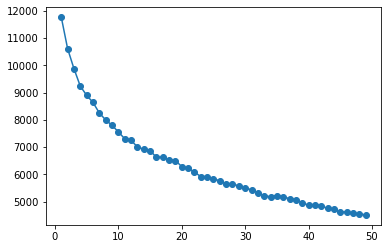

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = list(range(1,50))
inertias = []
for k in num_clusters:
    models = KMeans(n_clusters=k)
    models.fit(a)
    inertias.append(models.inertia_)
plt.plot(num_clusters, inertias,'-o')
plt.show()


In [40]:
inertias

[11769.30078125,
 10612.68359375,
 9880.12890625,
 9239.6259765625,
 8903.7744140625,
 8644.080078125,
 8254.626953125,
 8001.57421875,
 7803.52978515625,
 7563.21142578125,
 7310.71533203125,
 7254.20361328125,
 7011.0048828125,
 6926.103515625,
 6878.5068359375,
 6626.68896484375,
 6640.59033203125,
 6529.3466796875,
 6511.88427734375,
 6287.650390625,
 6229.24609375,
 6088.16015625,
 5921.203125,
 5921.4873046875,
 5834.94921875,
 5772.74609375,
 5644.34765625,
 5647.7392578125,
 5583.1611328125,
 5486.07958984375,
 5447.9716796875,
 5327.75244140625,
 5208.32763671875,
 5188.345703125,
 5226.6416015625,
 5188.5380859375,
 5106.42626953125,
 5079.14013671875,
 4947.0810546875,
 4881.2841796875,
 4893.5009765625,
 4851.29736328125,
 4752.19970703125,
 4716.0703125,
 4619.521484375,
 4626.6845703125,
 4576.0869140625,
 4553.12841796875,
 4515.7666015625]

In [41]:
kmeans = KMeans(n_clusters = 18)
kmeans.fit(a)
labels = kmeans.predict(a)
print(labels)

[ 4  4  4 17  4 17 11 11  9  9 17  4 11  4 11  9  4 11 17  6 17 17 12  4
  4  4  4 13 10  6 11 10  5  9 17  4 10  6  4 17 11  4 10 17  4 17 13 11
  4 11 14  4  9  6 17  5 14 13  4 10 17 14  9  5 17 14 12  2 10 17 17 12
  6 13 11 17 13  6  5  4 17  5  3  4  4  3 12  6 13 12 13  1  4  3  5 17
 10 10 16 13  6 12 11 12  4  1 16  2 12 17  3  2 10 17  6  9 14  1  5 13
 16  9 16 16  3  5  9  2 13  3  5  2  3 12 14 13 15 10  7  3 11 10 16  9
 11 14  2 13  2  5 14  1  2  2  2 15  6  3  6 15  3  1  6  6 11  3  3 11
 14 13  2 13  2  3  3 14  3 11 16 15 13  4  6  3 11  2 13 11 11  6 16  9
 10  4  2  2  8  6  1  8 13  3  3  3  3  3  2 17  4 14 14  8  1  8  8  8
 14  8 10  8  8  8  2  8  8  8  8  6  8  8  2  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  0
  8  8  0  0  8  8  8  8  8  8  8  8  0  8  8  8  8  8  8  8  0  0  0  0
  8  0  0  0  8  0  8  8  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0
  8  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0

In [42]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(a)
labels = kmeans.predict(a)


for i in range(20):
    temp=[]
    for j in range(len(labels)):
        if labels[j] == i:
            temp.append(sim_df['직무'][j])
    print(temp)
    print('------------------------------------------------------------------------------')

['"전기 기술자"', '"공정 엔지니어"', '"건축가"', '"구조공학 엔지니어"', '"목수"', '"계리사"', '"특허담당"', '"안전 관리자"', '"교수"', '"레스토랑 관리자"', '"정비공"', '"재료공학자"', '"인스톨러"', '"로봇·자동화"', '"보건안전 엔지니어"', '"헤어 디자이너"', '"전자계전 엔지니어"', '"카운셀러"', '"영양사"', '"간호 조무사"', '"금속 공학자"', '"VR 엔지니어"', '"보세사"', '"시운전 엔지니어"', '"수의 테크니션"', '"운전기사"', '"수사관"', '"플라스틱 엔지니어"', '"학원강사"', '"물리 치료사"', '"건축시공·감리"', '"공연 기획자"', '"지리정보시스템"', '"생물의학자"', '"소방안전 기술자"', '"측량·계측"', '"공무원"', '"관세사"', '"패브릭 디자이너"', '"정보 분석가"', '"용접기사"', '"자원봉사자"', '"플랜트 관리자"', '"사업수주 엔지니어"', '"치과 위생사"', '"환경 안전기사"', '"치과의사"', '"반도체·디스플레이"', '"보일러 엔지니어"', '"호흡장애 치료사"', '"선박 공학자"', '"전시 디자이너"', '"약사 보조원"', '"작업 치료사"', '"건설 안전·품질·검사"', '"지역 전문가"', '"플랜트 엔지니어"', '"I\\u0026C 엔지니어"', '"화물트럭 운전기사"', '"사내 심리상담가"', '"회전기계 엔지니어"', '"세라믹 엔지니어"', '"환경 전문가"', '"배관설계 엔지니어"', '"농업 공학자"']
------------------------------------------------------------------------------
['"콘텐츠 크리에이터"', '"영상 편집가"', '"PD"', '"에디터"', '"비디오 제작"', '"작가"', '"출판 기획자"', '"사진작가"', '"저널리스트"', '"큐레이터"', '"음향 엔지니어"', '"

In [43]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(a)
labels = kmeans.predict(a)


for i in range(10):
    temp=[]
    for j in range(len(labels)):
        if labels[j] == i:
            temp.append(sim_df['직무'][j])
    print(temp)
    print('------------------------------------------------------------------------------')

['"운영 매니저"', '"경영지원"', '"인사담당"', '"리크루터"', '"총무"', '"조직문화"', '"평가·보상"', '"HRD"', '"오피스 관리"', '"급여담당"', '"조직관리"', '"구매담당"', '"노무·노사"', '"헤드헌터"', '"HR 컨설턴트"', '"비서"', '"HRBP"', '"E-러닝"', '"사내 강사"', '"기술 교육"']
------------------------------------------------------------------------------
['"영업 관리자"', '"외부영업"', '"기업영업"', '"주요고객사 담당자"', '"기술영업"', '"해외영업"', '"고객성공매니저"', '"솔루션 컨설턴트"', '"내부영업"', '"세일즈 엔지니어"', '"미디어 세일즈"', '"의료기기 영업"', '"제약영업"']
------------------------------------------------------------------------------
['"임상시험 연구원"', '"교사"', '"CEO,Chief Executive Officer"', '"유전공학자"', '"장비 엔지니어"', '"준법감시인"', '"지점장"', '"Sports 전문가"', '"견적 기술자"', '"유지보수 관리자"', '"설비 엔지니어"', '"기계·설비·설계"', '"프로젝트 엔지니어"', '"도면 담당자"', '"미생물학자"', '"약사"', '"제조 테스트 엔지니어"', '"안내원"', '"외식업 종사자"', '"기계제작 기술자"', '"현장 소장"', '"건설 엔지니어"', '"부동산 중개사"', '"도면 작성가"', '"화학자"', '"전기 기술자"', '"항공우주 공학자"', '"QC 엔지니어"', '"산업 엔지니어"', '"생산직 종사자"', '"요리사"', '"자동차 공학자"', '"선적,발송 사무원"', '"플래시 개발자"', '"관리인"', '"자격증·기술전문교육"', '"외국어교육"', '"공

In [44]:
kmeans = KMeans(n_clusters = 50)
kmeans.fit(a)
labels = kmeans.predict(a)


for i in range(50):
    temp=[]
    for j in range(len(labels)):
        if labels[j] == i:
            temp.append(sim_df['직무'][j])
    print(temp)
    print('------------------------------------------------------------------------------')

['"작가"', '"출판 기획자"', '"저널리스트"', '"큐레이터"', '"라이센스 관리자"', '"리포터"']
------------------------------------------------------------------------------
['"유전공학자"', '"미생물학자"', '"약사"']
------------------------------------------------------------------------------
['"인사담당"', '"조직문화"', '"평가·보상"', '"HRD"', '"급여담당"', '"노무·노사"', '"HR 컨설턴트"', '"HRBP"']
------------------------------------------------------------------------------
['"그로스 해커"', '"키워드광고"', '"퍼포먼스 마케터"']
------------------------------------------------------------------------------
['"재무 분석가"', '"재무 담당자"', '"회계담당"', '"경영 혁신가"', '"IR"', '"리스크 관리 전문가"', '"공인회계사"', '"CFO,Chief Financial Officer"', '"세무사"']
------------------------------------------------------------------------------
['"목수"', '"계리사"', '"레스토랑 관리자"', '"인스톨러"', '"전자계전 엔지니어"', '"카운셀러"', '"영양사"', '"간호 조무사"', '"VR 엔지니어"', '"수의 테크니션"', '"물리 치료사"', '"건축시공·감리"', '"공연 기획자"', '"지리정보시스템"', '"측량·계측"', '"공무원"', '"관세사"', '"패브릭 디자이너"', '"정보 분석가"', '"용접기사"', '"자원봉사자"', '"플랜트 관리자"', '"사업수주 엔지